In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!sudo apt-get install tree

In [ ]:
# Aux functions
def get_dataframe(data):
    data = data['result'][0]['values']

    df = pd.DataFrame(data, columns=['date', 'kpi'])
    df['date'] = pd.to_datetime(df['date'], unit='s')
    set(df['date'].dt.date)
    df['kpi'] = pd.to_numeric(df['kpi'], errors='ignore')
    return df

def plot(df):
    plt.figure(figsize=(30, 10))
    plt.plot(df['date'], df['kpi'], 'blue', label='stat')

    plt.ylim(0, 100)
    plt.xlabel('Date')
    plt.ylabel('percentaje')
    plt.title('KPI stat: CPU Usage')
    plt.legend();
    plt.show()

# DataSource Selecction

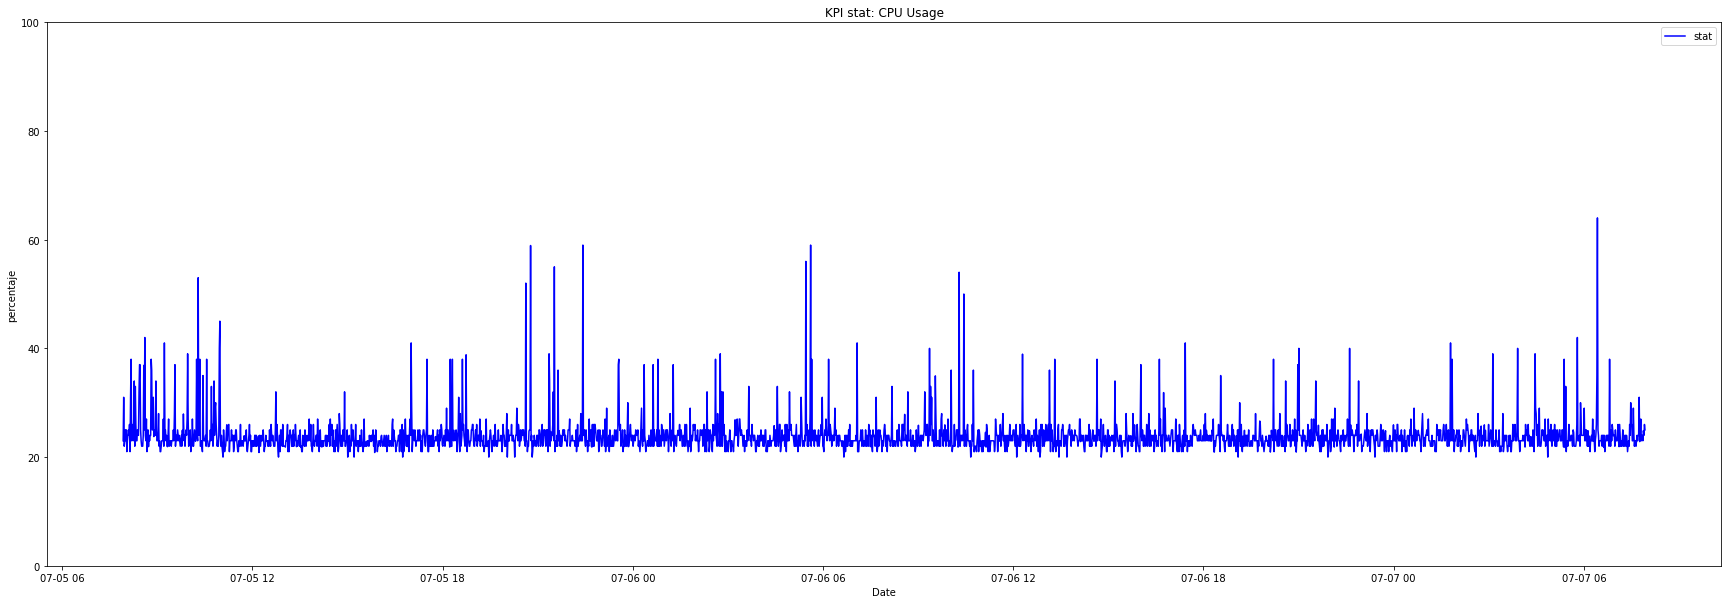

In [ ]:
#@title Select the data-source
data_source = "sin" #@param ["sin", "CPU_USAGE"]
if data_source == 'sin':
  x = np.linspace(0,50,501)
  y = np.sin(x)
  plt.plot(x,y)
  # Define a dataframe using x and y values.
  df = pd.DataFrame(data=y,index=x,columns=['Sine'])

else:
  data = {'resultType': 'matrix', 'result': [{'metric': {'instance': '192.168.33.133:9100'}, 'values': [[1593935732, '23.000000001047738'], [1593935792, '30.99999999976717'], [1593935852, '22.000000000116415'], [1593935912, '23.000000001047738'], [1593935972, '25'], [1593936032, '22.999999998137355'], [1593936092, '25'], [1593936152, '20.999999999185093'], [1593936212, '22.999999998137355'], [1593936272, '24.00000000197906'], [1593936332, '25'], [1593936392, '23.999999999068677'], [1593936452, '25.99999999802094'], [1593936512, '20.999999999185093'], [1593936572, '30.99999999976717'], [1593936632, '38.00000000046566'], [1593936692, '23.000000001047738'], [1593936752, '26.000000000931323'], [1593936812, '23.999999999068677'], [1593936872, '22.999999998137355'], [1593936932, '26.999999998952262'], [1593936992, '33.999999999650754'], [1593937052, '22.000000000116415'], [1593937112, '33.000000001629815'], [1593937172, '26.000000000931323'], [1593937232, '23.000000001047738'], [1593937292, '23.000000001047738'], [1593937352, '25'], [1593937412, '23.999999999068677'], [1593937472, '24.00000000197906'], [1593937532, '32.00000000069849'], [1593937592, '36.99999999953434'], [1593937652, '37.00000000244472'], [1593937712, '25'], [1593937772, '23.000000001047738'], [1593937832, '22.000000000116415'], [1593937892, '22.000000000116415'], [1593937952, '22.000000000116415'], [1593938012, '24.00000000197906'], [1593938072, '36.87374749452339'], [1593938132, '25'], [1593938192, '42.00000000128057'], [1593938252, '23.999999999068677'], [1593938312, '23.000000001047738'], [1593938372, '26.999999998952262'], [1593938432, '20.999999999185093'], [1593938492, '23.000000001047738'], [1593938552, '25'], [1593938612, '21.92192192203845'], [1593938672, '24.00000000197906'], [1593938732, '22.999999998137355'], [1593938792, '23.999999999068677'], [1593938852, '24.00000000197906'], [1593938912, '38.00000000046566'], [1593938972, '35.999999998603016'], [1593939032, '25'], [1593939092, '25'], [1593939152, '30.99999999976717'], [1593939212, '23.771313940891346'], [1593939272, '25'], [1593939332, '23.999999999068677'], [1593939392, '23.999999999068677'], [1593939452, '33.999999999650754'], [1593939512, '25'], [1593939572, '23.000000001047738'], [1593939632, '23.000000001047738'], [1593939692, '24.00000000197906'], [1593939752, '27.999999999883585'], [1593939812, '22.000000000116415'], [1593939872, '23.000000001047738'], [1593939932, '20.999999999185093'], [1593939992, '20.999999999185093'], [1593940052, '22.000000000116415'], [1593940112, '22.999999998137355'], [1593940172, '23.000000001047738'], [1593940232, '23.000000001047738'], [1593940292, '26.999999998952262'], [1593940352, '22.000000000116415'], [1593940412, '41.000000000349246'], [1593940472, '25'], [1593940532, '25'], [1593940592, '23.000000001047738'], [1593940652, '23.999999999068677'], [1593940712, '21.999999997206032'], [1593940772, '21.92192192203845'], [1593940832, '23.999999999068677'], [1593940892, '26.999999998952262'], [1593940952, '22.000000000116415'], [1593941012, '23.000000001047738'], [1593941072, '23.000000001047738'], [1593941132, '23.000000001047738'], [1593941192, '22.000000000116415'], [1593941252, '23.000000001047738'], [1593941312, '23.000000001047738'], [1593941372, '22.999999998137355'], [1593941432, '25'], [1593941492, '22.999999998137355'], [1593941552, '27.999999999883585'], [1593941612, '36.99999999953434'], [1593941672, '22.000000000116415'], [1593941732, '23.999999999068677'], [1593941792, '23.999999999068677'], [1593941852, '22.999999998137355'], [1593941912, '25'], [1593941972, '24.00000000197906'], [1593942032, '22.999999998137355'], [1593942092, '23.999999999068677'], [1593942152, '23.000000001047738'], [1593942212, '22.000000000116415'], [1593942272, '23.000000001047738'], [1593942332, '24.00000000197906'], [1593942392, '22.000000000116415'], [1593942452, '24.924924924924923'], [1593942512, '22.999999998137355'], [1593942572, '27.927927927811396'], [1593942632, '23.999999999068677'], [1593942692, '24.00000000197906'], [1593942752, '22.000000000116415'], [1593942812, '23.999999999068677'], [1593942872, '25'], [1593942932, '23.999999999068677'], [1593942992, '27.000000001862645'], [1593943052, '38.9999999984866'], [1593943112, '26.999999998952262'], [1593943172, '22.000000000116415'], [1593943232, '23.999999999068677'], [1593943292, '23.847695389848383'], [1593943352, '25'], [1593943412, '20.999999999185093'], [1593943472, '23.000000001047738'], [1593943532, '22.000000000116415'], [1593943592, '27.000000001862645'], [1593943652, '23.000000001047738'], [1593943712, '22.000000000116415'], [1593943772, '22.999999998137355'], [1593943832, '25'], [1593943892, '23.999999999068677'], [1593943952, '22.922922921058415'], [1593944012, '23.999999999068677'], [1593944072, '38.00000000046566'], [1593944132, '24.00000000197906'], [1593944192, '23.000000001047738'], [1593944252, '52.999999999883585'], [1593944312, '23.999999999068677'], [1593944372, '27.000000001862645'], [1593944432, '38.00000000046566'], [1593944492, '22.000000000116415'], [1593944552, '22.000000000116415'], [1593944612, '22.999999998137355'], [1593944672, '22.000000000116415'], [1593944732, '20.999999999185093'], [1593944792, '35.00000000058208'], [1593944852, '23.923923925904973'], [1593944912, '23.000000001047738'], [1593944972, '23.000000001047738'], [1593945032, '22.999999998137355'], [1593945092, '23.999999999068677'], [1593945152, '22.000000000116415'], [1593945212, '37.99999999755528'], [1593945272, '22.999999998137355'], [1593945332, '22.999999998137355'], [1593945392, '21.92192192203845'], [1593945452, '22.000000000116415'], [1593945512, '22.000000000116415'], [1593945572, '23.000000001047738'], [1593945632, '25'], [1593945692, '23.000000001047738'], [1593945752, '33.000000001629815'], [1593945812, '23.999999999068677'], [1593945872, '26.000000000931323'], [1593945932, '22.000000000116415'], [1593945992, '23.999999999068677'], [1593946052, '33.999999999650754'], [1593946112, '23.999999999068677'], [1593946172, '28.999999997904524'], [1593946232, '30.00000000174623'], [1593946292, '26.000000000931323'], [1593946352, '23.999999999068677'], [1593946412, '22.000000000116415'], [1593946472, '22.999999998137355'], [1593946532, '22.000000000116415'], [1593946592, '23.999999999068677'], [1593946652, '40.000000002328306'], [1593946712, '45.00000000116415'], [1593946772, '23.999999999068677'], [1593946832, '22.000000000116415'], [1593946892, '23.999999999068677'], [1593946952, '22.000000000116415'], [1593947012, '21.000000002095476'], [1593947072, '20.000000001164153'], [1593947132, '25'], [1593947192, '22.999999998137355'], [1593947252, '20.999999999185093'], [1593947312, '22.000000000116415'], [1593947372, '22.000000000116415'], [1593947432, '23.999999999068677'], [1593947492, '25.925925923944888'], [1593947552, '22.999999998137355'], [1593947612, '25'], [1593947672, '25.925925926858184'], [1593947732, '26.000000000931323'], [1593947792, '20.999999999185093'], [1593947852, '22.999999998137355'], [1593947912, '23.000000001047738'], [1593947972, '22.999999998137355'], [1593948032, '25'], [1593948092, '23.000000001047738'], [1593948152, '24.00000000197906'], [1593948212, '24.00000000197906'], [1593948272, '20.999999999185093'], [1593948332, '22.000000000116415'], [1593948392, '23.999999999068677'], [1593948452, '23.000000001047738'], [1593948512, '25'], [1593948572, '25'], [1593948632, '23.000000001047738'], [1593948692, '22.000000000116415'], [1593948752, '20.999999999185093'], [1593948812, '20.999999999185093'], [1593948872, '23.000000001047738'], [1593948932, '22.000000000116415'], [1593948992, '23.000000001047738'], [1593949052, '26.000000000931323'], [1593949112, '22.000000000116415'], [1593949172, '22.999999998137355'], [1593949232, '22.999999998137355'], [1593949292, '23.000000001047738'], [1593949352, '21.999999997206032'], [1593949412, '23.000000001047738'], [1593949472, '23.923923922991676'], [1593949532, '23.000000001047738'], [1593949592, '23.000000001047738'], [1593949652, '23.000000001047738'], [1593949712, '25'], [1593949772, '21.68674698806869'], [1593949832, '20.999999999185093'], [1593949892, '22.000000000116415'], [1593949952, '22.999999998137355'], [1593950012, '23.999999999068677'], [1593950072, '26.000000000931323'], [1593950132, '23.000000001047738'], [1593950192, '24.00000000197906'], [1593950252, '20.999999999185093'], [1593950312, '20.999999999185093'], [1593950372, '23.000000001047738'], [1593950432, '22.000000000116415'], [1593950492, '23.000000001047738'], [1593950552, '22.000000000116415'], [1593950612, '22.000000000116415'], [1593950672, '23.999999999068677'], [1593950732, '23.999999999068677'], [1593950792, '22.000000000116415'], [1593950852, '23.999999999068677'], [1593950912, '22.000000000116415'], [1593950972, '23.000000001047738'], [1593951032, '23.000000001047738'], [1593951092, '23.847695389848383'], [1593951152, '20.841683368833145'], [1593951212, '24.00000000197906'], [1593951272, '23.000000001047738'], [1593951332, '22.000000000116415'], [1593951392, '23.999999999068677'], [1593951452, '23.000000001047738'], [1593951512, '23.923923922991676'], [1593951572, '22.999999998137355'], [1593951632, '25'], [1593951692, '22.999999998137355'], [1593951752, '20.999999999185093'], [1593951812, '22.000000000116415'], [1593951872, '22.000000000116415'], [1593951932, '23.999999999068677'], [1593951992, '22.92292292397171'], [1593952052, '23.000000001047738'], [1593952112, '23.000000001047738'], [1593952172, '22.000000000116415'], [1593952232, '22.999999998137355'], [1593952292, '22.000000000116415'], [1593952352, '25'], [1593952412, '23.000000001047738'], [1593952472, '22.000000000116415'], [1593952532, '26.000000000931323'], [1593952592, '23.999999999068677'], [1593952652, '23.000000001047738'], [1593952712, '24.00000000197906'], [1593952772, '23.000000001047738'], [1593952832, '22.000000000116415'], [1593952892, '22.000000000116415'], [1593952952, '22.000000000116415'], [1593953012, '25'], [1593953072, '32.00000000069849'], [1593953132, '23.000000001047738'], [1593953192, '25.99999999802094'], [1593953252, '24.00000000197906'], [1593953312, '20.999999999185093'], [1593953372, '19.99999999825377'], [1593953432, '22.000000000116415'], [1593953492, '23.999999999068677'], [1593953552, '20.999999999185093'], [1593953612, '25'], [1593953672, '25'], [1593953732, '23.000000001047738'], [1593953792, '22.000000000116415'], [1593953852, '25.99999999802094'], [1593953912, '22.000000000116415'], [1593953972, '22.000000000116415'], [1593954032, '22.000000000116415'], [1593954092, '22.000000000116415'], [1593954152, '21.84368737486615'], [1593954212, '23.000000001047738'], [1593954272, '23.000000001047738'], [1593954332, '24.00000000197906'], [1593954392, '26.000000000931323'], [1593954452, '20.999999999185093'], [1593954512, '23.999999999068677'], [1593954572, '20.999999999185093'], [1593954632, '22.999999998137355'], [1593954692, '25'], [1593954752, '23.999999999068677'], [1593954812, '23.999999999068677'], [1593954872, '22.000000000116415'], [1593954932, '23.999999999068677'], [1593954992, '22.000000000116415'], [1593955052, '25'], [1593955112, '22.000000000116415'], [1593955172, '23.999999999068677'], [1593955232, '23.000000001047738'], [1593955292, '26.000000000931323'], [1593955352, '24.00000000197906'], [1593955412, '21.92192192203845'], [1593955472, '22.999999998137355'], [1593955532, '22.000000000116415'], [1593955592, '23.000000001047738'], [1593955652, '24.00000000197906'], [1593955712, '23.000000001047738'], [1593955772, '22.000000000116415'], [1593955832, '25'], [1593955892, '21.84368737486615'], [1593955952, '22.000000000116415'], [1593956012, '20.999999999185093'], [1593956072, '20.999999999185093'], [1593956132, '23.999999999068677'], [1593956192, '23.771313943810497'], [1593956252, '23.000000001047738'], [1593956312, '22.000000000116415'], [1593956372, '25'], [1593956432, '23.23030907382625'], [1593956492, '22.000000000116415'], [1593956552, '23.000000001047738'], [1593956612, '23.999999999068677'], [1593956672, '23.000000001047738'], [1593956732, '23.000000001047738'], [1593956792, '23.999999999068677'], [1593956852, '26.999999998952262'], [1593956912, '23.999999999068677'], [1593956972, '23.000000001047738'], [1593957032, '26.000000000931323'], [1593957092, '22.000000000116415'], [1593957152, '22.000000000116415'], [1593957212, '20.999999999185093'], [1593957272, '23.000000001047738'], [1593957332, '25.99999999802094'], [1593957392, '23.000000001047738'], [1593957452, '22.000000000116415'], [1593957512, '22.999999998137355'], [1593957572, '23.000000001047738'], [1593957632, '23.999999999068677'], [1593957692, '23.999999999068677'], [1593957752, '22.000000000116415'], [1593957812, '27.000000001862645'], [1593957872, '24.00000000197906'], [1593957932, '23.000000001047738'], [1593957992, '21.000000002095476'], [1593958052, '23.999999999068677'], [1593958112, '25'], [1593958172, '22.000000000116415'], [1593958232, '22.999999998137355'], [1593958292, '21.84368737486615'], [1593958352, '23.000000001047738'], [1593958412, '23.000000001047738'], [1593958472, '22.000000000116415'], [1593958532, '23.000000001047738'], [1593958592, '23.000000001047738'], [1593958652, '23.000000001047738'], [1593958712, '23.999999999068677'], [1593958772, '22.000000000116415'], [1593958832, '23.999999999068677'], [1593958892, '22.000000000116415'], [1593958952, '23.000000001047738'], [1593959012, '23.999999999068677'], [1593959072, '22.922922921058415'], [1593959132, '25.99999999802094'], [1593959192, '22.000000000116415'], [1593959252, '26.999999998952262'], [1593959312, '23.999999999068677'], [1593959372, '25'], [1593959432, '26.000000000931323'], [1593959492, '22.000000000116415'], [1593959552, '25'], [1593959612, '22.999999998137355'], [1593959672, '21.000000002095476'], [1593959732, '23.000000001047738'], [1593959792, '20.999999999185093'], [1593959852, '25'], [1593959912, '22.000000000116415'], [1593959972, '23.999999999068677'], [1593960032, '26.000000000931323'], [1593960092, '22.000000000116415'], [1593960152, '20.999999999185093'], [1593960212, '22.000000000116415'], [1593960272, '27.999999999883585'], [1593960332, '25.99999999802094'], [1593960392, '22.999999998137355'], [1593960452, '22.000000000116415'], [1593960512, '24.00000000197906'], [1593960572, '22.000000000116415'], [1593960632, '22.000000000116415'], [1593960692, '25'], [1593960752, '23.000000001047738'], [1593960812, '23.000000001047738'], [1593960872, '31.99999999778811'], [1593960932, '22.000000000116415'], [1593960992, '22.000000000116415'], [1593961052, '23.000000001047738'], [1593961112, '22.999999998137355'], [1593961172, '25'], [1593961232, '20.000000001164153'], [1593961292, '22.000000000116415'], [1593961352, '23.000000001047738'], [1593961412, '23.999999999068677'], [1593961472, '21.000000002095476'], [1593961532, '22.999999998137355'], [1593961592, '22.000000000116415'], [1593961652, '26.000000000931323'], [1593961712, '23.000000001047738'], [1593961772, '23.000000001047738'], [1593961832, '25'], [1593961892, '23.000000001047738'], [1593961952, '20.000000001164153'], [1593962012, '23.000000001047738'], [1593962072, '23.000000001047738'], [1593962132, '26.000000000931323'], [1593962192, '22.000000000116415'], [1593962252, '22.999999998137355'], [1593962312, '23.000000001047738'], [1593962372, '23.000000001047738'], [1593962432, '20.999999999185093'], [1593962492, '22.999999998137355'], [1593962552, '22.000000000116415'], [1593962612, '23.999999999068677'], [1593962672, '22.000000000116415'], [1593962732, '21.999999997206032'], [1593962792, '25'], [1593962852, '23.000000001047738'], [1593962912, '22.000000000116415'], [1593962972, '21.000000002095476'], [1593963032, '22.000000000116415'], [1593963092, '27.000000001862645'], [1593963152, '22.000000000116415'], [1593963212, '22.000000000116415'], [1593963272, '22.000000000116415'], [1593963332, '22.845691383815364'], [1593963392, '22.000000000116415'], [1593963452, '23.000000001047738'], [1593963512, '23.000000001047738'], [1593963572, '23.000000001047738'], [1593963632, '22.000000000116415'], [1593963692, '23.999999999068677'], [1593963752, '22.999999998137355'], [1593963812, '23.923923925904973'], [1593963872, '22.845691380899154'], [1593963932, '23.999999999068677'], [1593963992, '22.999999998137355'], [1593964052, '23.999999999068677'], [1593964112, '25'], [1593964172, '22.000000000116415'], [1593964232, '24.00000000197906'], [1593964292, '20.841683368833145'], [1593964352, '22.000000000116415'], [1593964412, '25'], [1593964472, '23.000000001047738'], [1593964532, '23.000000001047738'], [1593964592, '20.999999999185093'], [1593964652, '22.000000000116415'], [1593964712, '21.999999997206032'], [1593964772, '23.000000001047738'], [1593964832, '22.999999998137355'], [1593964892, '23.000000001047738'], [1593964952, '22.000000000116415'], [1593965012, '23.694779115530793'], [1593965072, '23.999999999068677'], [1593965132, '23.000000001047738'], [1593965192, '22.000000000116415'], [1593965252, '22.000000000116415'], [1593965312, '22.999999998137355'], [1593965372, '23.999999999068677'], [1593965432, '22.000000000116415'], [1593965492, '22.000000000116415'], [1593965552, '22.000000000116415'], [1593965612, '24.00000000197906'], [1593965672, '20.999999999185093'], [1593965732, '22.999999998137355'], [1593965792, '23.000000001047738'], [1593965852, '23.999999999068677'], [1593965912, '22.000000000116415'], [1593965972, '22.000000000116415'], [1593966032, '22.999999998137355'], [1593966092, '22.999999998137355'], [1593966152, '22.000000000116415'], [1593966212, '22.000000000116415'], [1593966272, '26.000000000931323'], [1593966332, '26.999999998952262'], [1593966392, '22.000000000116415'], [1593966452, '25'], [1593966512, '23.999999999068677'], [1593966572, '23.000000001047738'], [1593966632, '23.000000001047738'], [1593966692, '21.000000002095476'], [1593966752, '22.000000000116415'], [1593966812, '22.000000000116415'], [1593966872, '23.000000001047738'], [1593966932, '23.000000001047738'], [1593966992, '23.999999999068677'], [1593967052, '24.00000000197906'], [1593967112, '21.000000002095476'], [1593967172, '25'], [1593967232, '25'], [1593967292, '22.999999998137355'], [1593967352, '21.000000002095476'], [1593967412, '26.000000000931323'], [1593967472, '19.99999999825377'], [1593967532, '25'], [1593967592, '20.999999999185093'], [1593967652, '23.000000001047738'], [1593967712, '24.00000000197906'], [1593967772, '26.999999998952262'], [1593967832, '23.000000001047738'], [1593967892, '22.000000000116415'], [1593967952, '24.00000000197906'], [1593968012, '22.000000000116415'], [1593968072, '21.92192192203845'], [1593968132, '24.00000000197906'], [1593968192, '20.999999999185093'], [1593968252, '25'], [1593968312, '27.000000001862645'], [1593968372, '24.00000000197906'], [1593968432, '41.000000000349246'], [1593968492, '28.999999997904524'], [1593968552, '20.999999999185093'], [1593968612, '23.000000001047738'], [1593968672, '25'], [1593968732, '23.999999999068677'], [1593968792, '22.999999998137355'], [1593968852, '25'], [1593968912, '23.847695389848383'], [1593968972, '22.000000000116415'], [1593969032, '23.000000001047738'], [1593969092, '22.999999998137355'], [1593969152, '22.999999998137355'], [1593969212, '25'], [1593969272, '23.000000001047738'], [1593969332, '22.999999998137355'], [1593969392, '25'], [1593969452, '23.000000001047738'], [1593969512, '24.00000000197906'], [1593969572, '20.999999999185093'], [1593969632, '23.000000001047738'], [1593969692, '20.999999999185093'], [1593969752, '24.00000000197906'], [1593969812, '25'], [1593969872, '25'], [1593969932, '24.00000000197906'], [1593969992, '22.768304915795127'], [1593970052, '22.000000000116415'], [1593970112, '24.00000000197906'], [1593970172, '25'], [1593970232, '38.00000000046566'], [1593970292, '23.000000001047738'], [1593970352, '20.999999999185093'], [1593970412, '20.999999999185093'], [1593970472, '23.999999999068677'], [1593970532, '22.000000000116415'], [1593970592, '22.999999998137355'], [1593970652, '22.000000000116415'], [1593970712, '23.999999999068677'], [1593970772, '22.000000000116415'], [1593970832, '22.000000000116415'], [1593970892, '25'], [1593970952, '22.000000000116415'], [1593971012, '22.000000000116415'], [1593971072, '23.000000001047738'], [1593971132, '23.000000001047738'], [1593971192, '23.771313940891346'], [1593971252, '22.999999998137355'], [1593971312, '23.000000001047738'], [1593971372, '24.00000000197906'], [1593971432, '25'], [1593971492, '22.000000000116415'], [1593971552, '23.999999999068677'], [1593971612, '20.999999999185093'], [1593971672, '25'], [1593971732, '23.000000001047738'], [1593971792, '24.00000000197906'], [1593971852, '26.000000000931323'], [1593971912, '25'], [1593971972, '22.233300099816958'], [1593972032, '22.000000000116415'], [1593972092, '23.000000001047738'], [1593972152, '23.999999999068677'], [1593972212, '22.999999998137355'], [1593972272, '22.000000000116415'], [1593972332, '25'], [1593972392, '23.000000001047738'], [1593972452, '29.000000000814907'], [1593972512, '23.000000001047738'], [1593972572, '23.999999999068677'], [1593972632, '25'], [1593972692, '23.000000001047738'], [1593972752, '23.999999999068677'], [1593972812, '21.843687371949926'], [1593972872, '38.00000000046566'], [1593972932, '26.999999998952262'], [1593972992, '22.000000000116415'], [1593973052, '22.000000000116415'], [1593973112, '38.00000000046566'], [1593973172, '23.999999999068677'], [1593973232, '23.000000001047738'], [1593973292, '24.924924924924923'], [1593973352, '23.999999999068677'], [1593973412, '22.999999998137355'], [1593973472, '23.771313943810497'], [1593973532, '25'], [1593973592, '23.923923925904973'], [1593973652, '20.999999999185093'], [1593973712, '23.847695389848383'], [1593973772, '25'], [1593973832, '30.99999999976717'], [1593973892, '22.999999998137355'], [1593973952, '20.999999999185093'], [1593974012, '27.999999999883585'], [1593974072, '22.000000000116415'], [1593974132, '22.768304915795127'], [1593974192, '23.999999999068677'], [1593974252, '38.00000000046566'], [1593974312, '25'], [1593974372, '26.000000000931323'], [1593974432, '23.923923922991676'], [1593974492, '23.000000001047738'], [1593974552, '22.000000000116415'], [1593974612, '25'], [1593974672, '38.816449346526184'], [1593974732, '23.000000001047738'], [1593974792, '21.000000002095476'], [1593974852, '25'], [1593974912, '25'], [1593974972, '23.000000001047738'], [1593975032, '22.000000000116415'], [1593975092, '22.000000000116415'], [1593975152, '23.000000001047738'], [1593975212, '23.000000001047738'], [1593975272, '25'], [1593975332, '25'], [1593975392, '26.000000000931323'], [1593975452, '25.99999999802094'], [1593975512, '22.999999998137355'], [1593975572, '22.000000000116415'], [1593975632, '22.000000000116415'], [1593975692, '24.00000000197906'], [1593975752, '25'], [1593975812, '23.000000001047738'], [1593975872, '25.99999999802094'], [1593975932, '22.000000000116415'], [1593975992, '23.000000001047738'], [1593976052, '24.00000000197906'], [1593976112, '23.999999999068677'], [1593976172, '22.999999998137355'], [1593976232, '27.000000001862645'], [1593976292, '22.000000000116415'], [1593976352, '24.849699398797597'], [1593976412, '22.999999998137355'], [1593976472, '22.999999998137355'], [1593976532, '22.999999998137355'], [1593976592, '22.000000000116415'], [1593976652, '23.999999999068677'], [1593976712, '20.999999999185093'], [1593976772, '22.000000000116415'], [1593976832, '22.000000000116415'], [1593976892, '22.000000000116415'], [1593976952, '26.999999998952262'], [1593977012, '21.999999997206032'], [1593977072, '22.000000000116415'], [1593977132, '22.000000000116415'], [1593977192, '23.000000001047738'], [1593977252, '20.000000001164153'], [1593977312, '22.999999998137355'], [1593977372, '24.00000000197906'], [1593977432, '25'], [1593977492, '23.999999999068677'], [1593977552, '22.000000000116415'], [1593977612, '20.999999999185093'], [1593977672, '23.000000001047738'], [1593977732, '22.845691383815364'], [1593977792, '24.00000000197906'], [1593977852, '22.000000000116415'], [1593977912, '23.999999999068677'], [1593977972, '26.000000000931323'], [1593978032, '22.999999998137355'], [1593978092, '22.000000000116415'], [1593978152, '22.999999998137355'], [1593978212, '22.000000000116415'], [1593978272, '23.000000001047738'], [1593978332, '25'], [1593978392, '23.000000001047738'], [1593978452, '22.999999998137355'], [1593978512, '23.000000001047738'], [1593978572, '22.999999998137355'], [1593978632, '23.999999999068677'], [1593978692, '23.000000001047738'], [1593978752, '20.999999999185093'], [1593978812, '23.000000001047738'], [1593978872, '25.99999999802094'], [1593978932, '24.00000000197906'], [1593978992, '24.00000000197906'], [1593979052, '22.000000000116415'], [1593979112, '23.000000001047738'], [1593979172, '22.000000000116415'], [1593979232, '23.999999999068677'], [1593979292, '27.999999999883585'], [1593979352, '19.99999999825377'], [1593979412, '23.000000001047738'], [1593979472, '25'], [1593979532, '22.92292292397171'], [1593979592, '23.999999999068677'], [1593979652, '23.999999999068677'], [1593979712, '23.999999999068677'], [1593979772, '24.00000000197906'], [1593979832, '26.000000000931323'], [1593979892, '23.000000001047738'], [1593979952, '23.000000001047738'], [1593980012, '23.999999999068677'], [1593980072, '23.000000001047738'], [1593980132, '23.000000001047738'], [1593980192, '20.000000001164153'], [1593980252, '23.000000001047738'], [1593980312, '23.999999999068677'], [1593980372, '23.999999999068677'], [1593980432, '29.000000000814907'], [1593980492, '26.000000000931323'], [1593980552, '23.000000001047738'], [1593980612, '25.99999999802094'], [1593980672, '25'], [1593980732, '22.000000000116415'], [1593980792, '22.999999998137355'], [1593980852, '25'], [1593980912, '22.999999998137355'], [1593980972, '23.999999999068677'], [1593981032, '25'], [1593981092, '23.999999999068677'], [1593981152, '25'], [1593981212, '25'], [1593981272, '23.000000001047738'], [1593981332, '22.922922921058415'], [1593981392, '22.000000000116415'], [1593981452, '52.000000001862645'], [1593981512, '22.999999998137355'], [1593981572, '23.000000001047738'], [1593981632, '20.999999999185093'], [1593981692, '22.000000000116415'], [1593981752, '22.000000000116415'], [1593981812, '24.774322968906716'], [1593981872, '25'], [1593981932, '25'], [1593981992, '58.917835673908954'], [1593982052, '23.000000001047738'], [1593982112, '24.00000000197906'], [1593982172, '19.99999999825377'], [1593982232, '20.999999999185093'], [1593982292, '23.000000001047738'], [1593982352, '22.000000000116415'], [1593982412, '23.999999999068677'], [1593982472, '22.999999998137355'], [1593982532, '23.000000001047738'], [1593982592, '22.000000000116415'], [1593982652, '22.000000000116415'], [1593982712, '23.999999999068677'], [1593982772, '23.999999999068677'], [1593982832, '23.000000001047738'], [1593982892, '22.000000000116415'], [1593982952, '25'], [1593983012, '25'], [1593983072, '23.999999999068677'], [1593983132, '22.000000000116415'], [1593983192, '23.000000001047738'], [1593983252, '25'], [1593983312, '26.000000000931323'], [1593983372, '22.000000000116415'], [1593983432, '22.92292292397171'], [1593983492, '25'], [1593983552, '23.999999999068677'], [1593983612, '25'], [1593983672, '22.999999998137355'], [1593983732, '22.000000000116415'], [1593983792, '25'], [1593983852, '23.000000001047738'], [1593983912, '25'], [1593983972, '21.000000002095476'], [1593984032, '23.000000001047738'], [1593984092, '39.000000001396984'], [1593984152, '33.999999999650754'], [1593984212, '22.000000000116415'], [1593984272, '24.698795180722882'], [1593984332, '23.000000001047738'], [1593984392, '23.999999999068677'], [1593984452, '23.999999999068677'], [1593984512, '26.000000000931323'], [1593984572, '32.00000000069849'], [1593984632, '23.000000001047738'], [1593984692, '54.99999999883585'], [1593984752, '21.000000002095476'], [1593984812, '22.999999998137355'], [1593984872, '22.000000000116415'], [1593984932, '22.000000000116415'], [1593984992, '23.999999999068677'], [1593985052, '22.000000000116415'], [1593985112, '36.0000000015134'], [1593985172, '22.999999998137355'], [1593985232, '24.849699398797597'], [1593985292, '23.999999999068677'], [1593985352, '22.000000000116415'], [1593985412, '23.999999999068677'], [1593985472, '22.000000000116415'], [1593985532, '22.000000000116415'], [1593985592, '23.000000001047738'], [1593985652, '25'], [1593985712, '25'], [1593985772, '24.00000000197906'], [1593985832, '25'], [1593985892, '23.000000001047738'], [1593985952, '23.999999999068677'], [1593986012, '23.000000001047738'], [1593986072, '22.999999998137355'], [1593986132, '22.000000000116415'], [1593986192, '23.000000001047738'], [1593986252, '25'], [1593986312, '25'], [1593986372, '25'], [1593986432, '26.999999998952262'], [1593986492, '22.000000000116415'], [1593986552, '22.999999998137355'], [1593986612, '23.000000001047738'], [1593986672, '23.000000001047738'], [1593986732, '23.999999999068677'], [1593986792, '23.000000001047738'], [1593986852, '23.000000001047738'], [1593986912, '23.000000001047738'], [1593986972, '22.999999998137355'], [1593987032, '22.000000000116415'], [1593987092, '22.000000000116415'], [1593987152, '25'], [1593987212, '20.999999999185093'], [1593987272, '22.845691383815364'], [1593987332, '26.000000000931323'], [1593987392, '22.000000000116415'], [1593987452, '23.000000001047738'], [1593987512, '23.000000001047738'], [1593987572, '23.999999999068677'], [1593987632, '22.999999998137355'], [1593987692, '27.999999999883585'], [1593987752, '22.999999998137355'], [1593987812, '23.000000001047738'], [1593987872, '23.000000001047738'], [1593987932, '58.999999999650754'], [1593987992, '23.999999999068677'], [1593988052, '23.999999999068677'], [1593988112, '25'], [1593988172, '22.999999998137355'], [1593988232, '22.000000000116415'], [1593988292, '25'], [1593988352, '22.999999998137355'], [1593988412, '23.000000001047738'], [1593988472, '21.000000002095476'], [1593988532, '23.000000001047738'], [1593988592, '22.000000000116415'], [1593988652, '27.000000001862645'], [1593988712, '23.000000001047738'], [1593988772, '23.000000001047738'], [1593988832, '25'], [1593988892, '22.000000000116415'], [1593988952, '21.84368737486615'], [1593989012, '26.000000000931323'], [1593989072, '22.000000000116415'], [1593989132, '26.000000000931323'], [1593989192, '22.000000000116415'], [1593989252, '25.99999999802094'], [1593989312, '26.000000000931323'], [1593989372, '25'], [1593989432, '23.999999999068677'], [1593989492, '22.999999998137355'], [1593989552, '23.000000001047738'], [1593989612, '22.999999998137355'], [1593989672, '25'], [1593989732, '20.999999999185093'], [1593989792, '22.000000000116415'], [1593989852, '25'], [1593989912, '24.00000000197906'], [1593989972, '23.999999999068677'], [1593990032, '22.000000000116415'], [1593990092, '22.000000000116415'], [1593990152, '23.000000001047738'], [1593990212, '25'], [1593990272, '23.999999999068677'], [1593990332, '24.00000000197906'], [1593990392, '22.000000000116415'], [1593990452, '26.999999998952262'], [1593990512, '20.999999999185093'], [1593990572, '23.000000001047738'], [1593990632, '29.000000000814907'], [1593990692, '22.000000000116415'], [1593990752, '23.000000001047738'], [1593990812, '22.999999998137355'], [1593990872, '24.00000000197906'], [1593990932, '20.999999999185093'], [1593990992, '25'], [1593991052, '24.00000000197906'], [1593991112, '22.000000000116415'], [1593991172, '23.000000001047738'], [1593991232, '22.000000000116415'], [1593991292, '23.999999999068677'], [1593991352, '22.000000000116415'], [1593991412, '22.000000000116415'], [1593991472, '23.000000001047738'], [1593991532, '25'], [1593991592, '23.999999999068677'], [1593991652, '22.999999998137355'], [1593991712, '25'], [1593991772, '24.00000000197906'], [1593991832, '23.000000001047738'], [1593991892, '23.000000001047738'], [1593991952, '36.99999999953434'], [1593992012, '38.00000000046566'], [1593992072, '26.000000000931323'], [1593992132, '24.924924924924923'], [1593992192, '25.99999999802094'], [1593992252, '22.000000000116415'], [1593992312, '23.000000001047738'], [1593992372, '23.000000001047738'], [1593992432, '25'], [1593992492, '20.999999999185093'], [1593992552, '22.000000000116415'], [1593992612, '22.000000000116415'], [1593992672, '25'], [1593992732, '21.999999997206032'], [1593992792, '23.999999999068677'], [1593992852, '23.923923925904973'], [1593992912, '22.000000000116415'], [1593992972, '25'], [1593993032, '30.00000000174623'], [1593993092, '21.92192192203845'], [1593993152, '22.000000000116415'], [1593993212, '23.000000001047738'], [1593993272, '25'], [1593993332, '25.99999999802094'], [1593993392, '23.999999999068677'], [1593993452, '23.000000001047738'], [1593993512, '24.00000000197906'], [1593993572, '24.00000000197906'], [1593993632, '22.000000000116415'], [1593993692, '22.845691383815364'], [1593993752, '23.999999999068677'], [1593993812, '23.999999999068677'], [1593993872, '22.999999998137355'], [1593993932, '25'], [1593993992, '23.999999999068677'], [1593994052, '24.00000000197906'], [1593994112, '24.00000000197906'], [1593994172, '25'], [1593994232, '22.000000000116415'], [1593994292, '23.000000001047738'], [1593994352, '22.000000000116415'], [1593994412, '21.000000002095476'], [1593994472, '22.999999998137355'], [1593994532, '26.000000000931323'], [1593994592, '29.000000000814907'], [1593994652, '23.000000001047738'], [1593994712, '22.000000000116415'], [1593994772, '25'], [1593994832, '22.92292292397171'], [1593994892, '36.99999999953434'], [1593994952, '24.00000000197906'], [1593995012, '22.999999998137355'], [1593995072, '20.999999999185093'], [1593995132, '22.000000000116415'], [1593995192, '22.000000000116415'], [1593995252, '22.999999998137355'], [1593995312, '22.999999998137355'], [1593995372, '22.000000000116415'], [1593995432, '23.999999999068677'], [1593995492, '23.000000001047738'], [1593995552, '22.000000000116415'], [1593995612, '22.000000000116415'], [1593995672, '25'], [1593995732, '24.00000000197906'], [1593995792, '22.000000000116415'], [1593995852, '23.999999999068677'], [1593995912, '36.99999999953434'], [1593995972, '22.000000000116415'], [1593996032, '25'], [1593996092, '23.999999999068677'], [1593996152, '23.000000001047738'], [1593996212, '22.999999998137355'], [1593996272, '23.000000001047738'], [1593996332, '25'], [1593996392, '22.000000000116415'], [1593996452, '38.00000000046566'], [1593996512, '22.000000000116415'], [1593996572, '25'], [1593996632, '22.000000000116415'], [1593996692, '23.999999999068677'], [1593996752, '22.999999998137355'], [1593996812, '22.000000000116415'], [1593996872, '26.000000000931323'], [1593996932, '25'], [1593996992, '23.000000001047738'], [1593997052, '25'], [1593997112, '25'], [1593997172, '22.000000000116415'], [1593997232, '22.999999998137355'], [1593997292, '23.999999999068677'], [1593997352, '25'], [1593997412, '22.999999998137355'], [1593997472, '25'], [1593997532, '25'], [1593997592, '23.999999999068677'], [1593997652, '20.999999999185093'], [1593997712, '22.999999998137355'], [1593997772, '24.00000000197906'], [1593997832, '27.999999999883585'], [1593997892, '23.999999999068677'], [1593997952, '22.000000000116415'], [1593998012, '23.999999999068677'], [1593998072, '25'], [1593998132, '22.999999998137355'], [1593998192, '36.99999999953434'], [1593998252, '20.999999999185093'], [1593998312, '22.999999998137355'], [1593998372, '23.999999999068677'], [1593998432, '23.000000001047738'], [1593998492, '22.613065324761166'], [1593998552, '22.000000000116415'], [1593998612, '23.999999999068677'], [1593998672, '23.999999999068677'], [1593998732, '24.924924924924923'], [1593998792, '23.999999999068677'], [1593998852, '23.999999999068677'], [1593998912, '26.000000000931323'], [1593998972, '23.000000001047738'], [1593999032, '25'], [1593999092, '25'], [1593999152, '23.999999999068677'], [1593999212, '22.000000000116415'], [1593999272, '22.000000000116415'], [1593999332, '23.999999999068677'], [1593999392, '22.999999998137355'], [1593999452, '22.000000000116415'], [1593999512, '25.99999999802094'], [1593999572, '23.999999999068677'], [1593999632, '22.000000000116415'], [1593999692, '26.000000000931323'], [1593999752, '23.000000001047738'], [1593999812, '23.000000001047738'], [1593999872, '20.999999999185093'], [1593999932, '22.000000000116415'], [1593999992, '23.000000001047738'], [1594000052, '22.000000000116415'], [1594000112, '29.000000000814907'], [1594000172, '20.999999999185093'], [1594000232, '22.000000000116415'], [1594000292, '23.999999999068677'], [1594000352, '23.000000001047738'], [1594000412, '23.999999999068677'], [1594000472, '26.000000000931323'], [1594000532, '25'], [1594000592, '25'], [1594000652, '26.000000000931323'], [1594000712, '23.000000001047738'], [1594000772, '24.00000000197906'], [1594000832, '23.000000001047738'], [1594000892, '23.000000001047738'], [1594000952, '25'], [1594001012, '23.000000001047738'], [1594001072, '20.999999999185093'], [1594001132, '23.000000001047738'], [1594001192, '22.999999998137355'], [1594001252, '25'], [1594001312, '25'], [1594001372, '23.999999999068677'], [1594001432, '23.999999999068677'], [1594001492, '25'], [1594001552, '22.000000000116415'], [1594001612, '22.999999998137355'], [1594001672, '25.99999999802094'], [1594001732, '25.99999999802094'], [1594001792, '21.000000002095476'], [1594001852, '25'], [1594001912, '23.999999999068677'], [1594001972, '20.999999999185093'], [1594002032, '32.00000000069849'], [1594002092, '23.000000001047738'], [1594002152, '24.00000000197906'], [1594002212, '25'], [1594002272, '20.999999999185093'], [1594002332, '21.999999997206032'], [1594002392, '25'], [1594002452, '23.999999999068677'], [1594002512, '23.999999999068677'], [1594002572, '22.000000000116415'], [1594002632, '20.999999999185093'], [1594002692, '25.99999999802094'], [1594002752, '23.000000001047738'], [1594002812, '25.8517034048306'], [1594002872, '23.999999999068677'], [1594002932, '25'], [1594002992, '38.00000000046566'], [1594003052, '23.999999999068677'], [1594003112, '23.000000001047738'], [1594003172, '22.000000000116415'], [1594003232, '27.999999999883585'], [1594003292, '25'], [1594003352, '26.000000000931323'], [1594003412, '22.000000000116415'], [1594003472, '23.999999999068677'], [1594003532, '38.9999999984866'], [1594003592, '22.000000000116415'], [1594003652, '32.00000000069849'], [1594003712, '23.000000001047738'], [1594003772, '22.000000000116415'], [1594003832, '32.00000000069849'], [1594003892, '23.999999999068677'], [1594003952, '26.000000000931323'], [1594004012, '23.000000001047738'], [1594004072, '21.000000002095476'], [1594004132, '23.999999999068677'], [1594004192, '20.999999999185093'], [1594004252, '23.000000001047738'], [1594004312, '22.000000000116415'], [1594004372, '22.000000000116415'], [1594004432, '20.999999999185093'], [1594004492, '23.000000001047738'], [1594004552, '23.000000001047738'], [1594004612, '25'], [1594004672, '23.000000001047738'], [1594004732, '21.000000002095476'], [1594004792, '23.000000001047738'], [1594004852, '23.000000001047738'], [1594004912, '22.000000000116415'], [1594004972, '22.000000000116415'], [1594005032, '20.999999999185093'], [1594005092, '23.000000001047738'], [1594005152, '23.847695389848383'], [1594005212, '26.85370741377983'], [1594005272, '24.00000000197906'], [1594005332, '23.999999999068677'], [1594005392, '23.999999999068677'], [1594005452, '26.999999998952262'], [1594005512, '24.00000000197906'], [1594005572, '22.000000000116415'], [1594005632, '24.00000000197906'], [1594005692, '26.999999998952262'], [1594005752, '26.999999998952262'], [1594005812, '25'], [1594005872, '23.999999999068677'], [1594005932, '25'], [1594005992, '23.999999999068677'], [1594006052, '23.999999999068677'], [1594006112, '22.000000000116415'], [1594006172, '23.000000001047738'], [1594006232, '23.999999999068677'], [1594006292, '20.999999999185093'], [1594006352, '22.999999998137355'], [1594006412, '22.999999998137355'], [1594006472, '22.000000000116415'], [1594006532, '22.000000000116415'], [1594006592, '25'], [1594006652, '23.000000001047738'], [1594006712, '25'], [1594006772, '33.000000001629815'], [1594006832, '23.999999999068677'], [1594006892, '24.00000000197906'], [1594006952, '23.000000001047738'], [1594007012, '23.999999999068677'], [1594007072, '22.000000000116415'], [1594007132, '26.000000000931323'], [1594007192, '23.999999999068677'], [1594007252, '23.999999999068677'], [1594007312, '22.999999998137355'], [1594007372, '23.999999999068677'], [1594007432, '23.999999999068677'], [1594007492, '23.000000001047738'], [1594007552, '21.000000002095476'], [1594007612, '20.999999999185093'], [1594007672, '23.000000001047738'], [1594007732, '23.000000001047738'], [1594007792, '23.999999999068677'], [1594007852, '22.000000000116415'], [1594007912, '23.000000001047738'], [1594007972, '22.000000000116415'], [1594008032, '24.00000000197906'], [1594008092, '23.000000001047738'], [1594008152, '25'], [1594008212, '22.999999998137355'], [1594008272, '24.00000000197906'], [1594008332, '23.999999999068677'], [1594008392, '22.000000000116415'], [1594008452, '23.999999999068677'], [1594008512, '21.999999997206032'], [1594008572, '22.999999998137355'], [1594008632, '25'], [1594008692, '25'], [1594008752, '20.999999999185093'], [1594008812, '21.92192192203845'], [1594008872, '21.000000002095476'], [1594008932, '23.000000001047738'], [1594008992, '22.000000000116415'], [1594009052, '22.999999998137355'], [1594009112, '22.000000000116415'], [1594009172, '23.999999999068677'], [1594009232, '23.000000001047738'], [1594009292, '21.999999997206032'], [1594009352, '23.000000001047738'], [1594009412, '22.999999998137355'], [1594009472, '22.999999998137355'], [1594009532, '23.000000001047738'], [1594009592, '23.999999999068677'], [1594009652, '25.777331996922086'], [1594009712, '24.00000000197906'], [1594009772, '22.000000000116415'], [1594009832, '25'], [1594009892, '22.000000000116415'], [1594009952, '25'], [1594010012, '32.99999999871943'], [1594010072, '23.000000001047738'], [1594010132, '22.000000000116415'], [1594010192, '23.000000001047738'], [1594010252, '26.000000000931323'], [1594010312, '26.000000000931323'], [1594010372, '20.999999999185093'], [1594010432, '22.000000000116415'], [1594010492, '22.999999998137355'], [1594010552, '25'], [1594010612, '23.000000001047738'], [1594010672, '23.999999999068677'], [1594010732, '23.999999999068677'], [1594010792, '23.999999999068677'], [1594010852, '22.000000000116415'], [1594010912, '26.000000000931323'], [1594010972, '23.999999999068677'], [1594011032, '20.999999999185093'], [1594011092, '26.000000000931323'], [1594011152, '23.000000001047738'], [1594011212, '23.000000001047738'], [1594011272, '25'], [1594011332, '23.000000001047738'], [1594011392, '32.00000000069849'], [1594011452, '25'], [1594011512, '25'], [1594011572, '25.99999999802094'], [1594011632, '23.999999999068677'], [1594011692, '23.999999999068677'], [1594011752, '23.999999999068677'], [1594011812, '23.999999999068677'], [1594011872, '22.999999998137355'], [1594011932, '22.000000000116415'], [1594011992, '24.00000000197906'], [1594012052, '22.000000000116415'], [1594012112, '23.999999999068677'], [1594012172, '26.000000000931323'], [1594012232, '22.000000000116415'], [1594012292, '23.000000001047738'], [1594012352, '20.999999999185093'], [1594012412, '23.999999999068677'], [1594012472, '24.00000000197906'], [1594012532, '24.00000000197906'], [1594012592, '22.000000000116415'], [1594012652, '24.00000000197906'], [1594012712, '30.99999999976717'], [1594012772, '26.999999998952262'], [1594012832, '23.000000001047738'], [1594012892, '22.000000000116415'], [1594012952, '22.999999998137355'], [1594013012, '23.000000001047738'], [1594013072, '22.000000000116415'], [1594013132, '23.999999999068677'], [1594013192, '23.000000001047738'], [1594013252, '55.99999999976717'], [1594013312, '23.999999999068677'], [1594013372, '25.99999999802094'], [1594013432, '22.000000000116415'], [1594013492, '24.00000000197906'], [1594013552, '22.000000000116415'], [1594013612, '25'], [1594013672, '23.000000001047738'], [1594013732, '27.999999999883585'], [1594013792, '58.999999999650754'], [1594013852, '22.000000000116415'], [1594013912, '38.00000000046566'], [1594013972, '22.999999998137355'], [1594014032, '25'], [1594014092, '23.999999999068677'], [1594014152, '24.00000000197906'], [1594014212, '22.000000000116415'], [1594014272, '25'], [1594014332, '23.999999999068677'], [1594014392, '23.000000001047738'], [1594014452, '24.00000000197906'], [1594014512, '22.999999998137355'], [1594014572, '22.000000000116415'], [1594014632, '23.847695392764592'], [1594014692, '25'], [1594014752, '22.000000000116415'], [1594014812, '23.000000001047738'], [1594014872, '23.999999999068677'], [1594014932, '24.00000000197906'], [1594014992, '25.99999999802094'], [1594015052, '24.00000000197906'], [1594015112, '30.99999999976717'], [1594015172, '22.000000000116415'], [1594015232, '21.92192192203845'], [1594015292, '20.999999999185093'], [1594015352, '23.999999999068677'], [1594015412, '25'], [1594015472, '23.999999999068677'], [1594015532, '26.999999998952262'], [1594015592, '25'], [1594015652, '22.999999998137355'], [1594015712, '23.999999999068677'], [1594015772, '23.999999999068677'], [1594015832, '38.00000000046566'], [1594015892, '26.000000000931323'], [1594015952, '23.000000001047738'], [1594016012, '26.000000000931323'], [1594016072, '25'], [1594016132, '23.999999999068677'], [1594016192, '22.000000000116415'], [1594016252, '24.00000000197906'], [1594016312, '22.999999998137355'], [1594016372, '23.999999999068677'], [1594016432, '22.999999998137355'], [1594016492, '25'], [1594016552, '28.999999997904524'], [1594016612, '23.999999999068677'], [1594016672, '25'], [1594016732, '22.000000000116415'], [1594016792, '23.000000001047738'], [1594016852, '22.999999998137355'], [1594016912, '23.999999999068677'], [1594016972, '22.000000000116415'], [1594017032, '24.00000000197906'], [1594017092, '24.00000000197906'], [1594017152, '23.000000001047738'], [1594017212, '22.999999998137355'], [1594017272, '22.999999998137355'], [1594017332, '22.000000000116415'], [1594017392, '22.000000000116415'], [1594017452, '22.999999998137355'], [1594017512, '22.000000000116415'], [1594017572, '20.000000001164153'], [1594017632, '22.000000000116415'], [1594017692, '23.999999999068677'], [1594017752, '20.999999999185093'], [1594017812, '24.00000000197906'], [1594017872, '22.000000000116415'], [1594017932, '23.999999999068677'], [1594017992, '22.000000000116415'], [1594018052, '23.000000001047738'], [1594018112, '25'], [1594018172, '22.999999998137355'], [1594018232, '25.99999999802094'], [1594018292, '22.000000000116415'], [1594018352, '22.999999998137355'], [1594018412, '22.000000000116415'], [1594018472, '22.999999998137355'], [1594018532, '22.000000000116415'], [1594018592, '23.000000001047738'], [1594018652, '22.999999998137355'], [1594018712, '22.999999998137355'], [1594018772, '23.000000001047738'], [1594018832, '23.000000001047738'], [1594018892, '23.000000001047738'], [1594018952, '23.999999999068677'], [1594019012, '23.000000001047738'], [1594019072, '41.000000000349246'], [1594019132, '20.999999999185093'], [1594019192, '20.999999999185093'], [1594019252, '20.999999999185093'], [1594019312, '23.000000001047738'], [1594019372, '22.999999998137355'], [1594019432, '22.999999998137355'], [1594019492, '25'], [1594019552, '23.999999999068677'], [1594019612, '22.000000000116415'], [1594019672, '25'], [1594019732, '23.000000001047738'], [1594019792, '22.000000000116415'], [1594019852, '22.999999998137355'], [1594019912, '23.000000001047738'], [1594019972, '21.999999997206032'], [1594020032, '25'], [1594020092, '23.000000001047738'], [1594020152, '22.000000000116415'], [1594020212, '23.999999999068677'], [1594020272, '22.999999998137355'], [1594020332, '22.000000000116415'], [1594020392, '26.000000000931323'], [1594020452, '23.999999999068677'], [1594020512, '25'], [1594020572, '21.92192192203845'], [1594020632, '24.00000000197906'], [1594020692, '23.999999999068677'], [1594020752, '22.000000000116415'], [1594020812, '20.999999999185093'], [1594020872, '25'], [1594020932, '23.999999999068677'], [1594020992, '23.771313940891346'], [1594021052, '23.999999999068677'], [1594021112, '22.000000000116415'], [1594021172, '22.999999998137355'], [1594021232, '30.99999999976717'], [1594021292, '22.000000000116415'], [1594021352, '20.999999999185093'], [1594021412, '22.000000000116415'], [1594021472, '25'], [1594021532, '22.000000000116415'], [1594021592, '23.000000001047738'], [1594021652, '25'], [1594021712, '23.999999999068677'], [1594021772, '23.999999999068677'], [1594021832, '23.000000001047738'], [1594021892, '21.000000002095476'], [1594021952, '23.000000001047738'], [1594022012, '22.000000000116415'], [1594022072, '23.000000001047738'], [1594022132, '25'], [1594022192, '26.000000000931323'], [1594022252, '25'], [1594022312, '22.000000000116415'], [1594022372, '22.999999998137355'], [1594022432, '23.999999999068677'], [1594022492, '20.999999999185093'], [1594022552, '23.999999999068677'], [1594022612, '24.00000000197906'], [1594022672, '23.999999999068677'], [1594022732, '23.000000001047738'], [1594022792, '23.000000001047738'], [1594022852, '22.000000000116415'], [1594022912, '23.000000001047738'], [1594022972, '23.999999999068677'], [1594023032, '33.000000001629815'], [1594023092, '22.000000000116415'], [1594023152, '22.999999998137355'], [1594023212, '22.000000000116415'], [1594023272, '22.999999998137355'], [1594023332, '22.999999998137355'], [1594023392, '22.000000000116415'], [1594023452, '22.000000000116415'], [1594023512, '23.000000001047738'], [1594023572, '23.000000001047738'], [1594023632, '25'], [1594023692, '22.000000000116415'], [1594023752, '22.000000000116415'], [1594023812, '26.000000000931323'], [1594023872, '24.00000000197906'], [1594023932, '23.000000001047738'], [1594023992, '22.999999998137355'], [1594024052, '22.999999998137355'], [1594024112, '22.000000000116415'], [1594024172, '26.000000000931323'], [1594024232, '26.000000000931323'], [1594024292, '22.999999998137355'], [1594024352, '26.000000000931323'], [1594024412, '25'], [1594024472, '27.855711422729044'], [1594024532, '22.999999998137355'], [1594024592, '23.999999999068677'], [1594024652, '23.999999999068677'], [1594024712, '22.999999998137355'], [1594024772, '22.000000000116415'], [1594024832, '32.00000000069849'], [1594024892, '22.999999998137355'], [1594024952, '23.000000001047738'], [1594025012, '23.000000001047738'], [1594025072, '22.999999998137355'], [1594025132, '25'], [1594025192, '22.000000000116415'], [1594025252, '23.000000001047738'], [1594025312, '22.000000000116415'], [1594025372, '23.999999999068677'], [1594025432, '24.00000000197906'], [1594025492, '22.000000000116415'], [1594025552, '23.000000001047738'], [1594025612, '23.000000001047738'], [1594025672, '20.999999999185093'], [1594025732, '22.000000000116415'], [1594025792, '25'], [1594025852, '22.999999998137355'], [1594025912, '22.000000000116415'], [1594025972, '23.000000001047738'], [1594026032, '25.85170340774681'], [1594026092, '23.000000001047738'], [1594026152, '22.000000000116415'], [1594026212, '23.000000001047738'], [1594026272, '23.999999999068677'], [1594026332, '22.000000000116415'], [1594026392, '23.999999999068677'], [1594026452, '23.771313940891346'], [1594026512, '24.00000000197906'], [1594026572, '22.999999998137355'], [1594026632, '23.999999999068677'], [1594026692, '25'], [1594026752, '32.00000000069849'], [1594026812, '25.77733199400295'], [1594026872, '24.00000000197906'], [1594026932, '23.999999999068677'], [1594026992, '26.000000000931323'], [1594027052, '26.000000000931323'], [1594027112, '22.000000000116415'], [1594027172, '22.999999998137355'], [1594027232, '22.999999998137355'], [1594027292, '40.000000002328306'], [1594027352, '24.00000000197906'], [1594027412, '32.99999999871943'], [1594027472, '25.99999999802094'], [1594027532, '30.99999999976717'], [1594027592, '23.000000001047738'], [1594027652, '22.999999998137355'], [1594027712, '25'], [1594027772, '22.000000000116415'], [1594027832, '23.000000001047738'], [1594027892, '22.000000000116415'], [1594027952, '34.93493493551759'], [1594028012, '27.999999999883585'], [1594028072, '23.000000001047738'], [1594028132, '22.000000000116415'], [1594028192, '22.999999998137355'], [1594028252, '22.999999998137355'], [1594028312, '23.000000001047738'], [1594028372, '22.000000000116415'], [1594028432, '25'], [1594028492, '22.000000000116415'], [1594028552, '22.000000000116415'], [1594028612, '27.000000001862645'], [1594028672, '27.999999999883585'], [1594028732, '23.847695389848383'], [1594028792, '23.999999999068677'], [1594028852, '22.000000000116415'], [1594028912, '25'], [1594028972, '23.000000001047738'], [1594029032, '25.925925926858184'], [1594029092, '23.999999999068677'], [1594029152, '22.000000000116415'], [1594029212, '25'], [1594029272, '22.999999998137355'], [1594029332, '22.999999998137355'], [1594029392, '26.999999998952262'], [1594029452, '22.000000000116415'], [1594029512, '23.000000001047738'], [1594029572, '22.999999998137355'], [1594029632, '22.000000000116415'], [1594029692, '25'], [1594029752, '35.999999998603016'], [1594029812, '23.000000001047738'], [1594029872, '21.000000002095476'], [1594029932, '22.000000000116415'], [1594029992, '22.000000000116415'], [1594030052, '22.000000000116415'], [1594030112, '25.99999999802094'], [1594030172, '22.000000000116415'], [1594030232, '23.000000001047738'], [1594030292, '23.153692615816098'], [1594030352, '25'], [1594030412, '25'], [1594030472, '25'], [1594030532, '21.84368737486615'], [1594030592, '22.000000000116415'], [1594030652, '54.00000000081491'], [1594030712, '23.999999999068677'], [1594030772, '22.000000000116415'], [1594030832, '23.999999999068677'], [1594030892, '23.000000001047738'], [1594030952, '24.00000000197906'], [1594031012, '23.999999999068677'], [1594031072, '22.999999998137355'], [1594031132, '23.999999999068677'], [1594031192, '50'], [1594031252, '22.000000000116415'], [1594031312, '25'], [1594031372, '23.999999999068677'], [1594031432, '22.000000000116415'], [1594031492, '22.000000000116415'], [1594031552, '25'], [1594031612, '25.99999999802094'], [1594031672, '22.999999998137355'], [1594031732, '22.999999998137355'], [1594031792, '22.92292292397171'], [1594031852, '22.000000000116415'], [1594031912, '22.999999998137355'], [1594031972, '20.000000001164153'], [1594032032, '22.000000000116415'], [1594032092, '22.000000000116415'], [1594032152, '25.99999999802094'], [1594032212, '22.999999998137355'], [1594032272, '36.0000000015134'], [1594032332, '20.999999999185093'], [1594032392, '20.999999999185093'], [1594032452, '22.000000000116415'], [1594032512, '22.000000000116415'], [1594032572, '22.000000000116415'], [1594032632, '20.999999999185093'], [1594032692, '23.000000001047738'], [1594032752, '24.00000000197906'], [1594032812, '25'], [1594032872, '20.999999999185093'], [1594032932, '25'], [1594032992, '23.999999999068677'], [1594033052, '22.000000000116415'], [1594033112, '23.000000001047738'], [1594033172, '21.999999997206032'], [1594033232, '21.000000002095476'], [1594033292, '23.000000001047738'], [1594033352, '20.999999999185093'], [1594033412, '23.000000001047738'], [1594033472, '22.000000000116415'], [1594033532, '22.999999998137355'], [1594033592, '22.999999998137355'], [1594033652, '24.547283702213278'], [1594033712, '21.84368737486615'], [1594033772, '26.000000000931323'], [1594033832, '25'], [1594033892, '22.000000000116415'], [1594033952, '20.999999999185093'], [1594034012, '22.000000000116415'], [1594034072, '24.00000000197906'], [1594034132, '20.999999999185093'], [1594034192, '22.000000000116415'], [1594034252, '23.000000001047738'], [1594034312, '22.999999998137355'], [1594034372, '23.000000001047738'], [1594034432, '23.000000001047738'], [1594034492, '23.000000001047738'], [1594034552, '22.999999998137355'], [1594034612, '22.845691383815364'], [1594034672, '20.999999999185093'], [1594034732, '22.000000000116415'], [1594034792, '26.999999998952262'], [1594034852, '25'], [1594034912, '23.999999999068677'], [1594034972, '23.999999999068677'], [1594035032, '20.999999999185093'], [1594035092, '23.000000001047738'], [1594035152, '23.999999999068677'], [1594035212, '22.999999998137355'], [1594035272, '22.92292292397171'], [1594035332, '25.99999999802094'], [1594035392, '22.000000000116415'], [1594035452, '23.000000001047738'], [1594035512, '24.00000000197906'], [1594035572, '25.85170340774681'], [1594035632, '27.999999999883585'], [1594035692, '23.000000001047738'], [1594035752, '23.999999999068677'], [1594035812, '22.000000000116415'], [1594035872, '21.000000002095476'], [1594035932, '22.000000000116415'], [1594035992, '23.999999999068677'], [1594036052, '23.000000001047738'], [1594036112, '20.999999999185093'], [1594036172, '24.00000000197906'], [1594036232, '22.000000000116415'], [1594036292, '22.999999998137355'], [1594036352, '23.999999999068677'], [1594036412, '26.000000000931323'], [1594036472, '22.999999998137355'], [1594036532, '23.999999999068677'], [1594036592, '22.999999998137355'], [1594036652, '24.00000000197906'], [1594036712, '23.000000001047738'], [1594036772, '24.924924924924923'], [1594036832, '25'], [1594036892, '25'], [1594036952, '23.000000001047738'], [1594037012, '22.000000000116415'], [1594037072, '22.000000000116415'], [1594037132, '26.000000000931323'], [1594037192, '19.99999999825377'], [1594037252, '22.000000000116415'], [1594037312, '24.00000000197906'], [1594037372, '22.999999998137355'], [1594037432, '22.000000000116415'], [1594037492, '22.000000000116415'], [1594037552, '25.99999999802094'], [1594037612, '22.000000000116415'], [1594037672, '23.000000001047738'], [1594037732, '24.000000004889444'], [1594037792, '23.999999999068677'], [1594037852, '38.93893894033732'], [1594037912, '22.999999998137355'], [1594037972, '23.999999999068677'], [1594038032, '26.000000000931323'], [1594038092, '23.999999999068677'], [1594038152, '22.999999998137355'], [1594038212, '23.999999999068677'], [1594038272, '20.99999999627471'], [1594038332, '23.999999999068677'], [1594038392, '22.999999998137355'], [1594038452, '25'], [1594038512, '22.0000000030268'], [1594038572, '22.0000000030268'], [1594038632, '24.849699398797597'], [1594038692, '23.999999999068677'], [1594038752, '22.999999998137355'], [1594038812, '21.000000002095476'], [1594038872, '22.999999998137355'], [1594038932, '23.999999999068677'], [1594038992, '23.00000000395812'], [1594039052, '23.00000000395812'], [1594039112, '22.0000000030268'], [1594039172, '25'], [1594039232, '23.999999999068677'], [1594039292, '23.00000000395812'], [1594039352, '23.999999999068677'], [1594039412, '26.99999999604188'], [1594039472, '22.0000000030268'], [1594039532, '24.000000004889444'], [1594039592, '23.00000000395812'], [1594039652, '21.000000002095476'], [1594039712, '22.999999998137355'], [1594039772, '25'], [1594039832, '19.999999995343387'], [1594039892, '20.99999999627471'], [1594039952, '26.000000000931323'], [1594040012, '23.999999999068677'], [1594040072, '26.000000000931323'], [1594040132, '22.0000000030268'], [1594040192, '22.999999998137355'], [1594040252, '25'], [1594040312, '21.999999997206032'], [1594040372, '23.00000000395812'], [1594040432, '22.999999998137355'], [1594040492, '25.999999995110556'], [1594040552, '22.999999998137355'], [1594040612, '24.000000004889444'], [1594040672, '22.999999998137355'], [1594040732, '25'], [1594040792, '26.000000000931323'], [1594040852, '23.00000000395812'], [1594040912, '36.00000000442378'], [1594040972, '25'], [1594041032, '21.000000002095476'], [1594041092, '26.000000000931323'], [1594041152, '22.999999998137355'], [1594041212, '25'], [1594041272, '22.999999998137355'], [1594041332, '21.000000002095476'], [1594041392, '21.999999997206032'], [1594041452, '21.999999997206032'], [1594041512, '38.00000000046566'], [1594041572, '22.999999998137355'], [1594041632, '21.000000002095476'], [1594041692, '23.00000000395812'], [1594041752, '22.0000000030268'], [1594041812, '22.535211265731746'], [1594041872, '25'], [1594041932, '26.000000000931323'], [1594041992, '20.000000001164153'], [1594042052, '22.999999998137355'], [1594042112, '22.999999998137355'], [1594042172, '22.999999998137355'], [1594042232, '21.999999997206032'], [1594042292, '25'], [1594042352, '25'], [1594042412, '26.000000000931323'], [1594042472, '25'], [1594042532, '21.999999997206032'], [1594042592, '23.999999999068677'], [1594042652, '21.999999997206032'], [1594042712, '23.00000000395812'], [1594042772, '24.000000004889444'], [1594042832, '23.999999999068677'], [1594042892, '20.000000001164153'], [1594042952, '23.00000000395812'], [1594043012, '23.999999999068677'], [1594043072, '25'], [1594043132, '25'], [1594043192, '26.000000000931323'], [1594043252, '24.000000004889444'], [1594043312, '24.698795180722882'], [1594043372, '21.999999997206032'], [1594043432, '25'], [1594043492, '24.000000004889444'], [1594043552, '22.999999998137355'], [1594043612, '24.000000004889444'], [1594043672, '23.999999999068677'], [1594043732, '22.999999998137355'], [1594043792, '25'], [1594043852, '23.999999999068677'], [1594043912, '23.999999999068677'], [1594043972, '23.999999999068677'], [1594044032, '23.847695389848383'], [1594044092, '23.00000000395812'], [1594044152, '21.999999997206032'], [1594044212, '22.999999998137355'], [1594044272, '22.999999998137355'], [1594044332, '26.99999999604188'], [1594044392, '27.000000001862645'], [1594044452, '22.845691380899154'], [1594044512, '23.999999999068677'], [1594044572, '23.999999999068677'], [1594044632, '22.999999998137355'], [1594044692, '22.999999998137355'], [1594044752, '24.000000004889444'], [1594044812, '21.999999997206032'], [1594044872, '21.000000002095476'], [1594044932, '20.99999999627471'], [1594044992, '23.999999999068677'], [1594045052, '23.999999999068677'], [1594045112, '22.999999998137355'], [1594045172, '23.999999999068677'], [1594045232, '22.999999998137355'], [1594045292, '22.999999998137355'], [1594045352, '23.999999999068677'], [1594045412, '26.000000000931323'], [1594045472, '21.999999997206032'], [1594045532, '25'], [1594045592, '22.0000000030268'], [1594045652, '22.999999998137355'], [1594045712, '21.999999997206032'], [1594045772, '23.999999999068677'], [1594045832, '25'], [1594045892, '23.999999999068677'], [1594045952, '22.922922921058415'], [1594046012, '23.999999999068677'], [1594046072, '23.00000000395812'], [1594046132, '23.999999999068677'], [1594046192, '21.999999997206032'], [1594046252, '23.771313940891346'], [1594046312, '38.00000000046566'], [1594046372, '22.999999998137355'], [1594046432, '25'], [1594046492, '23.999999999068677'], [1594046552, '25'], [1594046612, '23.999999999068677'], [1594046672, '22.999999998137355'], [1594046732, '26.99999999604188'], [1594046792, '20.000000001164153'], [1594046852, '21.000000002095476'], [1594046912, '21.999999997206032'], [1594046972, '24.000000004889444'], [1594047032, '26.000000000931323'], [1594047092, '22.999999998137355'], [1594047152, '22.0000000030268'], [1594047212, '23.00000000395812'], [1594047272, '23.999999999068677'], [1594047332, '22.999999998137355'], [1594047392, '21.000000002095476'], [1594047452, '21.000000002095476'], [1594047512, '25'], [1594047572, '25'], [1594047632, '21.999999997206032'], [1594047692, '23.999999999068677'], [1594047752, '21.999999997206032'], [1594047812, '23.694779115530793'], [1594047872, '23.6180904513253'], [1594047932, '22.999999998137355'], [1594047992, '23.999999999068677'], [1594048052, '22.999999998137355'], [1594048112, '22.999999998137355'], [1594048172, '23.999999999068677'], [1594048232, '21.000000002095476'], [1594048292, '23.999999999068677'], [1594048352, '34.00000000256114'], [1594048412, '21.999999997206032'], [1594048472, '26.000000000931323'], [1594048532, '26.000000000931323'], [1594048592, '25'], [1594048652, '22.999999998137355'], [1594048712, '22.999999998137355'], [1594048772, '22.0000000030268'], [1594048832, '22.999999998137355'], [1594048892, '23.999999999068677'], [1594048952, '21.999999997206032'], [1594049012, '23.999999999068677'], [1594049072, '21.000000002095476'], [1594049132, '20.000000001164153'], [1594049192, '22.0000000030268'], [1594049252, '22.999999998137355'], [1594049312, '23.00000000395812'], [1594049372, '23.00000000395812'], [1594049432, '22.999999998137355'], [1594049492, '21.999999997206032'], [1594049552, '22.999999998137355'], [1594049612, '28.000000002793968'], [1594049672, '25'], [1594049732, '22.999999998137355'], [1594049792, '21.000000002095476'], [1594049852, '21.999999997206032'], [1594049912, '23.999999999068677'], [1594049972, '22.999999998137355'], [1594050032, '22.999999998137355'], [1594050092, '22.999999998137355'], [1594050152, '23.923923922991676'], [1594050212, '22.0000000030268'], [1594050272, '22.999999998137355'], [1594050332, '22.0000000030268'], [1594050392, '27.9999999969732'], [1594050452, '22.922922921058415'], [1594050512, '24.000000004889444'], [1594050572, '25.925925926858184'], [1594050632, '23.999999999068677'], [1594050692, '22.999999998137355'], [1594050752, '20.99999999627471'], [1594050812, '22.768304918714264'], [1594050872, '26.000000000931323'], [1594050932, '23.999999999068677'], [1594050992, '21.999999997206032'], [1594051052, '22.0000000030268'], [1594051112, '20.99999999627471'], [1594051172, '21.000000002095476'], [1594051232, '27.9999999969732'], [1594051292, '36.99999999953434'], [1594051352, '23.999999999068677'], [1594051412, '22.999999998137355'], [1594051472, '25'], [1594051532, '23.999999999068677'], [1594051592, '21.999999997206032'], [1594051652, '23.999999999068677'], [1594051712, '23.999999999068677'], [1594051772, '21.999999997206032'], [1594051832, '22.999999998137355'], [1594051892, '23.00000000395812'], [1594051952, '26.000000000931323'], [1594052012, '21.999999997206032'], [1594052072, '23.999999999068677'], [1594052132, '23.771313946729634'], [1594052192, '28.000000002793968'], [1594052252, '22.0000000030268'], [1594052312, '25'], [1594052372, '22.999999998137355'], [1594052432, '21.999999997206032'], [1594052492, '23.999999999068677'], [1594052552, '23.999999999068677'], [1594052612, '22.999999998137355'], [1594052672, '23.00000000395812'], [1594052732, '23.999999999068677'], [1594052792, '21.000000002095476'], [1594052852, '22.0000000030268'], [1594052912, '25'], [1594052972, '23.00000000395812'], [1594053032, '24.000000004889444'], [1594053092, '22.0000000030268'], [1594053152, '22.999999998137355'], [1594053212, '23.00000000395812'], [1594053272, '21.999999997206032'], [1594053332, '25'], [1594053392, '38.00000000046566'], [1594053452, '24.000000004889444'], [1594053512, '26.99999999604188'], [1594053572, '21.999999997206032'], [1594053632, '23.999999999068677'], [1594053692, '20.99999999627471'], [1594053752, '23.999999999068677'], [1594053812, '24.000000004889444'], [1594053872, '31.86372745560972'], [1594053932, '24.000000004889444'], [1594053992, '20.99999999627471'], [1594054052, '28.999999997904524'], [1594054112, '22.999999998137355'], [1594054172, '23.999999999068677'], [1594054232, '23.00000000395812'], [1594054292, '23.00000000395812'], [1594054352, '22.999999998137355'], [1594054412, '23.999999999068677'], [1594054472, '23.999999999068677'], [1594054532, '22.922922921058415'], [1594054592, '21.999999997206032'], [1594054652, '22.999999998137355'], [1594054712, '23.999999999068677'], [1594054772, '25'], [1594054832, '25'], [1594054892, '25'], [1594054952, '20.99999999627471'], [1594055012, '22.999999998137355'], [1594055072, '23.00000000395812'], [1594055132, '22.999999998137355'], [1594055192, '22.999999998137355'], [1594055252, '27.000000001862645'], [1594055312, '22.999999998137355'], [1594055372, '22.0000000030268'], [1594055432, '21.000000002095476'], [1594055492, '23.999999999068677'], [1594055552, '24.000000004889444'], [1594055612, '21.000000002095476'], [1594055672, '26.000000000931323'], [1594055732, '23.999999999068677'], [1594055792, '21.999999997206032'], [1594055852, '21.999999997206032'], [1594055912, '20.99999999627471'], [1594055972, '22.999999998137355'], [1594056032, '23.999999999068677'], [1594056092, '21.000000002095476'], [1594056152, '22.999999998137355'], [1594056212, '25'], [1594056272, '21.999999997206032'], [1594056332, '40.99999999743886'], [1594056392, '22.999999998137355'], [1594056452, '23.00000000395812'], [1594056512, '23.999999999068677'], [1594056572, '21.000000002095476'], [1594056632, '23.00000000395812'], [1594056692, '21.999999997206032'], [1594056752, '22.999999998137355'], [1594056812, '22.0000000030268'], [1594056872, '22.0000000030268'], [1594056932, '23.999999999068677'], [1594056992, '22.999999998137355'], [1594057052, '22.999999998137355'], [1594057112, '22.0000000030268'], [1594057172, '25'], [1594057232, '26.000000000931323'], [1594057292, '25'], [1594057352, '23.999999999068677'], [1594057412, '23.999999999068677'], [1594057472, '25'], [1594057532, '23.999999999068677'], [1594057592, '23.999999999068677'], [1594057652, '24.000000004889444'], [1594057712, '23.00000000395812'], [1594057772, '22.999999998137355'], [1594057832, '23.00000000395812'], [1594057892, '23.999999999068677'], [1594057952, '23.00000000395812'], [1594058012, '23.999999999068677'], [1594058072, '25'], [1594058132, '22.999999998137355'], [1594058192, '22.999999998137355'], [1594058252, '22.999999998137355'], [1594058312, '22.999999998137355'], [1594058372, '23.999999999068677'], [1594058432, '22.999999998137355'], [1594058492, '26.000000000931323'], [1594058552, '22.999999998137355'], [1594058612, '28.000000002793968'], [1594058672, '23.00000000395812'], [1594058732, '24.924924924924923'], [1594058792, '23.999999999068677'], [1594058852, '23.999999999068677'], [1594058912, '22.999999998137355'], [1594058972, '23.847695389848383'], [1594059032, '23.00000000395812'], [1594059092, '23.999999999068677'], [1594059152, '22.999999998137355'], [1594059212, '23.999999999068677'], [1594059272, '22.922922921058415'], [1594059332, '22.999999998137355'], [1594059392, '25'], [1594059452, '24.000000004889444'], [1594059512, '27.000000001862645'], [1594059572, '21.000000002095476'], [1594059632, '20.9209209230185'], [1594059692, '23.00000000395812'], [1594059752, '21.999999997206032'], [1594059812, '22.999999998137355'], [1594059872, '23.999999999068677'], [1594059932, '23.999999999068677'], [1594059992, '23.999999999068677'], [1594060052, '23.999999999068677'], [1594060112, '26.000000000931323'], [1594060172, '23.999999999068677'], [1594060232, '23.00000000395812'], [1594060292, '20.99999999627471'], [1594060352, '34.999999997671694'], [1594060412, '25'], [1594060472, '23.923923922991676'], [1594060532, '23.999999999068677'], [1594060592, '23.999999999068677'], [1594060652, '22.999999998137355'], [1594060712, '23.999999999068677'], [1594060772, '22.0000000030268'], [1594060832, '21.000000002095476'], [1594060892, '23.00000000395812'], [1594060952, '23.00000000395812'], [1594061012, '23.00000000395812'], [1594061072, '23.999999999068677'], [1594061132, '26.000000000931323'], [1594061192, '23.999999999068677'], [1594061252, '21.999999997206032'], [1594061312, '21.999999997206032'], [1594061372, '23.999999999068677'], [1594061432, '21.999999997206032'], [1594061492, '22.0000000030268'], [1594061552, '22.0000000030268'], [1594061612, '23.999999999068677'], [1594061672, '25.999999995110556'], [1594061732, '23.00000000395812'], [1594061792, '25'], [1594061852, '21.999999997206032'], [1594061912, '23.999999999068677'], [1594061972, '22.999999998137355'], [1594062032, '22.999999998137355'], [1594062092, '21.000000002095476'], [1594062152, '23.923923922991676'], [1594062212, '21.999999997206032'], [1594062272, '25'], [1594062332, '20.000000001164153'], [1594062392, '25'], [1594062452, '22.999999998137355'], [1594062512, '29.999999998835847'], [1594062572, '22.0000000030268'], [1594062632, '22.0000000030268'], [1594062692, '25.999999995110556'], [1594062752, '22.0000000030268'], [1594062812, '21.000000002095476'], [1594062872, '23.847695389848383'], [1594062932, '22.0000000030268'], [1594062992, '22.999999998137355'], [1594063052, '24.924924924924923'], [1594063112, '22.0000000030268'], [1594063172, '23.999999999068677'], [1594063232, '22.999999998137355'], [1594063292, '23.999999999068677'], [1594063352, '21.999999997206032'], [1594063412, '23.999999999068677'], [1594063472, '22.999999998137355'], [1594063532, '25'], [1594063592, '21.999999997206032'], [1594063652, '22.0000000030268'], [1594063712, '21.999999997206032'], [1594063772, '22.999999998137355'], [1594063832, '22.999999998137355'], [1594063892, '21.999999997206032'], [1594063952, '21.999999997206032'], [1594064012, '23.999999999068677'], [1594064072, '23.999999999068677'], [1594064132, '23.847695389848383'], [1594064192, '22.999999998137355'], [1594064252, '23.00000000395812'], [1594064312, '28.000000002793968'], [1594064372, '23.00000000395812'], [1594064432, '23.00000000395812'], [1594064492, '22.999999998137355'], [1594064552, '21.000000002095476'], [1594064612, '23.00000000395812'], [1594064672, '22.0000000030268'], [1594064732, '23.999999999068677'], [1594064792, '26.63316582516771'], [1594064852, '26.000000000931323'], [1594064912, '22.999999998137355'], [1594064972, '22.999999998137355'], [1594065032, '22.0000000030268'], [1594065092, '23.999999999068677'], [1594065152, '23.00000000395812'], [1594065212, '21.999999997206032'], [1594065272, '21.000000002095476'], [1594065332, '22.0000000030268'], [1594065392, '22.999999998137355'], [1594065452, '22.999999998137355'], [1594065512, '23.847695389848383'], [1594065572, '22.922922921058415'], [1594065632, '22.999999998137355'], [1594065692, '23.00000000395812'], [1594065752, '22.0000000030268'], [1594065812, '23.999999999068677'], [1594065872, '22.0000000030268'], [1594065932, '23.999999999068677'], [1594065992, '20.9209209230185'], [1594066052, '22.0000000030268'], [1594066112, '24.924924924924923'], [1594066172, '23.999999999068677'], [1594066232, '23.999999999068677'], [1594066292, '22.999999998137355'], [1594066352, '38.00000000046566'], [1594066412, '20.99999999627471'], [1594066472, '25'], [1594066532, '23.00000000395812'], [1594066592, '25'], [1594066652, '23.999999999068677'], [1594066712, '22.999999998137355'], [1594066772, '22.0000000030268'], [1594066832, '23.999999999068677'], [1594066892, '25'], [1594066952, '21.999999997206032'], [1594067012, '24.000000004889444'], [1594067072, '28.000000002793968'], [1594067132, '23.999999999068677'], [1594067192, '22.999999998137355'], [1594067252, '22.0000000030268'], [1594067312, '24.000000004889444'], [1594067372, '22.0000000030268'], [1594067432, '22.999999998137355'], [1594067492, '22.0000000030268'], [1594067552, '23.771313940891346'], [1594067612, '23.923923928818255'], [1594067672, '21.000000002095476'], [1594067732, '33.99999999674037'], [1594067792, '21.999999997206032'], [1594067852, '26.000000000931323'], [1594067912, '23.999999999068677'], [1594067972, '23.999999999068677'], [1594068032, '22.999999998137355'], [1594068092, '22.999999998137355'], [1594068152, '23.999999999068677'], [1594068212, '26.000000000931323'], [1594068272, '21.921921924951747'], [1594068332, '21.999999997206032'], [1594068392, '23.999999999068677'], [1594068452, '22.999999998137355'], [1594068512, '25'], [1594068572, '22.999999998137355'], [1594068632, '23.999999999068677'], [1594068692, '23.00000000395812'], [1594068752, '27.000000001862645'], [1594068812, '22.0000000030268'], [1594068872, '25'], [1594068932, '20.9209209230185'], [1594068992, '22.999999998137355'], [1594069052, '22.999999998137355'], [1594069112, '36.99999999953434'], [1594069172, '25'], [1594069232, '40.000000002328306'], [1594069292, '24.000000004889444'], [1594069352, '24.000000004889444'], [1594069412, '23.999999999068677'], [1594069472, '23.999999999068677'], [1594069532, '22.999999998137355'], [1594069592, '22.0000000030268'], [1594069652, '22.999999998137355'], [1594069712, '25'], [1594069772, '23.00000000395812'], [1594069832, '22.999999998137355'], [1594069892, '23.999999999068677'], [1594069952, '22.999999998137355'], [1594070012, '21.000000002095476'], [1594070072, '23.00000000395812'], [1594070132, '21.999999997206032'], [1594070192, '22.999999998137355'], [1594070252, '26.000000000931323'], [1594070312, '22.999999998137355'], [1594070372, '22.999999998137355'], [1594070432, '21.999999997206032'], [1594070492, '25'], [1594070552, '21.999999997206032'], [1594070612, '23.00000000395812'], [1594070672, '27.000000001862645'], [1594070732, '22.999999998137355'], [1594070792, '22.0000000030268'], [1594070852, '22.0000000030268'], [1594070912, '27.000000001862645'], [1594070972, '23.999999999068677'], [1594071032, '22.999999998137355'], [1594071092, '26.000000000931323'], [1594071152, '33.99999999674037'], [1594071212, '25'], [1594071272, '23.999999999068677'], [1594071332, '23.999999999068677'], [1594071392, '22.999999998137355'], [1594071452, '25.85170340774681'], [1594071512, '22.999999998137355'], [1594071572, '22.0000000030268'], [1594071632, '21.000000002095476'], [1594071692, '23.999999999068677'], [1594071752, '21.000000002095476'], [1594071812, '21.999999997206032'], [1594071872, '25'], [1594071932, '21.999999997206032'], [1594071992, '25'], [1594072052, '21.999999997206032'], [1594072112, '23.999999999068677'], [1594072172, '23.999999999068677'], [1594072232, '23.999999999068677'], [1594072292, '23.00000000395812'], [1594072352, '22.999999998137355'], [1594072412, '26.000000000931323'], [1594072472, '22.999999998137355'], [1594072532, '19.999999995343387'], [1594072592, '20.99999999627471'], [1594072652, '22.999999998137355'], [1594072712, '23.00000000395812'], [1594072772, '25'], [1594072832, '20.99999999627471'], [1594072892, '22.0000000030268'], [1594072952, '27.000000001862645'], [1594073012, '22.999999998137355'], [1594073072, '22.999999998137355'], [1594073132, '26.99999999604188'], [1594073192, '22.999999998137355'], [1594073252, '21.843687371949926'], [1594073312, '28.999999997904524'], [1594073372, '22.999999998137355'], [1594073432, '22.999999998137355'], [1594073492, '24.000000004889444'], [1594073552, '21.999999997206032'], [1594073612, '24.000000004889444'], [1594073672, '25'], [1594073732, '23.999999999068677'], [1594073792, '22.999999998137355'], [1594073852, '23.00000000395812'], [1594073912, '21.999999997206032'], [1594073972, '21.000000002095476'], [1594074032, '23.999999999068677'], [1594074092, '22.999999998137355'], [1594074152, '23.999999999068677'], [1594074212, '23.999999999068677'], [1594074272, '25'], [1594074332, '21.999999997206032'], [1594074392, '22.0000000030268'], [1594074452, '24.000000004889444'], [1594074512, '22.999999998137355'], [1594074572, '22.999999998137355'], [1594074632, '23.999999999068677'], [1594074692, '23.999999999068677'], [1594074752, '27.000000001862645'], [1594074812, '23.00000000395812'], [1594074872, '21.999999997206032'], [1594074932, '24.000000004889444'], [1594074992, '39.99999999650754'], [1594075052, '21.999999997206032'], [1594075112, '25.925925926858184'], [1594075172, '23.999999999068677'], [1594075232, '23.999999999068677'], [1594075292, '25'], [1594075352, '23.999999999068677'], [1594075412, '23.999999999068677'], [1594075472, '20.99999999627471'], [1594075532, '23.999999999068677'], [1594075592, '23.999999999068677'], [1594075652, '23.923923922991676'], [1594075712, '25'], [1594075772, '23.999999999068677'], [1594075832, '26.000000000931323'], [1594075892, '22.0000000030268'], [1594075952, '24.000000004889444'], [1594076012, '33.99999999674037'], [1594076072, '23.00000000395812'], [1594076132, '22.999999998137355'], [1594076192, '23.999999999068677'], [1594076252, '23.999999999068677'], [1594076312, '24.227318044933867'], [1594076372, '20.99999999627471'], [1594076432, '22.0000000030268'], [1594076492, '22.0000000030268'], [1594076552, '22.0000000030268'], [1594076612, '22.999999998137355'], [1594076672, '23.999999999068677'], [1594076732, '25'], [1594076792, '24.000000004889444'], [1594076852, '22.999999998137355'], [1594076912, '22.999999998137355'], [1594076972, '28.000000002793968'], [1594077032, '22.0000000030268'], [1594077092, '23.999999999068677'], [1594077152, '25'], [1594077212, '23.847695389848383'], [1594077272, '22.0000000030268'], [1594077332, '20.99999999627471'], [1594077392, '23.999999999068677'], [1594077452, '25'], [1594077512, '23.999999999068677'], [1594077572, '25'], [1594077632, '25'], [1594077692, '23.999999999068677'], [1594077752, '22.999999998137355'], [1594077812, '22.0000000030268'], [1594077872, '20.000000001164153'], [1594077932, '23.999999999068677'], [1594077992, '23.00000000395812'], [1594078052, '23.999999999068677'], [1594078112, '25'], [1594078172, '23.999999999068677'], [1594078232, '22.0000000030268'], [1594078292, '22.0000000030268'], [1594078352, '21.999999997206032'], [1594078412, '22.0000000030268'], [1594078472, '24.000000004889444'], [1594078532, '26.000000000931323'], [1594078592, '23.00000000395812'], [1594078652, '25'], [1594078712, '22.999999998137355'], [1594078772, '23.999999999068677'], [1594078832, '25'], [1594078892, '23.00000000395812'], [1594078952, '20.99999999627471'], [1594079012, '23.999999999068677'], [1594079072, '24.849699398797597'], [1594079132, '21.999999997206032'], [1594079192, '20.99999999627471'], [1594079252, '22.999999998137355'], [1594079312, '22.999999998137355'], [1594079372, '22.999999998137355'], [1594079432, '21.000000002095476'], [1594079492, '22.999999998137355'], [1594079552, '23.999999999068677'], [1594079612, '22.0000000030268'], [1594079672, '23.00000000395812'], [1594079732, '23.00000000395812'], [1594079792, '22.0000000030268'], [1594079852, '20.99999999627471'], [1594079912, '23.999999999068677'], [1594079972, '25.925925926858184'], [1594080032, '23.00000000395812'], [1594080092, '23.00000000395812'], [1594080152, '25'], [1594080212, '22.999999998137355'], [1594080272, '23.999999999068677'], [1594080332, '20.99999999627471'], [1594080392, '26.000000000931323'], [1594080452, '26.000000000931323'], [1594080512, '23.541247483972512'], [1594080572, '22.999999998137355'], [1594080632, '22.999999998137355'], [1594080692, '23.999999999068677'], [1594080752, '22.999999998137355'], [1594080812, '23.00000000395812'], [1594080872, '25'], [1594080932, '20.99999999627471'], [1594080992, '23.999999999068677'], [1594081052, '21.999999997206032'], [1594081112, '22.768304912875976'], [1594081172, '22.0000000030268'], [1594081232, '25'], [1594081292, '22.0000000030268'], [1594081352, '21.000000002095476'], [1594081412, '22.999999998137355'], [1594081472, '21.000000002095476'], [1594081532, '23.847695389848383'], [1594081592, '23.999999999068677'], [1594081652, '23.923923922991676'], [1594081712, '22.999999998137355'], [1594081772, '22.0000000030268'], [1594081832, '25'], [1594081892, '23.999999999068677'], [1594081952, '27.000000001862645'], [1594082012, '23.999999999068677'], [1594082072, '22.0000000030268'], [1594082132, '22.845691380899154'], [1594082192, '23.999999999068677'], [1594082252, '23.00000000395812'], [1594082312, '29.00000000372529'], [1594082372, '23.999999999068677'], [1594082432, '21.999999997206032'], [1594082492, '25'], [1594082552, '23.999999999068677'], [1594082612, '22.999999998137355'], [1594082672, '23.999999999068677'], [1594082732, '24.000000004889444'], [1594082792, '24.924924924924923'], [1594082852, '23.999999999068677'], [1594082912, '24.000000004889444'], [1594082972, '22.999999998137355'], [1594083032, '22.999999998137355'], [1594083092, '21.000000002095476'], [1594083152, '23.999999999068677'], [1594083212, '26.000000000931323'], [1594083272, '28.000000002793968'], [1594083332, '23.999999999068677'], [1594083392, '21.999999997206032'], [1594083452, '22.999999998137355'], [1594083512, '23.6180904513253'], [1594083572, '22.0000000030268'], [1594083632, '23.999999999068677'], [1594083692, '23.999999999068677'], [1594083752, '25'], [1594083812, '25'], [1594083872, '23.999999999068677'], [1594083932, '27.000000001862645'], [1594083992, '22.999999998137355'], [1594084052, '22.999999998137355'], [1594084112, '22.999999998137355'], [1594084172, '22.0000000030268'], [1594084232, '22.0000000030268'], [1594084292, '21.999999997206032'], [1594084352, '23.999999999068677'], [1594084412, '21.999999997206032'], [1594084472, '22.999999998137355'], [1594084532, '22.999999998137355'], [1594084592, '22.999999998137355'], [1594084652, '22.999999998137355'], [1594084712, '20.99999999627471'], [1594084772, '22.0000000030268'], [1594084832, '20.99999999627471'], [1594084892, '26.000000000931323'], [1594084952, '25'], [1594085012, '23.999999999068677'], [1594085072, '25'], [1594085132, '23.00000000395812'], [1594085192, '25'], [1594085252, '23.999999999068677'], [1594085312, '25'], [1594085372, '22.999999998137355'], [1594085432, '22.999999998137355'], [1594085492, '22.999999998137355'], [1594085552, '23.00000000395812'], [1594085612, '25'], [1594085672, '26.000000000931323'], [1594085732, '24.849699398797597'], [1594085792, '22.999999998137355'], [1594085852, '22.999999998137355'], [1594085912, '23.999999999068677'], [1594085972, '25.999999995110556'], [1594086032, '23.999999999068677'], [1594086092, '22.0000000030268'], [1594086152, '23.999999999068677'], [1594086212, '25'], [1594086272, '21.999999997206032'], [1594086332, '22.999999998137355'], [1594086392, '22.999999998137355'], [1594086452, '40.99999999743886'], [1594086512, '23.00000000395812'], [1594086572, '23.999999999068677'], [1594086632, '38.00000000046566'], [1594086692, '23.00000000395812'], [1594086752, '22.999999998137355'], [1594086812, '25'], [1594086872, '21.000000002095476'], [1594086932, '23.00000000395812'], [1594086992, '23.00000000395812'], [1594087052, '23.999999999068677'], [1594087112, '23.999999999068677'], [1594087172, '25'], [1594087232, '21.999999997206032'], [1594087292, '22.999999998137355'], [1594087352, '21.999999997206032'], [1594087412, '25'], [1594087472, '23.00000000395812'], [1594087532, '23.999999999068677'], [1594087592, '20.99999999627471'], [1594087652, '22.0000000030268'], [1594087712, '22.999999998137355'], [1594087772, '22.0000000030268'], [1594087832, '21.999999997206032'], [1594087892, '25'], [1594087952, '25'], [1594088012, '23.999999999068677'], [1594088072, '22.999999998137355'], [1594088132, '22.0000000030268'], [1594088192, '23.999999999068677'], [1594088252, '26.99999999604188'], [1594088312, '25'], [1594088372, '26.000000000931323'], [1594088432, '25'], [1594088492, '24.000000004889444'], [1594088552, '21.000000002095476'], [1594088612, '22.999999998137355'], [1594088672, '23.999999999068677'], [1594088732, '22.999999998137355'], [1594088792, '25'], [1594088852, '25'], [1594088912, '22.999999998137355'], [1594088972, '23.999999999068677'], [1594089032, '23.999999999068677'], [1594089092, '22.999999998137355'], [1594089152, '21.999999997206032'], [1594089212, '21.000000002095476'], [1594089272, '23.999999999068677'], [1594089332, '20.000000001164153'], [1594089392, '23.00000000395812'], [1594089452, '23.00000000395812'], [1594089512, '23.00000000395812'], [1594089572, '27.9999999969732'], [1594089632, '24.000000004889444'], [1594089692, '24.849699398797597'], [1594089752, '22.0000000030268'], [1594089812, '25'], [1594089872, '25'], [1594089932, '25.702811245914987'], [1594089992, '22.0000000030268'], [1594090052, '23.999999999068677'], [1594090112, '22.999999998137355'], [1594090172, '22.999999998137355'], [1594090232, '23.999999999068677'], [1594090292, '25.92592592103159'], [1594090352, '21.999999997206032'], [1594090412, '24.924924924924923'], [1594090472, '22.999999998137355'], [1594090532, '23.00000000395812'], [1594090592, '22.999999998137355'], [1594090652, '22.999999998137355'], [1594090712, '23.00000000395812'], [1594090772, '26.000000000931323'], [1594090832, '22.0000000030268'], [1594090892, '22.999999998137355'], [1594090952, '24.000000004889444'], [1594091012, '25'], [1594091072, '24.000000004889444'], [1594091132, '21.999999997206032'], [1594091192, '21.999999997206032'], [1594091252, '38.99999999557622'], [1594091312, '21.999999997206032'], [1594091372, '23.00000000395812'], [1594091432, '22.999999998137355'], [1594091492, '22.999999998137355'], [1594091552, '22.0000000030268'], [1594091612, '25'], [1594091672, '22.999999998137355'], [1594091732, '23.00000000395812'], [1594091792, '21.999999997206032'], [1594091852, '22.0000000030268'], [1594091912, '22.999999998137355'], [1594091972, '25'], [1594092032, '20.99999999627471'], [1594092092, '21.999999997206032'], [1594092152, '21.000000002095476'], [1594092212, '21.999999997206032'], [1594092272, '22.0000000030268'], [1594092332, '21.999999997206032'], [1594092392, '28.000000002793968'], [1594092452, '20.99999999627471'], [1594092512, '21.999999997206032'], [1594092572, '24.000000004889444'], [1594092632, '22.999999998137355'], [1594092692, '23.999999999068677'], [1594092752, '22.999999998137355'], [1594092812, '23.999999999068677'], [1594092872, '22.0000000030268'], [1594092932, '20.99999999627471'], [1594092992, '21.999999997206032'], [1594093052, '21.999999997206032'], [1594093112, '23.999999999068677'], [1594093172, '22.0000000030268'], [1594093232, '23.999999999068677'], [1594093292, '21.000000002095476'], [1594093352, '21.000000002095476'], [1594093412, '22.999999998137355'], [1594093472, '22.999999998137355'], [1594093532, '26.000000000931323'], [1594093592, '22.999999998137355'], [1594093652, '23.999999999068677'], [1594093712, '23.999999999068677'], [1594093772, '26.000000000931323'], [1594093832, '22.999999998137355'], [1594093892, '23.999999999068677'], [1594093952, '22.999999998137355'], [1594094012, '26.000000000931323'], [1594094072, '40.000000002328306'], [1594094132, '23.847695389848383'], [1594094192, '23.00000000395812'], [1594094252, '22.999999998137355'], [1594094312, '21.000000002095476'], [1594094372, '22.999999998137355'], [1594094432, '23.00000000395812'], [1594094492, '22.999999998137355'], [1594094552, '23.00000000395812'], [1594094612, '22.999999998137355'], [1594094672, '23.999999999068677'], [1594094732, '23.00000000395812'], [1594094792, '23.00000000395812'], [1594094852, '24.000000004889444'], [1594094912, '21.84368737778236'], [1594094972, '25.999999995110556'], [1594095032, '24.000000004889444'], [1594095092, '25'], [1594095152, '23.999999999068677'], [1594095212, '22.999999998137355'], [1594095272, '26.000000000931323'], [1594095332, '22.999999998137355'], [1594095392, '23.999999999068677'], [1594095452, '21.999999997206032'], [1594095512, '22.0000000030268'], [1594095572, '23.771313946729634'], [1594095632, '22.999999998137355'], [1594095692, '21.999999997206032'], [1594095752, '21.999999997206032'], [1594095812, '25'], [1594095872, '23.999999999068677'], [1594095932, '20.99999999627471'], [1594095992, '25'], [1594096052, '39.000000001396984'], [1594096112, '28.999999997904524'], [1594096172, '28.000000002793968'], [1594096232, '23.999999999068677'], [1594096292, '26.000000000931323'], [1594096352, '22.0000000030268'], [1594096412, '25'], [1594096472, '23.999999999068677'], [1594096532, '28.999999997904524'], [1594096592, '21.999999997206032'], [1594096652, '21.999999997206032'], [1594096712, '21.999999997206032'], [1594096772, '22.999999998137355'], [1594096832, '25'], [1594096892, '23.999999999068677'], [1594096952, '25'], [1594097012, '23.999999999068677'], [1594097072, '22.999999998137355'], [1594097132, '23.00000000395812'], [1594097192, '26.99999999604188'], [1594097252, '21.999999997206032'], [1594097312, '22.999999998137355'], [1594097372, '23.999999999068677'], [1594097432, '23.999999999068677'], [1594097492, '20.000000001164153'], [1594097552, '27.000000001862645'], [1594097612, '23.00000000395812'], [1594097672, '23.999999999068677'], [1594097732, '25'], [1594097792, '23.00000000395812'], [1594097852, '26.000000000931323'], [1594097912, '23.00000000395812'], [1594097972, '22.0000000030268'], [1594098032, '23.999999999068677'], [1594098092, '25'], [1594098152, '22.999999998137355'], [1594098212, '23.999999999068677'], [1594098272, '26.000000000931323'], [1594098332, '22.0000000030268'], [1594098392, '25'], [1594098452, '22.0000000030268'], [1594098512, '21.999999997206032'], [1594098572, '25'], [1594098632, '23.00000000395812'], [1594098692, '22.999999998137355'], [1594098752, '23.999999999068677'], [1594098812, '25'], [1594098872, '25'], [1594098932, '23.00000000395812'], [1594098992, '22.999999998137355'], [1594099052, '22.999999998137355'], [1594099112, '25'], [1594099172, '25'], [1594099232, '22.999999998137355'], [1594099292, '21.843687371949926'], [1594099352, '38.00000000046566'], [1594099412, '26.000000000931323'], [1594099472, '21.76529588486062'], [1594099532, '33.000000001629815'], [1594099592, '20.99999999627471'], [1594099652, '23.00000000395812'], [1594099712, '22.999999998137355'], [1594099772, '21.999999997206032'], [1594099832, '24.000000004889444'], [1594099892, '26.000000000931323'], [1594099952, '23.00000000395812'], [1594100012, '22.999999998137355'], [1594100072, '22.999999998137355'], [1594100132, '23.999999999068677'], [1594100192, '23.999999999068677'], [1594100252, '22.999999998137355'], [1594100312, '21.999999997206032'], [1594100372, '25'], [1594100432, '24.547283702213278'], [1594100492, '22.0000000030268'], [1594100552, '21.999999997206032'], [1594100612, '21.999999997206032'], [1594100672, '21.999999997206032'], [1594100732, '22.999999998137355'], [1594100792, '26.000000000931323'], [1594100852, '41.999999998370185'], [1594100912, '22.999999998137355'], [1594100972, '22.999999998137355'], [1594101032, '22.999999998137355'], [1594101092, '23.999999999068677'], [1594101152, '22.0000000030268'], [1594101212, '30.000000004656613'], [1594101272, '27.000000001862645'], [1594101332, '23.999999999068677'], [1594101392, '23.999999999068677'], [1594101452, '23.999999999068677'], [1594101512, '23.999999999068677'], [1594101572, '23.999999999068677'], [1594101632, '29.00000000372529'], [1594101692, '22.999999998137355'], [1594101752, '25'], [1594101812, '22.999999998137355'], [1594101872, '25'], [1594101932, '23.999999999068677'], [1594101992, '22.0000000030268'], [1594102052, '24.849699398797597'], [1594102112, '22.0000000030268'], [1594102172, '21.999999997206032'], [1594102232, '23.847695389848383'], [1594102292, '20.99999999627471'], [1594102352, '23.00000000395812'], [1594102412, '22.999999998137355'], [1594102472, '24.000000004889444'], [1594102532, '22.999999998137355'], [1594102592, '27.000000001862645'], [1594102652, '22.922922921058415'], [1594102712, '25'], [1594102772, '22.999999998137355'], [1594102832, '20.99999999627471'], [1594102892, '23.00000000395812'], [1594102952, '24.000000004889444'], [1594103012, '26.000000000931323'], [1594103072, '35.00000000349246'], [1594103132, '64.00000000139698'], [1594103192, '25'], [1594103252, '23.999999999068677'], [1594103312, '21.999999997206032'], [1594103372, '22.845691380899154'], [1594103432, '23.00000000395812'], [1594103492, '23.00000000395812'], [1594103552, '23.00000000395812'], [1594103612, '23.999999999068677'], [1594103672, '22.0000000030268'], [1594103732, '23.999999999068677'], [1594103792, '24.000000004889444'], [1594103852, '21.765295890698894'], [1594103912, '23.999999999068677'], [1594103972, '20.99999999627471'], [1594104032, '23.00000000395812'], [1594104092, '22.999999998137355'], [1594104152, '23.999999999068677'], [1594104212, '23.00000000395812'], [1594104272, '23.999999999068677'], [1594104332, '23.999999999068677'], [1594104392, '22.999999998137355'], [1594104452, '22.0000000030268'], [1594104512, '38.00000000046566'], [1594104572, '23.999999999068677'], [1594104632, '22.0000000030268'], [1594104692, '25'], [1594104752, '22.999999998137355'], [1594104812, '26.000000000931323'], [1594104872, '25'], [1594104932, '23.923923922991676'], [1594104992, '23.999999999068677'], [1594105052, '23.999999999068677'], [1594105112, '22.0000000030268'], [1594105172, '25'], [1594105232, '23.00000000395812'], [1594105292, '22.999999998137355'], [1594105352, '22.999999998137355'], [1594105412, '23.999999999068677'], [1594105472, '25.999999995110556'], [1594105532, '22.845691386731588'], [1594105592, '21.921921924951747'], [1594105652, '25.999999995110556'], [1594105712, '23.999999999068677'], [1594105772, '22.0000000030268'], [1594105832, '22.999999998137355'], [1594105892, '22.0000000030268'], [1594105952, '22.999999998137355'], [1594106012, '25'], [1594106072, '22.0000000030268'], [1594106132, '22.0000000030268'], [1594106192, '22.0000000030268'], [1594106252, '23.999999999068677'], [1594106312, '24.000000004889444'], [1594106372, '22.0000000030268'], [1594106432, '23.999999999068677'], [1594106492, '22.999999998137355'], [1594106552, '21.000000002095476'], [1594106612, '22.0000000030268'], [1594106672, '22.999999998137355'], [1594106732, '22.0000000030268'], [1594106792, '26.000000000931323'], [1594106852, '23.999999999068677'], [1594106912, '29.999999998835847'], [1594106972, '26.000000000931323'], [1594107032, '26.000000000931323'], [1594107092, '22.999999998137355'], [1594107152, '22.999999998137355'], [1594107212, '28.999999997904524'], [1594107272, '23.999999999068677'], [1594107332, '22.0000000030268'], [1594107392, '22.999999998137355'], [1594107452, '23.00000000395812'], [1594107512, '21.999999997206032'], [1594107572, '23.00000000395812'], [1594107632, '23.999999999068677'], [1594107692, '22.999999998137355'], [1594107752, '24.000000004889444'], [1594107812, '23.999999999068677'], [1594107872, '31.000000005587935'], [1594107932, '22.845691380899154'], [1594107992, '23.999999999068677'], [1594108052, '26.99999999604188'], [1594108112, '22.999999998137355'], [1594108172, '23.999999999068677'], [1594108232, '23.999999999068677'], [1594108292, '23.00000000395812'], [1594108352, '24.849699398797597'], [1594108412, '23.999999999068677'], [1594108472, '25.999999995110556'], [1594108532, '25']]}, {'metric': {'instance': 'localhost:9100'}, 'values': [[1593935732, '2.5000000023283064'], [1593935792, '1.5000000013969839'], [1593935852, '2.5000000023283064'], [1593935912, '2.000000001862645'], [1593935972, '1.5000000013969839'], [1593936032, '2.000000001862645'], [1593936092, '1.0000000009313226'], [1593936152, '1.0000000009313226'], [1593936212, '2.5000000023283064'], [1593936272, '1.0000000009313226'], [1593936332, '2.4999999906867743'], [1593936392, '1.4999999897554517'], [1593936452, '1.5000000013969839'], [1593936512, '2.5000000023283064'], [1593936572, '1.0000000009313226'], [1593936632, '1.0000000009313226'], [1593936692, '1.0000000009313226'], [1593936752, '1.0000000009313226'], [1593936812, '1.0000000009313226'], [1593936872, '2.5000000023283064'], [1593936932, '0.5000000004656613'], [1593936992, '1.5000000013969839'], [1593937052, '1.0000000009313226'], [1593937112, '2.5000000023283064'], [1593937172, '1.0000000009313226'], [1593937232, '1.0000000009313226'], [1593937292, '2.000000001862645'], [1593937352, '1.5000000013969839'], [1593937412, '3.500000003259629'], [1593937472, '1.0000000009313226'], [1593937532, '1.0000000009313226'], [1593937592, '1.0000000009313226'], [1593937652, '1.0000000009313226'], [1593937712, '2.5000000023283064'], [1593937772, '1.0000000009313226'], [1593937832, '1.5000000013969839'], [1593937892, '1.4999999897554517'], [1593937952, '0.5000000004656613'], [1593938012, '0.5000000004656613'], [1593938072, '1.0000000009313226'], [1593938132, '4.00000000372529'], [1593938192, '1.4014014027997916'], [1593938252, '3.499999991618097'], [1593938312, '3.0000000027939677'], [1593938372, '1.5000000013969839'], [1593938432, '2.5000000023283064'], [1593938492, '1.0000000009313226'], [1593938552, '1.0000000009313226'], [1593938612, '1.5000000013969839'], [1593938672, '1.0000000009313226'], [1593938732, '1.5000000013969839'], [1593938792, '1.0000000009313226'], [1593938852, '0.9999999892897904'], [1593938912, '1.0000000009313226'], [1593938972, '1.0000000009313226'], [1593939032, '0.5000000004656613'], [1593939092, '1.0000000009313226'], [1593939152, '1.0000000009313226'], [1593939212, '1.999999990221113'], [1593939272, '1.0000000009313226'], [1593939332, '3.0000000027939677'], [1593939392, '1.0000000009313226'], [1593939452, '1.0000000009313226'], [1593939512, '1.0000000009313226'], [1593939572, '3.4999999799765646'], [1593939632, '1.0000000009313226'], [1593939692, '3.0000000027939677'], [1593939752, '1.0000000009313226'], [1593939812, '1.0000000009313226'], [1593939872, '1.0000000009313226'], [1593939932, '1.0000000009313226'], [1593939992, '1.5000000013969839'], [1593940052, '3.0000000027939677'], [1593940112, '3.0000000027939677'], [1593940172, '1.5000000013969839'], [1593940232, '2.5000000023283064'], [1593940292, '1.0000000009313226'], [1593940352, '1.5000000013969839'], [1593940412, '1.0000000009313226'], [1593940472, '1.5000000013969839'], [1593940532, '2.4999999906867743'], [1593940592, '1.0000000009313226'], [1593940652, '1.5000000013969839'], [1593940712, '1.0000000009313226'], [1593940772, '1.0000000009313226'], [1593940832, '1.5000000013969839'], [1593940892, '0.9999999892897904'], [1593940952, '1.0000000009313226'], [1593941012, '2.000000001862645'], [1593941072, '1.0000000009313226'], [1593941132, '2.000000001862645'], [1593941192, '1.5000000013969839'], [1593941252, '1.0000000009313226'], [1593941312, '1.5000000013969839'], [1593941372, '0.9999999892897904'], [1593941432, '1.5000000013969839'], [1593941492, '1.4999999897554517'], [1593941552, '1.0000000009313226'], [1593941612, '1.5000000013969839'], [1593941672, '1.0000000009313226'], [1593941732, '1.0000000009313226'], [1593941792, '1.5000000013969839'], [1593941852, '1.0000000009313226'], [1593941912, '1.5000000013969839'], [1593941972, '3.500000003259629'], [1593942032, '1.0000000009313226'], [1593942092, '1.5000000013969839'], [1593942152, '3.0000000027939677'], [1593942212, '1.0000000009313226'], [1593942272, '1.0000000009313226'], [1593942332, '1.0000000009313226'], [1593942392, '1.0000000009313226'], [1593942452, '2.000000001862645'], [1593942512, '1.0000000009313226'], [1593942572, '1.0000000009313226'], [1593942632, '2.9999999911524355'], [1593942692, '1.5000000013969839'], [1593942752, '3.0000000027939677'], [1593942812, '1.5000000013969839'], [1593942872, '1.0000000009313226'], [1593942932, '1.5000000013969839'], [1593942992, '2.000000001862645'], [1593943052, '2.000000001862645'], [1593943112, '1.5000000013969839'], [1593943172, '1.0000000009313226'], [1593943232, '0.9999999892897904'], [1593943292, '1.0000000009313226'], [1593943352, '1.0000000009313226'], [1593943412, '0.9999999892897904'], [1593943472, '0.5000000004656613'], [1593943532, '1.4999999897554517'], [1593943592, '1.5000000013969839'], [1593943652, '1.0000000009313226'], [1593943712, '1.0000000009313226'], [1593943772, '1.5000000013969839'], [1593943832, '1.0000000009313226'], [1593943892, '2.5000000023283064'], [1593943952, '1.0000000009313226'], [1593944012, '0.5000000004656613'], [1593944072, '1.4999999897554517'], [1593944132, '1.5000000013969839'], [1593944192, '1.5000000013969839'], [1593944252, '1.0000000009313226'], [1593944312, '1.0000000009313226'], [1593944372, '1.5000000013969839'], [1593944432, '1.5000000013969839'], [1593944492, '1.5000000013969839'], [1593944552, '1.0000000009313226'], [1593944612, '0.5000000004656613'], [1593944672, '1.0000000009313226'], [1593944732, '3.0000000027939677'], [1593944792, '1.0000000009313226'], [1593944852, '1.0000000009313226'], [1593944912, '1.0000000009313226'], [1593944972, '1.5000000013969839'], [1593945032, '1.0000000009313226'], [1593945092, '1.0000000009313226'], [1593945152, '1.0000000009313226'], [1593945212, '1.5000000013969839'], [1593945272, '1.0000000009313226'], [1593945332, '1.0000000009313226'], [1593945392, '2.5000000023283064'], [1593945452, '1.5000000013969839'], [1593945512, '2.5000000023283064'], [1593945572, '1.0000000009313226'], [1593945632, '1.0000000009313226'], [1593945692, '1.5000000013969839'], [1593945752, '0.5000000004656613'], [1593945812, '1.0000000009313226'], [1593945872, '1.5000000013969839'], [1593945932, '1.0000000009313226'], [1593945992, '1.0000000009313226'], [1593946052, '2.000000001862645'], [1593946112, '1.5000000013969839'], [1593946172, '1.5000000013969839'], [1593946232, '1.5000000013969839'], [1593946292, '1.0000000009313226'], [1593946352, '1.5000000013969839'], [1593946412, '1.5000000013969839'], [1593946472, '1.999999990221113'], [1593946532, '0.9999999892897904'], [1593946592, '1.4999999897554517'], [1593946652, '1.0000000009313226'], [1593946712, '2.000000001862645'], [1593946772, '2.000000001862645'], [1593946832, '1.5000000013969839'], [1593946892, '1.5000000013969839'], [1593946952, '1.0000000009313226'], [1593947012, '1.0000000009313226'], [1593947072, '1.0000000009313226'], [1593947132, '1.5000000013969839'], [1593947192, '2.000000001862645'], [1593947252, '1.5000000013969839'], [1593947312, '4.00000000372529'], [1593947372, '1.0000000009313226'], [1593947432, '3.0000000027939677'], [1593947492, '1.5000000013969839'], [1593947552, '2.9999999911524355'], [1593947612, '1.5000000013969839'], [1593947672, '1.0000000009313226'], [1593947732, '1.0000000009313226'], [1593947792, '1.0000000009313226'], [1593947852, '1.5000000013969839'], [1593947912, '2.5000000023283064'], [1593947972, '1.5000000013969839'], [1593948032, '2.000000001862645'], [1593948092, '1.4999999897554517'], [1593948152, '1.0000000009313226'], [1593948212, '2.5000000023283064'], [1593948272, '1.5000000013969839'], [1593948332, '2.000000001862645'], [1593948392, '1.0000000009313226'], [1593948452, '1.5000000013969839'], [1593948512, '2.4999999906867743'], [1593948572, '1.5000000013969839'], [1593948632, '1.5000000013969839'], [1593948692, '1.0000000009313226'], [1593948752, '1.5000000013969839'], [1593948812, '1.0000000009313226'], [1593948872, '1.999999990221113'], [1593948932, '1.5000000013969839'], [1593948992, '1.0000000009313226'], [1593949052, '1.5000000013969839'], [1593949112, '1.999999990221113'], [1593949172, '1.5000000013969839'], [1593949232, '1.0000000009313226'], [1593949292, '2.000000001862645'], [1593949352, '1.5000000013969839'], [1593949412, '1.0000000009313226'], [1593949472, '2.5000000023283064'], [1593949532, '1.0000000009313226'], [1593949592, '1.0000000009313226'], [1593949652, '2.5000000023283064'], [1593949712, '1.4999999897554517'], [1593949772, '1.0000000009313226'], [1593949832, '2.000000001862645'], [1593949892, '1.0000000009313226'], [1593949952, '1.0000000009313226'], [1593950012, '2.000000001862645'], [1593950072, '1.5000000013969839'], [1593950132, '1.0000000009313226'], [1593950192, '2.5000000023283064'], [1593950252, '1.0000000009313226'], [1593950312, '1.5000000013969839'], [1593950372, '0.5000000004656613'], [1593950432, '3.500000003259629'], [1593950492, '1.5000000013969839'], [1593950552, '1.0000000009313226'], [1593950612, '1.4999999897554517'], [1593950672, '2.000000001862645'], [1593950732, '1.0000000009313226'], [1593950792, '2.000000001862645'], [1593950852, '3.0000000027939677'], [1593950912, '1.5000000013969839'], [1593950972, '1.4999999897554517'], [1593951032, '3.0000000027939677'], [1593951092, '1.5000000013969839'], [1593951152, '1.0000000009313226'], [1593951212, '1.5000000013969839'], [1593951272, '1.0000000009313226'], [1593951332, '1.0000000009313226'], [1593951392, '2.9999999911524355'], [1593951452, '1.0000000009313226'], [1593951512, '1.5000000013969839'], [1593951572, '1.0000000009313226'], [1593951632, '1.5000000013969839'], [1593951692, '1.5000000013969839'], [1593951752, '1.0000000009313226'], [1593951812, '2.000000001862645'], [1593951872, '1.0000000009313226'], [1593951932, '1.0000000009313226'], [1593951992, '1.5000000013969839'], [1593952052, '1.5000000013969839'], [1593952112, '5.500000005122274'], [1593952172, '1.5000000013969839'], [1593952232, '1.0000000009313226'], [1593952292, '2.5000000023283064'], [1593952352, '1.5000000013969839'], [1593952412, '1.0000000009313226'], [1593952472, '1.5000000013969839'], [1593952532, '1.999999990221113'], [1593952592, '1.0000000009313226'], [1593952652, '1.0000000009313226'], [1593952712, '2.000000001862645'], [1593952772, '1.0000000009313226'], [1593952832, '1.4999999897554517'], [1593952892, '1.5000000013969839'], [1593952952, '1.0000000009313226'], [1593953012, '1.999999990221113'], [1593953072, '0.9999999892897904'], [1593953132, '2.000000001862645'], [1593953192, '0.9999999892897904'], [1593953252, '1.0000000009313226'], [1593953312, '2.000000001862645'], [1593953372, '1.5000000013969839'], [1593953432, '1.5000000013969839'], [1593953492, '1.0000000009313226'], [1593953552, '3.0000000027939677'], [1593953612, '3.0000000027939677'], [1593953672, '1.0000000009313226'], [1593953732, '2.5000000023283064'], [1593953792, '1.5000000013969839'], [1593953852, '0.9999999892897904'], [1593953912, '2.000000001862645'], [1593953972, '1.0000000009313226'], [1593954032, '1.0000000009313226'], [1593954092, '1.5000000013969839'], [1593954152, '1.0000000009313226'], [1593954212, '1.5000000013969839'], [1593954272, '2.000000001862645'], [1593954332, '0.5000000004656613'], [1593954392, '1.5000000013969839'], [1593954452, '1.5000000013969839'], [1593954512, '2.5000000023283064'], [1593954572, '1.5000000013969839'], [1593954632, '1.5000000013969839'], [1593954692, '1.0000000009313226'], [1593954752, '1.0000000009313226'], [1593954812, '1.5000000013969839'], [1593954872, '0.9999999892897904'], [1593954932, '1.0000000009313226'], [1593954992, '2.4999999906867743'], [1593955052, '1.0000000009313226'], [1593955112, '0.9999999892897904'], [1593955172, '1.0000000009313226'], [1593955232, '2.5000000023283064'], [1593955292, '1.0000000009313226'], [1593955352, '3.0000000027939677'], [1593955412, '1.5000000013969839'], [1593955472, '1.0000000009313226'], [1593955532, '1.0000000009313226'], [1593955592, '1.5000000013969839'], [1593955652, '1.5000000013969839'], [1593955712, '3.0000000027939677'], [1593955772, '1.0000000009313226'], [1593955832, '1.0000000009313226'], [1593955892, '1.5000000013969839'], [1593955952, '2.4999999906867743'], [1593956012, '1.0000000009313226'], [1593956072, '2.5000000023283064'], [1593956132, '1.0000000009313226'], [1593956192, '2.5000000023283064'], [1593956252, '1.5000000013969839'], [1593956312, '1.0000000009313226'], [1593956372, '1.5000000013969839'], [1593956432, '0.5000000004656613'], [1593956492, '1.5000000013969839'], [1593956552, '1.5000000013969839'], [1593956612, '1.4999999897554517'], [1593956672, '1.999999990221113'], [1593956732, '2.000000001862645'], [1593956792, '1.5000000013969839'], [1593956852, '2.000000001862645'], [1593956912, '1.0000000009313226'], [1593956972, '1.5000000013969839'], [1593957032, '1.0000000009313226'], [1593957092, '2.000000001862645'], [1593957152, '1.0000000009313226'], [1593957212, '1.0000000009313226'], [1593957272, '1.0000000009313226'], [1593957332, '1.0000000009313226'], [1593957392, '1.5000000013969839'], [1593957452, '3.500000003259629'], [1593957512, '1.5000000013969839'], [1593957572, '0.9999999892897904'], [1593957632, '2.5000000023283064'], [1593957692, '1.0000000009313226'], [1593957752, '1.5000000013969839'], [1593957812, '1.999999990221113'], [1593957872, '2.5000000023283064'], [1593957932, '1.0000000009313226'], [1593957992, '3.500000003259629'], [1593958052, '1.4999999897554517'], [1593958112, '1.5000000013969839'], [1593958172, '1.0000000009313226'], [1593958232, '1.5000000013969839'], [1593958292, '1.0000000009313226'], [1593958352, '1.5000000013969839'], [1593958412, '1.0000000009313226'], [1593958472, '1.5000000013969839'], [1593958532, '1.0000000009313226'], [1593958592, '3.0000000027939677'], [1593958652, '1.0000000009313226'], [1593958712, '2.000000001862645'], [1593958772, '1.0000000009313226'], [1593958832, '3.500000003259629'], [1593958892, '1.0000000009313226'], [1593958952, '1.0000000009313226'], [1593959012, '1.0000000009313226'], [1593959072, '1.0000000009313226'], [1593959132, '1.0000000009313226'], [1593959192, '1.0000000009313226'], [1593959252, '1.5000000013969839'], [1593959312, '4.00000000372529'], [1593959372, '1.5000000013969839'], [1593959432, '1.0000000009313226'], [1593959492, '1.0000000009313226'], [1593959552, '1.0000000009313226'], [1593959612, '3.0000000027939677'], [1593959672, '1.5000000013969839'], [1593959732, '1.5000000013969839'], [1593959792, '1.5000000013969839'], [1593959852, '2.5000000023283064'], [1593959912, '1.4999999897554517'], [1593959972, '2.5000000023283064'], [1593960032, '1.5000000013969839'], [1593960092, '1.5000000013969839'], [1593960152, '1.4999999897554517'], [1593960212, '1.0000000009313226'], [1593960272, '1.0000000009313226'], [1593960332, '1.5000000013969839'], [1593960392, '1.5000000013969839'], [1593960452, '1.0000000009313226'], [1593960512, '3.0000000027939677'], [1593960572, '1.5000000013969839'], [1593960632, '2.4999999906867743'], [1593960692, '0.5000000004656613'], [1593960752, '1.0000000009313226'], [1593960812, '1.0000000009313226'], [1593960872, '1.0000000009313226'], [1593960932, '1.0000000009313226'], [1593960992, '1.0000000009313226'], [1593961052, '2.4999999906867743'], [1593961112, '1.0000000009313226'], [1593961172, '1.0000000009313226'], [1593961232, '1.0000000009313226'], [1593961292, '1.5000000013969839'], [1593961352, '0.9999999892897904'], [1593961412, '0.9999999892897904'], [1593961472, '1.0000000009313226'], [1593961532, '2.5000000023283064'], [1593961592, '1.5000000013969839'], [1593961652, '2.5000000023283064'], [1593961712, '2.5000000023283064'], [1593961772, '1.5000000013969839'], [1593961832, '2.000000001862645'], [1593961892, '2.000000001862645'], [1593961952, '1.0000000009313226'], [1593962012, '1.4999999897554517'], [1593962072, '1.0000000009313226'], [1593962132, '1.5000000013969839'], [1593962192, '1.0000000009313226'], [1593962252, '1.5000000013969839'], [1593962312, '1.0000000009313226'], [1593962372, '1.0000000009313226'], [1593962432, '1.0000000009313226'], [1593962492, '1.0000000009313226'], [1593962552, '1.0000000009313226'], [1593962612, '1.4999999897554517'], [1593962672, '1.0000000009313226'], [1593962732, '1.0000000009313226'], [1593962792, '3.499999991618097'], [1593962852, '1.0000000009313226'], [1593962912, '0.5000000004656613'], [1593962972, '1.0000000009313226'], [1593963032, '1.0000000009313226'], [1593963092, '1.4999999781139195'], [1593963152, '1.5000000013969839'], [1593963212, '2.000000001862645'], [1593963272, '1.0000000009313226'], [1593963332, '1.0000000009313226'], [1593963392, '1.5000000013969839'], [1593963452, '1.0000000009313226'], [1593963512, '1.5000000013969839'], [1593963572, '1.4999999897554517'], [1593963632, '1.5000000013969839'], [1593963692, '2.5000000023283064'], [1593963752, '1.4999999897554517'], [1593963812, '1.5000000013969839'], [1593963872, '1.999999990221113'], [1593963932, '1.5000000013969839'], [1593963992, '1.5000000013969839'], [1593964052, '1.0000000009313226'], [1593964112, '2.5000000023283064'], [1593964172, '1.0000000009313226'], [1593964232, '2.9999999911524355'], [1593964292, '1.4999999897554517'], [1593964352, '1.5000000013969839'], [1593964412, '1.4999999897554517'], [1593964472, '1.5000000013969839'], [1593964532, '1.5000000013969839'], [1593964592, '1.5000000013969839'], [1593964652, '1.0000000009313226'], [1593964712, '1.0000000009313226'], [1593964772, '1.0000000009313226'], [1593964832, '2.000000001862645'], [1593964892, '1.0000000009313226'], [1593964952, '1.5000000013969839'], [1593965012, '1.0000000009313226'], [1593965072, '1.0000000009313226'], [1593965132, '1.5000000013969839'], [1593965192, '2.4999999906867743'], [1593965252, '2.000000001862645'], [1593965312, '1.901901903766415'], [1593965372, '1.5000000013969839'], [1593965432, '1.0000000009313226'], [1593965492, '1.5000000013969839'], [1593965552, '1.4999999897554517'], [1593965612, '1.5000000013969839'], [1593965672, '1.5000000013969839'], [1593965732, '2.5000000023283064'], [1593965792, '1.5000000013969839'], [1593965852, '1.5000000013969839'], [1593965912, '4.500000004190952'], [1593965972, '1.0000000009313226'], [1593966032, '2.5000000023283064'], [1593966092, '1.5000000013969839'], [1593966152, '1.0000000009313226'], [1593966212, '1.5000000013969839'], [1593966272, '1.0000000009313226'], [1593966332, '1.5000000013969839'], [1593966392, '1.5000000013969839'], [1593966452, '1.5000000013969839'], [1593966512, '1.5000000013969839'], [1593966572, '1.5000000013969839'], [1593966632, '1.5000000013969839'], [1593966692, '1.0000000009313226'], [1593966752, '2.000000001862645'], [1593966812, '1.0000000009313226'], [1593966872, '3.499999991618097'], [1593966932, '1.5000000013969839'], [1593966992, '1.0000000009313226'], [1593967052, '1.999999990221113'], [1593967112, '2.5000000023283064'], [1593967172, '1.4999999897554517'], [1593967232, '3.0000000027939677'], [1593967292, '1.5000000013969839'], [1593967352, '2.4999999906867743'], [1593967412, '1.5000000013969839'], [1593967472, '3.0000000027939677'], [1593967532, '1.0000000009313226'], [1593967592, '2.000000001862645'], [1593967652, '1.0000000009313226'], [1593967712, '2.5000000023283064'], [1593967772, '0.5000000004656613'], [1593967832, '3.499999991618097'], [1593967892, '1.0000000009313226'], [1593967952, '1.999999990221113'], [1593968012, '2.5000000023283064'], [1593968072, '0.9999999892897904'], [1593968132, '1.5000000013969839'], [1593968192, '2.000000001862645'], [1593968252, '1.0000000009313226'], [1593968312, '1.0000000009313226'], [1593968372, '1.5000000013969839'], [1593968432, '1.5000000013969839'], [1593968492, '1.4999999897554517'], [1593968552, '1.5000000013969839'], [1593968612, '2.5000000023283064'], [1593968672, '3.0000000027939677'], [1593968732, '1.5000000013969839'], [1593968792, '1.5000000013969839'], [1593968852, '1.5000000013969839'], [1593968912, '2.000000001862645'], [1593968972, '1.0000000009313226'], [1593969032, '1.0000000009313226'], [1593969092, '1.0000000009313226'], [1593969152, '1.0000000009313226'], [1593969212, '3.0000000027939677'], [1593969272, '1.5000000013969839'], [1593969332, '1.4999999897554517'], [1593969392, '1.5000000013969839'], [1593969452, '1.999999990221113'], [1593969512, '1.0000000009313226'], [1593969572, '1.999999990221113'], [1593969632, '1.5000000013969839'], [1593969692, '3.0000000027939677'], [1593969752, '1.4999999897554517'], [1593969812, '2.4999999906867743'], [1593969872, '1.0000000009313226'], [1593969932, '1.0000000009313226'], [1593969992, '2.5000000023283064'], [1593970052, '1.5000000013969839'], [1593970112, '1.4999999897554517'], [1593970172, '1.0000000009313226'], [1593970232, '1.5000000013969839'], [1593970292, '3.0000000027939677'], [1593970352, '1.0000000009313226'], [1593970412, '1.5000000013969839'], [1593970472, '2.5000000023283064'], [1593970532, '2.000000001862645'], [1593970592, '1.0000000009313226'], [1593970652, '1.5000000013969839'], [1593970712, '1.0000000009313226'], [1593970772, '1.5000000013969839'], [1593970832, '1.0000000009313226'], [1593970892, '1.0000000009313226'], [1593970952, '1.5000000013969839'], [1593971012, '1.5000000013969839'], [1593971072, '1.0000000009313226'], [1593971132, '3.0000000027939677'], [1593971192, '1.5000000013969839'], [1593971252, '2.000000001862645'], [1593971312, '2.000000001862645'], [1593971372, '2.5000000023283064'], [1593971432, '2.5000000023283064'], [1593971492, '1.0000000009313226'], [1593971552, '2.5000000023283064'], [1593971612, '1.0000000009313226'], [1593971672, '0.4999999888241291'], [1593971732, '3.0000000027939677'], [1593971792, '1.5000000013969839'], [1593971852, '2.000000001862645'], [1593971912, '1.0000000009313226'], [1593971972, '1.0000000009313226'], [1593972032, '2.5000000023283064'], [1593972092, '0.5000000004656613'], [1593972152, '1.0000000009313226'], [1593972212, '1.5000000013969839'], [1593972272, '3.0000000027939677'], [1593972332, '1.5000000013969839'], [1593972392, '2.000000001862645'], [1593972452, '1.5000000013969839'], [1593972512, '1.0000000009313226'], [1593972572, '1.0000000009313226'], [1593972632, '1.0000000009313226'], [1593972692, '1.5000000013969839'], [1593972752, '1.5000000013969839'], [1593972812, '1.0000000009313226'], [1593972872, '1.4999999897554517'], [1593972932, '0.9999999892897904'], [1593972992, '2.000000001862645'], [1593973052, '1.4999999897554517'], [1593973112, '1.5000000013969839'], [1593973172, '1.0000000009313226'], [1593973232, '3.499999991618097'], [1593973292, '1.5000000013969839'], [1593973352, '2.000000001862645'], [1593973412, '1.4999999897554517'], [1593973472, '1.5000000013969839'], [1593973532, '1.5000000013969839'], [1593973592, '1.0000000009313226'], [1593973652, '1.5000000013969839'], [1593973712, '2.5000000023283064'], [1593973772, '1.5000000013969839'], [1593973832, '1.0000000009313226'], [1593973892, '1.5000000013969839'], [1593973952, '1.5000000013969839'], [1593974012, '1.5000000013969839'], [1593974072, '2.5000000023283064'], [1593974132, '2.000000001862645'], [1593974192, '1.0000000009313226'], [1593974252, '1.5000000013969839'], [1593974312, '3.0000000027939677'], [1593974372, '1.4999999897554517'], [1593974432, '1.999999990221113'], [1593974492, '1.0000000009313226'], [1593974552, '4.00000000372529'], [1593974612, '1.0000000009313226'], [1593974672, '1.5000000013969839'], [1593974732, '0.5000000004656613'], [1593974792, '2.5000000023283064'], [1593974852, '1.5000000013969839'], [1593974912, '1.5000000013969839'], [1593974972, '1.5000000013969839'], [1593975032, '2.5000000023283064'], [1593975092, '1.0000000009313226'], [1593975152, '1.0000000009313226'], [1593975212, '2.5000000023283064'], [1593975272, '1.0000000009313226'], [1593975332, '0.5000000004656613'], [1593975392, '2.000000001862645'], [1593975452, '1.0000000009313226'], [1593975512, '1.5000000013969839'], [1593975572, '2.000000001862645'], [1593975632, '1.0000000009313226'], [1593975692, '1.0000000009313226'], [1593975752, '4.00000000372529'], [1593975812, '1.5000000013969839'], [1593975872, '2.000000001862645'], [1593975932, '1.5000000013969839'], [1593975992, '1.0000000009313226'], [1593976052, '1.0000000009313226'], [1593976112, '1.999999990221113'], [1593976172, '1.0000000009313226'], [1593976232, '1.5000000013969839'], [1593976292, '1.0000000009313226'], [1593976352, '2.000000001862645'], [1593976412, '1.5000000013969839'], [1593976472, '2.5000000023283064'], [1593976532, '1.0000000009313226'], [1593976592, '1.4999999897554517'], [1593976652, '1.5000000013969839'], [1593976712, '1.0000000009313226'], [1593976772, '1.0000000009313226'], [1593976832, '2.5000000023283064'], [1593976892, '2.000000001862645'], [1593976952, '2.000000001862645'], [1593977012, '1.5000000013969839'], [1593977072, '1.5000000013969839'], [1593977132, '2.5000000023283064'], [1593977192, '2.5000000023283064'], [1593977252, '1.5000000013969839'], [1593977312, '1.0000000009313226'], [1593977372, '2.000000001862645'], [1593977432, '2.5000000023283064'], [1593977492, '1.0000000009313226'], [1593977552, '1.0000000009313226'], [1593977612, '1.5000000013969839'], [1593977672, '2.000000001862645'], [1593977732, '1.0000000009313226'], [1593977792, '2.5000000023283064'], [1593977852, '1.5000000013969839'], [1593977912, '1.0000000009313226'], [1593977972, '2.4999999906867743'], [1593978032, '1.0000000009313226'], [1593978092, '1.0000000009313226'], [1593978152, '1.0000000009313226'], [1593978212, '1.0000000009313226'], [1593978272, '1.5000000013969839'], [1593978332, '1.0000000009313226'], [1593978392, '3.0000000027939677'], [1593978452, '1.5000000013969839'], [1593978512, '1.0000000009313226'], [1593978572, '3.0000000027939677'], [1593978632, '1.5000000013969839'], [1593978692, '1.0000000009313226'], [1593978752, '1.0000000009313226'], [1593978812, '0.9999999892897904'], [1593978872, '1.0000000009313226'], [1593978932, '1.0000000009313226'], [1593978992, '1.0000000009313226'], [1593979052, '1.0000000009313226'], [1593979112, '2.5000000023283064'], [1593979172, '1.5000000013969839'], [1593979232, '1.4999999897554517'], [1593979292, '1.0000000009313226'], [1593979352, '2.000000001862645'], [1593979412, '1.5000000013969839'], [1593979472, '1.0000000009313226'], [1593979532, '1.5000000013969839'], [1593979592, '1.5000000013969839'], [1593979652, '3.0000000027939677'], [1593979712, '1.5000000013969839'], [1593979772, '1.0000000009313226'], [1593979832, '1.5000000013969839'], [1593979892, '1.0000000009313226'], [1593979952, '2.5000000023283064'], [1593980012, '1.0000000009313226'], [1593980072, '0.900900901833154'], [1593980132, '1.5000000013969839'], [1593980192, '1.0000000009313226'], [1593980252, '1.5000000013969839'], [1593980312, '2.5000000023283064'], [1593980372, '3.0000000027939677'], [1593980432, '1.0000000009313226'], [1593980492, '1.4999999897554517'], [1593980552, '1.5000000013969839'], [1593980612, '1.0000000009313226'], [1593980672, '0.5000000004656613'], [1593980732, '2.000000001862645'], [1593980792, '1.5000000013969839'], [1593980852, '1.0000000009313226'], [1593980912, '1.4999999897554517'], [1593980972, '1.0000000009313226'], [1593981032, '1.0000000009313226'], [1593981092, '1.0000000009313226'], [1593981152, '1.5000000013969839'], [1593981212, '1.5000000013969839'], [1593981272, '2.5000000023283064'], [1593981332, '1.0000000009313226'], [1593981392, '1.0000000009313226'], [1593981452, '1.0000000009313226'], [1593981512, '2.5000000023283064'], [1593981572, '1.0000000009313226'], [1593981632, '2.5000000023283064'], [1593981692, '1.0000000009313226'], [1593981752, '2.4999999906867743'], [1593981812, '1.0000000009313226'], [1593981872, '1.0000000009313226'], [1593981932, '2.9999999911524355'], [1593981992, '1.4999999897554517'], [1593982052, '1.5000000013969839'], [1593982112, '1.5000000013969839'], [1593982172, '1.0000000009313226'], [1593982232, '1.0000000009313226'], [1593982292, '1.5000000013969839'], [1593982352, '0.5000000004656613'], [1593982412, '1.5000000013969839'], [1593982472, '2.5000000023283064'], [1593982532, '1.0000000009313226'], [1593982592, '1.5000000013969839'], [1593982652, '1.5000000013969839'], [1593982712, '1.0000000009313226'], [1593982772, '1.0000000009313226'], [1593982832, '0.5000000004656613'], [1593982892, '1.4014014027997916'], [1593982952, '1.0000000009313226'], [1593983012, '1.0000000009313226'], [1593983072, '1.0000000009313226'], [1593983132, '2.000000001862645'], [1593983192, '1.5000000013969839'], [1593983252, '1.4999999897554517'], [1593983312, '1.0000000009313226'], [1593983372, '1.0000000009313226'], [1593983432, '1.5000000013969839'], [1593983492, '1.5000000013969839'], [1593983552, '1.5000000013969839'], [1593983612, '1.5000000013969839'], [1593983672, '2.5000000023283064'], [1593983732, '1.0000000009313226'], [1593983792, '2.000000001862645'], [1593983852, '1.0000000009313226'], [1593983912, '1.0000000009313226'], [1593983972, '1.0000000009313226'], [1593984032, '1.0000000009313226'], [1593984092, '1.4999999897554517'], [1593984152, '1.0000000009313226'], [1593984212, '1.5000000013969839'], [1593984272, '1.5000000013969839'], [1593984332, '1.4999999897554517'], [1593984392, '3.0000000027939677'], [1593984452, '1.5000000013969839'], [1593984512, '1.0000000009313226'], [1593984572, '0.9999999892897904'], [1593984632, '3.0000000027939677'], [1593984692, '1.0000000009313226'], [1593984752, '0.5000000004656613'], [1593984812, '1.0000000009313226'], [1593984872, '3.0000000027939677'], [1593984932, '1.5000000013969839'], [1593984992, '1.0000000009313226'], [1593985052, '1.5000000013969839'], [1593985112, '1.0000000009313226'], [1593985172, '1.5000000013969839'], [1593985232, '1.5000000013969839'], [1593985292, '1.4999999897554517'], [1593985352, '1.5000000013969839'], [1593985412, '1.0000000009313226'], [1593985472, '1.5000000013969839'], [1593985532, '1.0000000009313226'], [1593985592, '0.5000000004656613'], [1593985652, '1.0000000009313226'], [1593985712, '1.5000000013969839'], [1593985772, '2.000000001862645'], [1593985832, '1.0000000009313226'], [1593985892, '1.0000000009313226'], [1593985952, '1.0000000009313226'], [1593986012, '2.5000000023283064'], [1593986072, '1.0000000009313226'], [1593986132, '1.0000000009313226'], [1593986192, '1.5000000013969839'], [1593986252, '3.0000000027939677'], [1593986312, '3.0000000027939677'], [1593986372, '1.0000000009313226'], [1593986432, '1.0000000009313226'], [1593986492, '1.0000000009313226'], [1593986552, '1.5000000013969839'], [1593986612, '1.0000000009313226'], [1593986672, '1.5000000013969839'], [1593986732, '1.0000000009313226'], [1593986792, '0.5000000004656613'], [1593986852, '1.5000000013969839'], [1593986912, '2.000000001862645'], [1593986972, '1.0000000009313226'], [1593987032, '1.0000000009313226'], [1593987092, '1.0000000009313226'], [1593987152, '1.0000000009313226'], [1593987212, '1.5000000013969839'], [1593987272, '2.5000000023283064'], [1593987332, '1.0000000009313226'], [1593987392, '1.0000000009313226'], [1593987452, '2.000000001862645'], [1593987512, '1.5000000013969839'], [1593987572, '1.0000000009313226'], [1593987632, '1.0000000009313226'], [1593987692, '0.9999999892897904'], [1593987752, '1.0000000009313226'], [1593987812, '0.9999999892897904'], [1593987872, '1.5000000013969839'], [1593987932, '2.000000001862645'], [1593987992, '2.000000001862645'], [1593988052, '1.0000000009313226'], [1593988112, '2.5000000023283064'], [1593988172, '1.5000000013969839'], [1593988232, '1.0000000009313226'], [1593988292, '2.000000001862645'], [1593988352, '2.5000000023283064'], [1593988412, '1.0000000009313226'], [1593988472, '1.4999999897554517'], [1593988532, '1.0000000009313226'], [1593988592, '1.999999990221113'], [1593988652, '2.000000001862645'], [1593988712, '0.5000000004656613'], [1593988772, '1.0000000009313226'], [1593988832, '3.0000000027939677'], [1593988892, '1.0000000009313226'], [1593988952, '2.5000000023283064'], [1593989012, '1.0000000009313226'], [1593989072, '1.5000000013969839'], [1593989132, '1.5000000013969839'], [1593989192, '2.5000000023283064'], [1593989252, '2.4999999906867743'], [1593989312, '4.00000000372529'], [1593989372, '1.0000000009313226'], [1593989432, '4.499999992549419'], [1593989492, '0.9999999892897904'], [1593989552, '2.5000000023283064'], [1593989612, '4.500000004190952'], [1593989672, '0.9999999892897904'], [1593989732, '3.500000003259629'], [1593989792, '1.5000000013969839'], [1593989852, '2.000000001862645'], [1593989912, '1.5000000013969839'], [1593989972, '1.0000000009313226'], [1593990032, '1.5000000013969839'], [1593990092, '2.5000000023283064'], [1593990152, '1.5000000013969839'], [1593990212, '2.000000001862645'], [1593990272, '1.5000000013969839'], [1593990332, '1.0000000009313226'], [1593990392, '1.5000000013969839'], [1593990452, '1.5000000013969839'], [1593990512, '2.5000000023283064'], [1593990572, '1.0000000009313226'], [1593990632, '2.000000001862645'], [1593990692, '1.5000000013969839'], [1593990752, '3.4999999799765646'], [1593990812, '1.4999999897554517'], [1593990872, '6.4999999944120646'], [1593990932, '1.4999999897554517'], [1593990992, '1.0000000009313226'], [1593991052, '1.0000000009313226'], [1593991112, '2.5000000023283064'], [1593991172, '1.5000000013969839'], [1593991232, '3.0000000027939677'], [1593991292, '1.0000000009313226'], [1593991352, '1.0000000009313226'], [1593991412, '1.5000000013969839'], [1593991472, '1.0000000009313226'], [1593991532, '1.4999999897554517'], [1593991592, '1.0000000009313226'], [1593991652, '3.0000000027939677'], [1593991712, '1.0000000009313226'], [1593991772, '1.4999999897554517'], [1593991832, '1.5000000013969839'], [1593991892, '1.5000000013969839'], [1593991952, '2.9999999911524355'], [1593992012, '3.500000003259629'], [1593992072, '1.0000000009313226'], [1593992132, '1.0000000009313226'], [1593992192, '1.0000000009313226'], [1593992252, '1.0000000009313226'], [1593992312, '1.0000000009313226'], [1593992372, '1.5000000013969839'], [1593992432, '2.5000000023283064'], [1593992492, '1.0000000009313226'], [1593992552, '1.5000000013969839'], [1593992612, '1.0000000009313226'], [1593992672, '2.000000001862645'], [1593992732, '0.5000000004656613'], [1593992792, '1.0000000009313226'], [1593992852, '1.0000000009313226'], [1593992912, '1.5000000013969839'], [1593992972, '0.5000000004656613'], [1593993032, '2.5000000023283064'], [1593993092, '1.5000000013969839'], [1593993152, '2.5000000023283064'], [1593993212, '1.0000000009313226'], [1593993272, '1.0000000009313226'], [1593993332, '1.5000000013969839'], [1593993392, '1.0000000009313226'], [1593993452, '2.000000001862645'], [1593993512, '1.5000000013969839'], [1593993572, '2.000000001862645'], [1593993632, '1.5000000013969839'], [1593993692, '1.0000000009313226'], [1593993752, '2.5000000023283064'], [1593993812, '1.0000000009313226'], [1593993872, '1.0000000009313226'], [1593993932, '1.5000000013969839'], [1593993992, '1.4999999897554517'], [1593994052, '1.4999999897554517'], [1593994112, '1.0000000009313226'], [1593994172, '0.900900901833154'], [1593994232, '1.0000000009313226'], [1593994292, '1.5000000013969839'], [1593994352, '0.9999999892897904'], [1593994412, '1.4999999897554517'], [1593994472, '1.5000000013969839'], [1593994532, '1.0000000009313226'], [1593994592, '2.4999999906867743'], [1593994652, '1.5000000013969839'], [1593994712, '4.00000000372529'], [1593994772, '1.4999999897554517'], [1593994832, '1.5000000013969839'], [1593994892, '1.5000000013969839'], [1593994952, '1.5000000013969839'], [1593995012, '2.5000000023283064'], [1593995072, '1.0000000009313226'], [1593995132, '3.999999992083758'], [1593995192, '1.0000000009313226'], [1593995252, '2.5000000023283064'], [1593995312, '1.0000000009313226'], [1593995372, '1.0000000009313226'], [1593995432, '1.4999999897554517'], [1593995492, '1.5000000013969839'], [1593995552, '2.9999999911524355'], [1593995612, '1.5000000013969839'], [1593995672, '1.5000000013969839'], [1593995732, '1.0000000009313226'], [1593995792, '1.0000000009313226'], [1593995852, '3.0000000027939677'], [1593995912, '1.0000000009313226'], [1593995972, '1.4999999897554517'], [1593996032, '1.5000000013969839'], [1593996092, '1.5000000013969839'], [1593996152, '3.0000000027939677'], [1593996212, '1.0000000009313226'], [1593996272, '1.0000000009313226'], [1593996332, '1.0000000009313226'], [1593996392, '2.5000000023283064'], [1593996452, '1.0000000009313226'], [1593996512, '1.5000000013969839'], [1593996572, '1.0000000009313226'], [1593996632, '2.000000001862645'], [1593996692, '1.5000000013969839'], [1593996752, '1.5000000013969839'], [1593996812, '1.0000000009313226'], [1593996872, '1.5000000013969839'], [1593996932, '1.0000000009313226'], [1593996992, '1.5000000013969839'], [1593997052, '2.000000001862645'], [1593997112, '1.5000000013969839'], [1593997172, '1.0000000009313226'], [1593997232, '1.0000000009313226'], [1593997292, '2.000000001862645'], [1593997352, '1.0000000009313226'], [1593997412, '1.5000000013969839'], [1593997472, '2.5000000023283064'], [1593997532, '1.4999999897554517'], [1593997592, '1.0000000009313226'], [1593997652, '1.5000000013969839'], [1593997712, '0.5000000004656613'], [1593997772, '1.0000000009313226'], [1593997832, '2.000000001862645'], [1593997892, '1.5000000013969839'], [1593997952, '1.0000000009313226'], [1593998012, '1.5000000013969839'], [1593998072, '2.5000000023283064'], [1593998132, '1.5000000013969839'], [1593998192, '1.0000000009313226'], [1593998252, '1.0000000009313226'], [1593998312, '1.5000000013969839'], [1593998372, '0.5000000004656613'], [1593998432, '2.5000000023283064'], [1593998492, '1.4999999897554517'], [1593998552, '1.0000000009313226'], [1593998612, '2.5000000023283064'], [1593998672, '1.5000000013969839'], [1593998732, '2.5000000023283064'], [1593998792, '2.000000001862645'], [1593998852, '2.000000001862645'], [1593998912, '2.9999999911524355'], [1593998972, '1.5000000013969839'], [1593999032, '1.0000000009313226'], [1593999092, '2.000000001862645'], [1593999152, '2.000000001862645'], [1593999212, '1.0000000009313226'], [1593999272, '0.9999999892897904'], [1593999332, '1.4999999897554517'], [1593999392, '0.5000000004656613'], [1593999452, '1.5000000013969839'], [1593999512, '3.0000000027939677'], [1593999572, '1.0000000009313226'], [1593999632, '2.000000001862645'], [1593999692, '1.5000000013969839'], [1593999752, '3.999999992083758'], [1593999812, '1.5000000013969839'], [1593999872, '1.0000000009313226'], [1593999932, '2.5000000023283064'], [1593999992, '1.5000000013969839'], [1594000052, '2.5000000023283064'], [1594000112, '1.5000000013969839'], [1594000172, '1.4999999897554517'], [1594000232, '0.9999999892897904'], [1594000292, '0.5000000004656613'], [1594000352, '1.5000000013969839'], [1594000412, '1.0000000009313226'], [1594000472, '1.0000000009313226'], [1594000532, '2.5000000023283064'], [1594000592, '1.5000000013969839'], [1594000652, '2.5000000023283064'], [1594000712, '1.0000000009313226'], [1594000772, '1.0000000009313226'], [1594000832, '1.5000000013969839'], [1594000892, '1.0000000009313226'], [1594000952, '1.0000000009313226'], [1594001012, '1.0000000009313226'], [1594001072, '2.000000001862645'], [1594001132, '1.5000000013969839'], [1594001192, '3.999999992083758'], [1594001252, '2.000000001862645'], [1594001312, '1.5000000013969839'], [1594001372, '1.0000000009313226'], [1594001432, '2.4999999906867743'], [1594001492, '1.5000000013969839'], [1594001552, '1.0000000009313226'], [1594001612, '1.4999999897554517'], [1594001672, '1.5000000013969839'], [1594001732, '1.999999990221113'], [1594001792, '1.0000000009313226'], [1594001852, '0.5000000004656613'], [1594001912, '1.0000000009313226'], [1594001972, '2.000000001862645'], [1594002032, '1.999999990221113'], [1594002092, '1.0000000009313226'], [1594002152, '1.5000000013969839'], [1594002212, '3.0000000027939677'], [1594002272, '1.4999999897554517'], [1594002332, '3.0000000027939677'], [1594002392, '1.999999990221113'], [1594002452, '1.0000000009313226'], [1594002512, '1.5000000013969839'], [1594002572, '1.5000000013969839'], [1594002632, '2.5000000023283064'], [1594002692, '1.0000000009313226'], [1594002752, '1.0000000009313226'], [1594002812, '1.0000000009313226'], [1594002872, '1.0000000009313226'], [1594002932, '1.0000000009313226'], [1594002992, '1.5000000013969839'], [1594003052, '1.5000000013969839'], [1594003112, '2.5000000023283064'], [1594003172, '1.0000000009313226'], [1594003232, '1.5000000013969839'], [1594003292, '1.0000000009313226'], [1594003352, '1.0000000009313226'], [1594003412, '1.5000000013969839'], [1594003472, '1.0000000009313226'], [1594003532, '2.000000001862645'], [1594003592, '1.5000000013969839'], [1594003652, '2.000000001862645'], [1594003712, '0.9999999892897904'], [1594003772, '2.000000001862645'], [1594003832, '1.999999990221113'], [1594003892, '1.0000000009313226'], [1594003952, '1.0000000009313226'], [1594004012, '1.0000000009313226'], [1594004072, '1.5000000013969839'], [1594004132, '1.5000000013969839'], [1594004192, '2.000000001862645'], [1594004252, '1.5000000013969839'], [1594004312, '2.000000001862645'], [1594004372, '1.4999999897554517'], [1594004432, '2.9999999911524355'], [1594004492, '2.5000000023283064'], [1594004552, '1.4999999897554517'], [1594004612, '4.500000004190952'], [1594004672, '1.5000000013969839'], [1594004732, '1.999999990221113'], [1594004792, '1.0000000009313226'], [1594004852, '3.0000000027939677'], [1594004912, '2.000000001862645'], [1594004972, '1.0000000009313226'], [1594005032, '1.0000000009313226'], [1594005092, '2.5000000023283064'], [1594005152, '1.0000000009313226'], [1594005212, '1.0000000009313226'], [1594005272, '0.5000000004656613'], [1594005332, '1.0000000009313226'], [1594005392, '2.000000001862645'], [1594005452, '1.0000000009313226'], [1594005512, '1.0000000009313226'], [1594005572, '1.999999990221113'], [1594005632, '1.5000000013969839'], [1594005692, '2.000000001862645'], [1594005752, '1.0000000009313226'], [1594005812, '1.5000000013969839'], [1594005872, '1.0000000009313226'], [1594005932, '1.0000000009313226'], [1594005992, '1.5000000013969839'], [1594006052, '3.0000000027939677'], [1594006112, '0.9999999892897904'], [1594006172, '1.5000000013969839'], [1594006232, '2.5000000023283064'], [1594006292, '1.5000000013969839'], [1594006352, '1.0000000009313226'], [1594006412, '3.999999992083758'], [1594006472, '1.0000000009313226'], [1594006532, '2.000000001862645'], [1594006592, '1.0000000009313226'], [1594006652, '3.500000003259629'], [1594006712, '1.5000000013969839'], [1594006772, '2.000000001862645'], [1594006832, '1.5000000013969839'], [1594006892, '2.000000001862645'], [1594006952, '1.0000000009313226'], [1594007012, '1.5000000013969839'], [1594007072, '2.4999999906867743'], [1594007132, '1.5000000013969839'], [1594007192, '1.9999999785795808'], [1594007252, '0.900900901833154'], [1594007312, '1.999999990221113'], [1594007372, '1.5000000013969839'], [1594007432, '3.0000000027939677'], [1594007492, '1.5000000013969839'], [1594007552, '1.0000000009313226'], [1594007612, '2.000000001862645'], [1594007672, '1.0000000009313226'], [1594007732, '0.5000000004656613'], [1594007792, '1.0000000009313226'], [1594007852, '1.5000000013969839'], [1594007912, '1.0000000009313226'], [1594007972, '5.000000004656613'], [1594008032, '1.5000000013969839'], [1594008092, '1.0000000009313226'], [1594008152, '1.5000000013969839'], [1594008212, '1.0000000009313226'], [1594008272, '1.0000000009313226'], [1594008332, '1.0000000009313226'], [1594008392, '1.5000000013969839'], [1594008452, '3.0000000027939677'], [1594008512, '3.499999991618097'], [1594008572, '1.5000000013969839'], [1594008632, '1.5000000013969839'], [1594008692, '1.5000000013969839'], [1594008752, '1.5000000013969839'], [1594008812, '1.0000000009313226'], [1594008872, '2.000000001862645'], [1594008932, '1.5000000013969839'], [1594008992, '1.4999999897554517'], [1594009052, '1.5000000013969839'], [1594009112, '2.4999999906867743'], [1594009172, '1.0000000009313226'], [1594009232, '1.5000000013969839'], [1594009292, '2.9999999911524355'], [1594009352, '1.0000000009313226'], [1594009412, '2.000000001862645'], [1594009472, '1.0000000009313226'], [1594009532, '1.5000000013969839'], [1594009592, '1.5000000013969839'], [1594009652, '1.5000000013969839'], [1594009712, '2.5000000023283064'], [1594009772, '1.5000000013969839'], [1594009832, '2.000000001862645'], [1594009892, '1.0000000009313226'], [1594009952, '3.500000003259629'], [1594010012, '1.5000000013969839'], [1594010072, '2.000000001862645'], [1594010132, '1.5000000013969839'], [1594010192, '1.9999999785795808'], [1594010252, '1.0000000009313226'], [1594010312, '5.000000004656613'], [1594010372, '1.5000000013969839'], [1594010432, '1.0000000009313226'], [1594010492, '1.5000000013969839'], [1594010552, '1.4999999897554517'], [1594010612, '1.0000000009313226'], [1594010672, '1.5000000013969839'], [1594010732, '1.0000000009313226'], [1594010792, '1.5000000013969839'], [1594010852, '2.5000000023283064'], [1594010912, '1.0000000009313226'], [1594010972, '1.0000000009313226'], [1594011032, '1.999999990221113'], [1594011092, '1.5000000013969839'], [1594011152, '1.5000000013969839'], [1594011212, '1.0000000009313226'], [1594011272, '1.999999990221113'], [1594011332, '1.0000000009313226'], [1594011392, '1.5000000013969839'], [1594011452, '1.0000000009313226'], [1594011512, '1.0000000009313226'], [1594011572, '1.0000000009313226'], [1594011632, '1.5000000013969839'], [1594011692, '0.5000000004656613'], [1594011752, '1.5000000013969839'], [1594011812, '1.0000000009313226'], [1594011872, '2.000000001862645'], [1594011932, '0.5000000004656613'], [1594011992, '1.0000000009313226'], [1594012052, '1.0000000009313226'], [1594012112, '1.0000000009313226'], [1594012172, '1.0000000009313226'], [1594012232, '3.500000003259629'], [1594012292, '1.5000000013969839'], [1594012352, '2.000000001862645'], [1594012412, '3.0000000027939677'], [1594012472, '3.500000003259629'], [1594012532, '1.0000000009313226'], [1594012592, '1.0000000009313226'], [1594012652, '1.5000000013969839'], [1594012712, '2.5000000023283064'], [1594012772, '1.5000000013969839'], [1594012832, '1.5000000013969839'], [1594012892, '2.000000001862645'], [1594012952, '1.0000000009313226'], [1594013012, '1.0000000009313226'], [1594013072, '1.5000000013969839'], [1594013132, '1.5000000013969839'], [1594013192, '1.0000000009313226'], [1594013252, '2.5000000023283064'], [1594013312, '1.5000000013969839'], [1594013372, '1.4999999897554517'], [1594013432, '1.5000000013969839'], [1594013492, '1.5000000013969839'], [1594013552, '2.5000000023283064'], [1594013612, '1.0000000009313226'], [1594013672, '2.000000001862645'], [1594013732, '1.5000000013969839'], [1594013792, '2.5000000023283064'], [1594013852, '1.0000000009313226'], [1594013912, '2.000000001862645'], [1594013972, '1.5000000013969839'], [1594014032, '3.499999991618097'], [1594014092, '1.5000000013969839'], [1594014152, '1.5000000013969839'], [1594014212, '2.000000001862645'], [1594014272, '1.4999999897554517'], [1594014332, '1.5000000013969839'], [1594014392, '1.0000000009313226'], [1594014452, '1.0000000009313226'], [1594014512, '2.5000000023283064'], [1594014572, '1.5000000013969839'], [1594014632, '1.0000000009313226'], [1594014692, '1.5000000013969839'], [1594014752, '0.9999999892897904'], [1594014812, '1.0000000009313226'], [1594014872, '1.0000000009313226'], [1594014932, '1.0000000009313226'], [1594014992, '1.5000000013969839'], [1594015052, '1.5000000013969839'], [1594015112, '2.000000001862645'], [1594015172, '1.0000000009313226'], [1594015232, '2.5000000023283064'], [1594015292, '1.5000000013969839'], [1594015352, '1.999999990221113'], [1594015412, '1.0000000009313226'], [1594015472, '1.5000000013969839'], [1594015532, '1.4999999897554517'], [1594015592, '1.5000000013969839'], [1594015652, '1.5000000013969839'], [1594015712, '2.5000000023283064'], [1594015772, '1.0000000009313226'], [1594015832, '1.5000000013969839'], [1594015892, '1.0000000009313226'], [1594015952, '3.0000000027939677'], [1594016012, '1.5000000013969839'], [1594016072, '1.0000000009313226'], [1594016132, '1.0000000009313226'], [1594016192, '4.00000000372529'], [1594016252, '1.0000000009313226'], [1594016312, '0.9999999892897904'], [1594016372, '1.5000000013969839'], [1594016432, '1.0000000009313226'], [1594016492, '3.0000000027939677'], [1594016552, '1.5000000013969839'], [1594016612, '2.5000000023283064'], [1594016672, '1.0000000009313226'], [1594016732, '1.5000000013969839'], [1594016792, '1.0000000009313226'], [1594016852, '1.0000000009313226'], [1594016912, '1.5000000013969839'], [1594016972, '1.5000000013969839'], [1594017032, '1.0000000009313226'], [1594017092, '1.5000000013969839'], [1594017152, '2.5000000023283064'], [1594017212, '1.4999999897554517'], [1594017272, '1.5000000013969839'], [1594017332, '1.0000000009313226'], [1594017392, '2.5000000023283064'], [1594017452, '1.999999990221113'], [1594017512, '1.999999990221113'], [1594017572, '1.0000000009313226'], [1594017632, '1.5000000013969839'], [1594017692, '1.0000000009313226'], [1594017752, '1.0000000009313226'], [1594017812, '1.4999999897554517'], [1594017872, '1.5000000013969839'], [1594017932, '1.5000000013969839'], [1594017992, '1.5000000013969839'], [1594018052, '1.0000000009313226'], [1594018112, '2.4999999906867743'], [1594018172, '0.5000000004656613'], [1594018232, '2.5000000023283064'], [1594018292, '1.5000000013969839'], [1594018352, '1.0000000009313226'], [1594018412, '2.5000000023283064'], [1594018472, '1.5000000013969839'], [1594018532, '1.0000000009313226'], [1594018592, '1.5000000013969839'], [1594018652, '2.5000000023283064'], [1594018712, '1.0000000009313226'], [1594018772, '1.0000000009313226'], [1594018832, '1.0000000009313226'], [1594018892, '1.0000000009313226'], [1594018952, '1.0000000009313226'], [1594019012, '1.0000000009313226'], [1594019072, '2.5000000023283064'], [1594019132, '1.5000000013969839'], [1594019192, '2.000000001862645'], [1594019252, '1.0000000009313226'], [1594019312, '2.5000000023283064'], [1594019372, '1.5000000013969839'], [1594019432, '1.5000000013969839'], [1594019492, '2.5000000023283064'], [1594019552, '1.5000000013969839'], [1594019612, '1.5000000013969839'], [1594019672, '0.9999999892897904'], [1594019732, '1.0000000009313226'], [1594019792, '1.5000000013969839'], [1594019852, '1.999999990221113'], [1594019912, '1.0000000009313226'], [1594019972, '1.5000000013969839'], [1594020032, '1.0000000009313226'], [1594020092, '1.4999999897554517'], [1594020152, '1.5000000013969839'], [1594020212, '2.5000000023283064'], [1594020272, '0.5000000004656613'], [1594020332, '1.0000000009313226'], [1594020392, '1.0000000009313226'], [1594020452, '2.499999979045242'], [1594020512, '0.5000000004656613'], [1594020572, '1.4999999781139195'], [1594020632, '1.0000000009313226'], [1594020692, '1.5000000013969839'], [1594020752, '2.9999999911524355'], [1594020812, '0.4999999888241291'], [1594020872, '2.000000001862645'], [1594020932, '1.5000000013969839'], [1594020992, '2.4999999906867743'], [1594021052, '1.0000000009313226'], [1594021112, '11.499999999068677'], [1594021172, '1.5000000013969839'], [1594021232, '0.9999999892897904'], [1594021292, '3.500000003259629'], [1594021352, '1.0000000009313226'], [1594021412, '0.5000000004656613'], [1594021472, '3.500000003259629'], [1594021532, '1.0000000009313226'], [1594021592, '3.0000000027939677'], [1594021652, '1.5000000013969839'], [1594021712, '1.5000000013969839'], [1594021772, '0.5000000004656613'], [1594021832, '0.9999999892897904'], [1594021892, '1.0000000009313226'], [1594021952, '1.0000000009313226'], [1594022012, '1.5000000013969839'], [1594022072, '1.5000000013969839'], [1594022132, '1.5000000013969839'], [1594022192, '1.5000000013969839'], [1594022252, '1.0000000009313226'], [1594022312, '3.500000003259629'], [1594022372, '1.5000000013969839'], [1594022432, '1.0000000009313226'], [1594022492, '1.5000000013969839'], [1594022552, '1.5000000013969839'], [1594022612, '0.9999999892897904'], [1594022672, '1.5000000013969839'], [1594022732, '0.9999999892897904'], [1594022792, '1.4999999897554517'], [1594022852, '0.5000000004656613'], [1594022912, '1.0000000125728548'], [1594022972, '1.4999999897554517'], [1594023032, '0.9999999892897904'], [1594023092, '1.0000000125728548'], [1594023152, '3.0000000144355'], [1594023212, '1.5000000013969839'], [1594023272, '2.5000000023283064'], [1594023332, '1.5000000013969839'], [1594023392, '2.5000000023283064'], [1594023452, '1.0000000009313226'], [1594023512, '2.0000000135041773'], [1594023572, '1.500000013038516'], [1594023632, '3.500000003259629'], [1594023692, '3.0000000027939677'], [1594023752, '1.5000000013969839'], [1594023812, '2.000000001862645'], [1594023872, '1.500000013038516'], [1594023932, '1.999999990221113'], [1594023992, '1.0000000125728548'], [1594024052, '1.999999990221113'], [1594024112, '1.999999990221113'], [1594024172, '0.9999999892897904'], [1594024232, '2.9999999911524355'], [1594024292, '1.4999999897554517'], [1594024352, '1.999999990221113'], [1594024412, '1.4999999897554517'], [1594024472, '2.5000000139698386'], [1594024532, '0.9999999892897904'], [1594024592, '2.5000000139698386'], [1594024652, '1.5000000013969839'], [1594024712, '1.500000013038516'], [1594024772, '1.0000000125728548'], [1594024832, '0.9999999892897904'], [1594024892, '1.0000000125728548'], [1594024952, '1.0000000125728548'], [1594025012, '1.0000000009313226'], [1594025072, '0.5000000004656613'], [1594025132, '2.000000001862645'], [1594025192, '0.9999999892897904'], [1594025252, '0.9999999892897904'], [1594025312, '2.5000000139698386'], [1594025372, '1.0000000009313226'], [1594025432, '2.4999999906867743'], [1594025492, '1.4999999897554517'], [1594025552, '2.4999999906867743'], [1594025612, '2.000000001862645'], [1594025672, '1.0000000125728548'], [1594025732, '2.5000000023283064'], [1594025792, '1.4999999781139195'], [1594025852, '0.9999999892897904'], [1594025912, '3.500000003259629'], [1594025972, '1.0000000009313226'], [1594026032, '1.0000000125728548'], [1594026092, '1.0000000125728548'], [1594026152, '1.4999999897554517'], [1594026212, '1.0000000125728548'], [1594026272, '1.500000013038516'], [1594026332, '1.5000000013969839'], [1594026392, '0.9999999892897904'], [1594026452, '1.0000000125728548'], [1594026512, '1.0000000125728548'], [1594026572, '1.4014013911465923'], [1594026632, '1.0000000125728548'], [1594026692, '0.9999999776482582'], [1594026752, '0.9999999892897904'], [1594026812, '4.00000000372529'], [1594026872, '1.5000000013969839'], [1594026932, '2.4999999906867743'], [1594026992, '1.4999999897554517'], [1594027052, '1.5000000013969839'], [1594027112, '1.0000000009313226'], [1594027172, '1.5000000013969839'], [1594027232, '1.999999990221113'], [1594027292, '0.4999999888241291'], [1594027352, '1.4999999897554517'], [1594027412, '3.0000000144355'], [1594027472, '2.000000001862645'], [1594027532, '0.9999999892897904'], [1594027592, '3.0000000144355'], [1594027652, '1.0000000009313226'], [1594027712, '1.901901915419586'], [1594027772, '1.000000024214387'], [1594027832, '1.4999999897554517'], [1594027892, '2.5000000139698386'], [1594027952, '1.500000013038516'], [1594028012, '1.0000000009313226'], [1594028072, '1.500000013038516'], [1594028132, '0.9999999776482582'], [1594028192, '0.9999999776482582'], [1594028252, '1.500000013038516'], [1594028312, '1.4999999897554517'], [1594028372, '0.9999999776482582'], [1594028432, '1.500000013038516'], [1594028492, '1.000000024214387'], [1594028552, '2.4999999906867743'], [1594028612, '0.4999999888241291'], [1594028672, '1.0000000009313226'], [1594028732, '1.4999999897554517'], [1594028792, '1.500000013038516'], [1594028852, '1.4999999897554517'], [1594028912, '2.0000000251457095'], [1594028972, '1.0000000009313226'], [1594029032, '1.0000000009313226'], [1594029092, '1.500000013038516'], [1594029152, '2.5000000139698386'], [1594029212, '2.9999999795109034'], [1594029272, '1.4999999897554517'], [1594029332, '1.4999999897554517'], [1594029392, '1.4999999897554517'], [1594029452, '0.5000000121071935'], [1594029512, '0.9999999776482582'], [1594029572, '1.4999999897554517'], [1594029632, '2.4999999906867743'], [1594029692, '1.500000013038516'], [1594029752, '1.0000000009313226'], [1594029812, '1.0000000009313226'], [1594029872, '1.500000013038516'], [1594029932, '9.499999997206032'], [1594029992, '1.000000024214387'], [1594030052, '0.9999999776482582'], [1594030112, '0.9999999776482582'], [1594030172, '0.9999999776482582'], [1594030232, '1.9999999785795808'], [1594030292, '0.9009009251395241'], [1594030352, '2.000000001862645'], [1594030412, '1.000000024214387'], [1594030472, '1.4999999897554517'], [1594030532, '0.9999999776482582'], [1594030592, '1.500000013038516'], [1594030652, '1.0000000009313226'], [1594030712, '2.4999999906867743'], [1594030772, '1.500000013038516'], [1594030832, '0.4999999888241291'], [1594030892, '1.4999999897554517'], [1594030952, '3.499999991618097'], [1594031012, '1.500000013038516'], [1594031072, '1.0000000009313226'], [1594031132, '1.4999999897554517'], [1594031192, '1.500000013038516'], [1594031252, '3.0000000027939677'], [1594031312, '1.0000000009313226'], [1594031372, '1.000000024214387'], [1594031432, '3.0000000027939677'], [1594031492, '1.500000013038516'], [1594031552, '2.000000001862645'], [1594031612, '1.000000024214387'], [1594031672, '1.500000013038516'], [1594031732, '0.9999999776482582'], [1594031792, '0.5000000121071935'], [1594031852, '1.0000000009313226'], [1594031912, '2.5000000139698386'], [1594031972, '1.500000013038516'], [1594032032, '1.000000024214387'], [1594032092, '3.499999991618097'], [1594032152, '3.0000000027939677'], [1594032212, '1.4999999664723873'], [1594032272, '3.500000014901161'], [1594032332, '1.500000013038516'], [1594032392, '1.4999999897554517'], [1594032452, '0.9999999776482582'], [1594032512, '2.5000000139698386'], [1594032572, '0.9999999776482582'], [1594032632, '1.500000013038516'], [1594032692, '0.5000000121071935'], [1594032752, '2.0000000251457095'], [1594032812, '1.4999999897554517'], [1594032872, '1.500000013038516'], [1594032932, '1.4999999897554517'], [1594032992, '2.0000000251457095'], [1594033052, '1.0000000009313226'], [1594033112, '1.500000013038516'], [1594033172, '1.0000000009313226'], [1594033232, '1.0000000009313226'], [1594033292, '0.9999999776482582'], [1594033352, '3.0000000027939677'], [1594033412, '1.4999999897554517'], [1594033472, '3.000000026077032'], [1594033532, '1.0000000009313226'], [1594033592, '1.0000000009313226'], [1594033652, '1.4999999897554517'], [1594033712, '3.000000026077032'], [1594033772, '1.4999999897554517'], [1594033832, '2.000000001862645'], [1594033892, '0.9999999776482582'], [1594033952, '1.000000024214387'], [1594034012, '1.0000000009313226'], [1594034072, '1.4999999897554517'], [1594034132, '1.9999999785795808'], [1594034192, '0.4999999888241291'], [1594034252, '2.000000001862645'], [1594034312, '1.0000000009313226'], [1594034372, '1.0000000009313226'], [1594034432, '1.500000013038516'], [1594034492, '1.4999999897554517'], [1594034552, '1.4999999897554517'], [1594034612, '1.500000013038516'], [1594034672, '1.500000013038516'], [1594034732, '1.0000000009313226'], [1594034792, '1.9999999785795808'], [1594034852, '2.0000000251457095'], [1594034912, '3.499999991618097'], [1594034972, '1.4999999897554517'], [1594035032, '1.000000024214387'], [1594035092, '1.0000000009313226'], [1594035152, '1.0000000009313226'], [1594035212, '1.4014014144529767'], [1594035272, '1.0000000009313226'], [1594035332, '1.4999999897554517'], [1594035392, '1.500000013038516'], [1594035452, '1.000000024214387'], [1594035512, '2.5000000139698386'], [1594035572, '1.0000000009313226'], [1594035632, '3.499999991618097'], [1594035692, '1.4999999897554517'], [1594035752, '1.0000000009313226'], [1594035812, '2.4999999906867743'], [1594035872, '1.500000013038516'], [1594035932, '1.0000000009313226'], [1594035992, '1.0000000009313226'], [1594036052, '2.0000000251457095'], [1594036112, '2.000000001862645'], [1594036172, '0.4999999888241291'], [1594036232, '2.9999999795109034'], [1594036292, '1.0000000009313226'], [1594036352, '2.4999999906867743'], [1594036412, '2.9999999795109034'], [1594036472, '0.5000000121071935'], [1594036532, '3.0000000027939677'], [1594036592, '1.4999999897554517'], [1594036652, '2.4999999906867743'], [1594036712, '1.4999999897554517'], [1594036772, '1.9999999785795808'], [1594036832, '3.0000000027939677'], [1594036892, '0.9999999776482582'], [1594036952, '1.0000000009313226'], [1594037012, '1.0000000009313226'], [1594037072, '0.4999999888241291'], [1594037132, '3.499999991618097'], [1594037192, '1.000000024214387'], [1594037252, '2.000000001862645'], [1594037312, '3.0000000027939677'], [1594037372, '1.000000024214387'], [1594037432, '1.4999999897554517'], [1594037492, '2.000000001862645'], [1594037552, '1.000000024214387'], [1594037612, '1.0000000009313226'], [1594037672, '1.000000024214387'], [1594037732, '2.0000000251457095'], [1594037792, '1.4999999897554517'], [1594037852, '1.0000000009313226'], [1594037912, '1.500000013038516'], [1594037972, '1.0000000009313226'], [1594038032, '1.4999999897554517'], [1594038092, '1.4999999897554517'], [1594038152, '1.500000013038516'], [1594038212, '2.000000001862645'], [1594038272, '0.9999999776482582'], [1594038332, '1.9999999785795808'], [1594038392, '1.4999999897554517'], [1594038452, '2.000000001862645'], [1594038512, '2.5000000139698386'], [1594038572, '1.0000000009313226'], [1594038632, '1.0000000009313226'], [1594038692, '0.9999999776482582'], [1594038752, '1.500000013038516'], [1594038812, '0.9999999776482582'], [1594038872, '1.4999999897554517'], [1594038932, '1.0000000009313226'], [1594038992, '2.000000001862645'], [1594039052, '0.9999999776482582'], [1594039112, '2.4999999906867743'], [1594039172, '3.0000000027939677'], [1594039232, '0.9999999776482582'], [1594039292, '3.000000026077032'], [1594039352, '1.0000000009313226'], [1594039412, '2.49999996740371'], [1594039472, '1.4999999897554517'], [1594039532, '1.500000013038516'], [1594039592, '0.5000000121071935'], [1594039652, '2.5000000139698386'], [1594039712, '1.500000013038516'], [1594039772, '1.000000024214387'], [1594039832, '1.500000013038516'], [1594039892, '1.0000000009313226'], [1594039952, '1.4999999897554517'], [1594040012, '1.500000013038516'], [1594040072, '4.00000000372529'], [1594040132, '1.4999999664723873'], [1594040192, '0.9999999776482582'], [1594040252, '1.000000024214387'], [1594040312, '1.0000000009313226'], [1594040372, '0.9999999776482582'], [1594040432, '2.4999999906867743'], [1594040492, '1.500000013038516'], [1594040552, '1.0000000009313226'], [1594040612, '0.9999999776482582'], [1594040672, '1.0000000009313226'], [1594040732, '1.000000024214387'], [1594040792, '0.9999999776482582'], [1594040852, '1.4999999897554517'], [1594040912, '0.4999999888241291'], [1594040972, '1.000000024214387'], [1594041032, '1.4999999897554517'], [1594041092, '1.000000024214387'], [1594041152, '1.500000013038516'], [1594041212, '1.0000000009313226'], [1594041272, '1.0000000009313226'], [1594041332, '1.4999999897554517'], [1594041392, '0.9009008785267838'], [1594041452, '1.500000013038516'], [1594041512, '1.000000024214387'], [1594041572, '0.9999999776482582'], [1594041632, '2.4999999906867743'], [1594041692, '1.4999999897554517'], [1594041752, '0.9999999776482582'], [1594041812, '2.4999999906867743'], [1594041872, '1.0000000009313226'], [1594041932, '2.000000001862645'], [1594041992, '1.0000000009313226'], [1594042052, '2.5000000139698386'], [1594042112, '2.4999999906867743'], [1594042172, '1.0000000009313226'], [1594042232, '1.0000000009313226'], [1594042292, '1.4999999897554517'], [1594042352, '1.4999999897554517'], [1594042412, '1.0000000009313226'], [1594042472, '1.500000013038516'], [1594042532, '1.0000000009313226'], [1594042592, '0.9999999776482582'], [1594042652, '1.4999999897554517'], [1594042712, '2.000000001862645'], [1594042772, '1.500000013038516'], [1594042832, '2.9999999795109034'], [1594042892, '0.9999999776482582'], [1594042952, '1.4999999897554517'], [1594043012, '0.9999999776482582'], [1594043072, '2.000000001862645'], [1594043132, '2.4999999906867743'], [1594043192, '1.000000024214387'], [1594043252, '1.4999999897554517'], [1594043312, '1.000000024214387'], [1594043372, '1.000000024214387'], [1594043432, '0.9999999776482582'], [1594043492, '0.9999999776482582'], [1594043552, '2.000000001862645'], [1594043612, '0.9999999776482582'], [1594043672, '1.500000013038516'], [1594043732, '1.0000000009313226'], [1594043792, '1.4999999897554517'], [1594043852, '1.500000013038516'], [1594043912, '1.4999999897554517'], [1594043972, '1.4999999897554517'], [1594044032, '3.500000014901161'], [1594044092, '1.4999999897554517'], [1594044152, '1.500000013038516'], [1594044212, '2.5000000139698386'], [1594044272, '0.4999999888241291'], [1594044332, '1.500000013038516'], [1594044392, '1.500000013038516'], [1594044452, '0.5000000121071935'], [1594044512, '3.0000000027939677'], [1594044572, '2.000000001862645'], [1594044632, '3.0000000027939677'], [1594044692, '1.000000024214387'], [1594044752, '1.0000000009313226'], [1594044812, '1.0000000009313226'], [1594044872, '1.4999999897554517'], [1594044932, '1.500000013038516'], [1594044992, '1.500000013038516'], [1594045052, '1.0000000009313226'], [1594045112, '2.4999999906867743'], [1594045172, '1.4999999897554517'], [1594045232, '1.0000000009313226'], [1594045292, '1.500000013038516'], [1594045352, '1.0000000009313226'], [1594045412, '3.0000000027939677'], [1594045472, '1.500000013038516'], [1594045532, '3.0000000027939677'], [1594045592, '1.4999999897554517'], [1594045652, '3.499999991618097'], [1594045712, '1.0000000009313226'], [1594045772, '1.4999999897554517'], [1594045832, '1.9999999785795808'], [1594045892, '0.5000000121071935'], [1594045952, '1.500000013038516'], [1594046012, '0.4999999888241291'], [1594046072, '0.9999999776482582'], [1594046132, '1.0000000009313226'], [1594046192, '2.000000001862645'], [1594046252, '1.4999999897554517'], [1594046312, '1.500000013038516'], [1594046372, '1.4999999897554517'], [1594046432, '2.9999999795109034'], [1594046492, '1.4999999897554517'], [1594046552, '2.000000001862645'], [1594046612, '0.9999999776482582'], [1594046672, '2.000000001862645'], [1594046732, '1.500000013038516'], [1594046792, '1.500000013038516'], [1594046852, '0.9999999776482582'], [1594046912, '1.500000013038516'], [1594046972, '1.500000013038516'], [1594047032, '2.4999999906867743'], [1594047092, '1.4999999897554517'], [1594047152, '1.0000000009313226'], [1594047212, '1.0000000009313226'], [1594047272, '1.0000000009313226'], [1594047332, '1.0000000009313226'], [1594047392, '1.4999999897554517'], [1594047452, '3.0000000027939677'], [1594047512, '1.0000000009313226'], [1594047572, '1.0000000009313226'], [1594047632, '1.0000000009313226'], [1594047692, '2.4999999906867743'], [1594047752, '1.500000013038516'], [1594047812, '1.9999999785795808'], [1594047872, '1.4999999897554517'], [1594047932, '2.5000000139698386'], [1594047992, '1.0000000009313226'], [1594048052, '1.500000013038516'], [1594048112, '2.4999999906867743'], [1594048172, '1.4999999897554517'], [1594048232, '1.500000013038516'], [1594048292, '1.0000000009313226'], [1594048352, '4.500000015832484'], [1594048412, '0.9999999776482582'], [1594048472, '1.0000000009313226'], [1594048532, '0.9999999776482582'], [1594048592, '0.9999999776482582'], [1594048652, '1.000000024214387'], [1594048712, '1.0000000009313226'], [1594048772, '1.4999999897554517'], [1594048832, '4.00000000372529'], [1594048892, '1.4999999897554517'], [1594048952, '1.0000000009313226'], [1594049012, '2.5000000139698386'], [1594049072, '1.000000024214387'], [1594049132, '1.0000000009313226'], [1594049192, '0.9999999776482582'], [1594049252, '1.000000024214387'], [1594049312, '2.5000000139698386'], [1594049372, '1.4999999897554517'], [1594049432, '1.0000000009313226'], [1594049492, '4.00000000372529'], [1594049552, '1.500000013038516'], [1594049612, '1.4999999897554517'], [1594049672, '4.499999992549419'], [1594049732, '0.9999999776482582'], [1594049792, '1.0000000009313226'], [1594049852, '1.4999999897554517'], [1594049912, '3.0000000027939677'], [1594049972, '1.4999999897554517'], [1594050032, '1.500000013038516'], [1594050092, '0.4999999888241291'], [1594050152, '1.500000013038516'], [1594050212, '0.9999999776482582'], [1594050272, '1.500000013038516'], [1594050332, '1.4999999897554517'], [1594050392, '1.4999999897554517'], [1594050452, '1.0000000009313226'], [1594050512, '1.500000013038516'], [1594050572, '2.4999999906867743'], [1594050632, '2.5000000139698386'], [1594050692, '1.500000013038516'], [1594050752, '1.9999999785795808'], [1594050812, '2.5000000139698386'], [1594050872, '1.000000024214387'], [1594050932, '2.000000001862645'], [1594050992, '2.000000001862645'], [1594051052, '1.0000000009313226'], [1594051112, '2.5000000139698386'], [1594051172, '1.0000000009313226'], [1594051232, '1.4999999897554517'], [1594051292, '1.0000000009313226'], [1594051352, '2.49999996740371'], [1594051412, '1.000000024214387'], [1594051472, '3.0000000027939677'], [1594051532, '1.500000013038516'], [1594051592, '3.999999980442226'], [1594051652, '1.4999999897554517'], [1594051712, '2.5000000139698386'], [1594051772, '1.4999999897554517'], [1594051832, '1.500000013038516'], [1594051892, '1.0000000009313226'], [1594051952, '1.0000000009313226'], [1594052012, '1.0000000009313226'], [1594052072, '2.000000001862645'], [1594052132, '2.000000001862645'], [1594052192, '0.9999999776482582'], [1594052252, '1.0000000009313226'], [1594052312, '2.5000000139698386'], [1594052372, '1.4999999897554517'], [1594052432, '2.5000000139698386'], [1594052492, '1.0000000009313226'], [1594052552, '1.0000000009313226'], [1594052612, '2.4999999906867743'], [1594052672, '1.4999999897554517'], [1594052732, '1.9999999785795808'], [1594052792, '1.500000013038516'], [1594052852, '1.500000013038516'], [1594052912, '1.4999999897554517'], [1594052972, '0.9999999776482582'], [1594053032, '1.500000013038516'], [1594053092, '0.9009009251395241'], [1594053152, '1.500000013038516'], [1594053212, '2.5000000139698386'], [1594053272, '1.0000000009313226'], [1594053332, '1.4999999897554517'], [1594053392, '3.4999999683350325'], [1594053452, '3.0000000027939677'], [1594053512, '1.0000000009313226'], [1594053572, '2.000000001862645'], [1594053632, '2.000000001862645'], [1594053692, '2.9999999795109034'], [1594053752, '2.5000000139698386'], [1594053812, '1.0000000009313226'], [1594053872, '1.9999999785795808'], [1594053932, '1.0000000009313226'], [1594053992, '1.500000013038516'], [1594054052, '1.500000013038516'], [1594054112, '1.4999999897554517'], [1594054172, '3.500000014901161'], [1594054232, '0.9999999776482582'], [1594054292, '0.9999999776482582'], [1594054352, '1.4999999897554517'], [1594054412, '5.000000004656613'], [1594054472, '0.9999999776482582'], [1594054532, '2.5000000139698386'], [1594054592, '1.000000024214387'], [1594054652, '1.4999999897554517'], [1594054712, '2.000000001862645'], [1594054772, '2.9999999795109034'], [1594054832, '1.0000000009313226'], [1594054892, '1.4999999897554517'], [1594054952, '1.0000000009313226'], [1594055012, '1.000000024214387'], [1594055072, '2.5000000139698386'], [1594055132, '0.9999999776482582'], [1594055192, '1.4999999897554517'], [1594055252, '0.9999999776482582'], [1594055312, '1.0000000009313226'], [1594055372, '1.0000000009313226'], [1594055432, '0.9999999776482582'], [1594055492, '0.5000000121071935'], [1594055552, '1.0000000009313226'], [1594055612, '1.0000000009313226'], [1594055672, '2.000000001862645'], [1594055732, '0.4999999888241291'], [1594055792, '1.4999999897554517'], [1594055852, '1.500000013038516'], [1594055912, '1.9999999785795808'], [1594055972, '0.9999999776482582'], [1594056032, '2.5000000139698386'], [1594056092, '1.500000013038516'], [1594056152, '1.4999999897554517'], [1594056212, '0.9999999776482582'], [1594056272, '0.9999999776482582'], [1594056332, '1.500000013038516'], [1594056392, '1.500000013038516'], [1594056452, '3.999999980442226'], [1594056512, '0.9999999776482582'], [1594056572, '0.9999999776482582'], [1594056632, '1.9999999785795808'], [1594056692, '1.500000013038516'], [1594056752, '1.0000000009313226'], [1594056812, '1.500000013038516'], [1594056872, '1.0000000009313226'], [1594056932, '2.000000001862645'], [1594056992, '0.9999999776482582'], [1594057052, '2.000000001862645'], [1594057112, '1.500000013038516'], [1594057172, '0.9999999776482582'], [1594057232, '2.000000001862645'], [1594057292, '1.0000000009313226'], [1594057352, '1.500000013038516'], [1594057412, '1.0000000009313226'], [1594057472, '1.500000013038516'], [1594057532, '0.5000000121071935'], [1594057592, '1.4999999897554517'], [1594057652, '1.000000024214387'], [1594057712, '2.000000001862645'], [1594057772, '1.000000024214387'], [1594057832, '0.9999999776482582'], [1594057892, '1.4999999897554517'], [1594057952, '2.000000001862645'], [1594058012, '0.9999999776482582'], [1594058072, '1.0000000009313226'], [1594058132, '1.0000000009313226'], [1594058192, '1.500000013038516'], [1594058252, '1.0000000009313226'], [1594058312, '8.00000000745058'], [1594058372, '1.500000013038516'], [1594058432, '2.000000001862645'], [1594058492, '1.4999999897554517'], [1594058552, '1.4999999897554517'], [1594058612, '1.0000000009313226'], [1594058672, '1.0000000009313226'], [1594058732, '1.000000024214387'], [1594058792, '1.4999999897554517'], [1594058852, '1.0000000009313226'], [1594058912, '1.500000013038516'], [1594058972, '0.9999999776482582'], [1594059032, '2.5000000139698386'], [1594059092, '1.9999999785795808'], [1594059152, '1.9999999785795808'], [1594059212, '1.4999999897554517'], [1594059272, '1.000000024214387'], [1594059332, '1.500000013038516'], [1594059392, '0.4999999888241291'], [1594059452, '1.0000000009313226'], [1594059512, '2.4999999906867743'], [1594059572, '1.4999999897554517'], [1594059632, '1.4999999897554517'], [1594059692, '1.0000000009313226'], [1594059752, '1.0000000009313226'], [1594059812, '2.4999999906867743'], [1594059872, '1.0000000009313226'], [1594059932, '1.4999999897554517'], [1594059992, '1.500000013038516'], [1594060052, '1.0000000009313226'], [1594060112, '1.4999999897554517'], [1594060172, '3.0000000027939677'], [1594060232, '0.4999999888241291'], [1594060292, '1.4999999664723873'], [1594060352, '1.9999999785795808'], [1594060412, '0.9999999776482582'], [1594060472, '0.9999999776482582'], [1594060532, '1.500000013038516'], [1594060592, '1.4999999897554517'], [1594060652, '0.5000000121071935'], [1594060712, '1.0000000009313226'], [1594060772, '1.500000013038516'], [1594060832, '2.5000000139698386'], [1594060892, '2.5000000139698386'], [1594060952, '1.0000000009313226'], [1594061012, '1.000000024214387'], [1594061072, '2.4999999906867743'], [1594061132, '2.0000000251457095'], [1594061192, '2.0000000251457095'], [1594061252, '1.0000000009313226'], [1594061312, '1.9999999785795808'], [1594061372, '1.0000000009313226'], [1594061432, '1.000000024214387'], [1594061492, '1.0000000009313226'], [1594061552, '1.4999999897554517'], [1594061612, '2.000000001862645'], [1594061672, '1.0000000009313226'], [1594061732, '2.000000001862645'], [1594061792, '1.4999999897554517'], [1594061852, '0.9999999776482582'], [1594061912, '3.500000014901161'], [1594061972, '2.9999999795109034'], [1594062032, '1.000000024214387'], [1594062092, '1.500000013038516'], [1594062152, '2.5000000139698386'], [1594062212, '1.500000013038516'], [1594062272, '1.500000013038516'], [1594062332, '1.4999999897554517'], [1594062392, '1.4999999897554517'], [1594062452, '2.5000000139698386'], [1594062512, '3.000000026077032'], [1594062572, '1.500000013038516'], [1594062632, '2.000000001862645'], [1594062692, '2.000000001862645'], [1594062752, '1.0000000009313226'], [1594062812, '1.0000000009313226'], [1594062872, '1.4999999897554517'], [1594062932, '1.0000000009313226'], [1594062992, '1.500000013038516'], [1594063052, '1.4999999897554517'], [1594063112, '0.9999999776482582'], [1594063172, '1.000000024214387'], [1594063232, '2.5000000139698386'], [1594063292, '1.500000013038516'], [1594063352, '1.0000000009313226'], [1594063412, '1.4999999897554517'], [1594063472, '1.0000000009313226'], [1594063532, '2.4999999906867743'], [1594063592, '1.4999999897554517'], [1594063652, '1.9999999785795808'], [1594063712, '1.500000013038516'], [1594063772, '1.500000013038516'], [1594063832, '1.4999999897554517'], [1594063892, '1.0000000009313226'], [1594063952, '1.4999999897554517'], [1594064012, '1.000000024214387'], [1594064072, '1.500000013038516'], [1594064132, '1.0000000009313226'], [1594064192, '3.499999991618097'], [1594064252, '1.4999999897554517'], [1594064312, '0.5000000121071935'], [1594064372, '4.00000000372529'], [1594064432, '1.4999999897554517'], [1594064492, '1.0000000009313226'], [1594064552, '1.4999999897554517'], [1594064612, '1.0000000009313226'], [1594064672, '1.0000000009313226'], [1594064732, '2.5000000139698386'], [1594064792, '1.0000000009313226'], [1594064852, '1.0000000009313226'], [1594064912, '2.000000001862645'], [1594064972, '0.9999999776482582'], [1594065032, '2.9999999795109034'], [1594065092, '1.000000024214387'], [1594065152, '2.000000001862645'], [1594065212, '1.4999999897554517'], [1594065272, '1.500000013038516'], [1594065332, '2.5000000139698386'], [1594065392, '1.4999999897554517'], [1594065452, '0.5000000121071935'], [1594065512, '1.4999999897554517'], [1594065572, '1.500000013038516'], [1594065632, '1.500000013038516'], [1594065692, '1.500000013038516'], [1594065752, '1.000000024214387'], [1594065812, '1.0000000009313226'], [1594065872, '1.500000013038516'], [1594065932, '0.9999999776482582'], [1594065992, '1.0000000009313226'], [1594066052, '1.500000013038516'], [1594066112, '2.4999999906867743'], [1594066172, '3.499999991618097'], [1594066232, '1.0000000009313226'], [1594066292, '2.000000001862645'], [1594066352, '1.0000000009313226'], [1594066412, '0.9999999776482582'], [1594066472, '2.000000001862645'], [1594066532, '1.4999999897554517'], [1594066592, '2.5000000139698386'], [1594066652, '2.9999999795109034'], [1594066712, '1.500000013038516'], [1594066772, '1.4999999897554517'], [1594066832, '2.5000000139698386'], [1594066892, '1.4999999897554517'], [1594066952, '1.500000013038516'], [1594067012, '1.9999999785795808'], [1594067072, '1.0000000009313226'], [1594067132, '1.4999999897554517'], [1594067192, '0.9999999776482582'], [1594067252, '2.5000000139698386'], [1594067312, '2.4999999906867743'], [1594067372, '0.9999999776482582'], [1594067432, '1.0000000009313226'], [1594067492, '1.000000024214387'], [1594067552, '1.0000000009313226'], [1594067612, '1.500000013038516'], [1594067672, '1.500000013038516'], [1594067732, '1.500000013038516'], [1594067792, '2.000000001862645'], [1594067852, '2.4999999906867743'], [1594067912, '1.4014013911465923'], [1594067972, '1.0000000009313226'], [1594068032, '1.9999999785795808'], [1594068092, '1.0000000009313226'], [1594068152, '2.4999999906867743'], [1594068212, '0.9999999776482582'], [1594068272, '1.4999999897554517'], [1594068332, '1.0000000009313226'], [1594068392, '1.500000013038516'], [1594068452, '0.4999999888241291'], [1594068512, '2.4999999906867743'], [1594068572, '1.4999999897554517'], [1594068632, '1.4999999897554517'], [1594068692, '1.0000000009313226'], [1594068752, '1.4999999897554517'], [1594068812, '2.4999999906867743'], [1594068872, '1.4999999897554517'], [1594068932, '1.0000000009313226'], [1594068992, '1.4999999897554517'], [1594069052, '2.4999999906867743'], [1594069112, '2.5000000139698386'], [1594069172, '0.9999999776482582'], [1594069232, '1.0000000009313226'], [1594069292, '1.0000000009313226'], [1594069352, '1.0000000009313226'], [1594069412, '2.000000001862645'], [1594069472, '1.4999999897554517'], [1594069532, '1.000000024214387'], [1594069592, '1.0000000009313226'], [1594069652, '2.4999999906867743'], [1594069712, '1.000000024214387'], [1594069772, '1.500000013038516'], [1594069832, '1.4999999897554517'], [1594069892, '0.9999999776482582'], [1594069952, '1.500000013038516'], [1594070012, '2.9999999795109034'], [1594070072, '1.4999999897554517'], [1594070132, '2.0000000251457095'], [1594070192, '1.0000000009313226'], [1594070252, '1.0000000009313226'], [1594070312, '1.0000000009313226'], [1594070372, '3.0000000027939677'], [1594070432, '1.4999999664723873'], [1594070492, '2.4999999906867743'], [1594070552, '3.0000000027939677'], [1594070612, '1.0000000009313226'], [1594070672, '2.0000000251457095'], [1594070732, '1.500000013038516'], [1594070792, '1.4999999897554517'], [1594070852, '1.0000000009313226'], [1594070912, '2.9999999795109034'], [1594070972, '1.0000000009313226'], [1594071032, '3.000000026077032'], [1594071092, '0.4999999888241291'], [1594071152, '2.4999999906867743'], [1594071212, '0.5000000121071935'], [1594071272, '1.0000000009313226'], [1594071332, '1.500000013038516'], [1594071392, '2.0000000251457095'], [1594071452, '1.500000013038516'], [1594071512, '0.9999999776482582'], [1594071572, '0.9999999776482582'], [1594071632, '1.9999999785795808'], [1594071692, '2.4999999906867743'], [1594071752, '1.000000024214387'], [1594071812, '1.0000000009313226'], [1594071872, '1.9999999785795808'], [1594071932, '1.4999999897554517'], [1594071992, '1.500000013038516'], [1594072052, '1.0000000009313226'], [1594072112, '2.5000000139698386'], [1594072172, '3.0000000027939677'], [1594072232, '4.00000000372529'], [1594072292, '0.4999999888241291'], [1594072352, '1.4999999897554517'], [1594072412, '2.0000000251457095'], [1594072472, '1.0000000009313226'], [1594072532, '2.4999999906867743'], [1594072592, '1.500000013038516'], [1594072652, '2.000000001862645'], [1594072712, '1.4999999897554517'], [1594072772, '1.0000000009313226'], [1594072832, '1.4999999897554517'], [1594072892, '0.9999999776482582'], [1594072952, '5.499999993480742'], [1594073012, '1.500000013038516'], [1594073072, '1.500000013038516'], [1594073132, '2.000000001862645'], [1594073192, '0.9999999776482582'], [1594073252, '1.0000000009313226'], [1594073312, '1.500000013038516'], [1594073372, '1.000000024214387'], [1594073432, '1.0000000009313226'], [1594073492, '1.4999999897554517'], [1594073552, '1.500000013038516'], [1594073612, '1.500000013038516'], [1594073672, '1.0000000009313226'], [1594073732, '2.49999996740371'], [1594073792, '0.9999999776482582'], [1594073852, '1.000000024214387'], [1594073912, '3.499999991618097'], [1594073972, '1.500000013038516'], [1594074032, '2.4999999906867743'], [1594074092, '1.4999999897554517'], [1594074152, '1.000000024214387'], [1594074212, '1.0000000009313226'], [1594074272, '1.4999999897554517'], [1594074332, '3.0000000027939677'], [1594074392, '1.000000024214387'], [1594074452, '2.4999999906867743'], [1594074512, '1.4999999897554517'], [1594074572, '1.4999999897554517'], [1594074632, '2.4999999906867743'], [1594074692, '0.9999999776482582'], [1594074752, '0.9999999776482582'], [1594074812, '1.000000024214387'], [1594074872, '1.0000000009313226'], [1594074932, '1.0000000009313226'], [1594074992, '0.5000000121071935'], [1594075052, '4.499999992549419'], [1594075112, '1.9999999785795808'], [1594075172, '0.9999999776482582'], [1594075232, '2.4999999906867743'], [1594075292, '1.4999999897554517'], [1594075352, '1.0000000009313226'], [1594075412, '1.500000013038516'], [1594075472, '1.4999999897554517'], [1594075532, '1.0000000009313226'], [1594075592, '1.000000024214387'], [1594075652, '2.5000000139698386'], [1594075712, '1.4999999897554517'], [1594075772, '0.9999999776482582'], [1594075832, '3.000000026077032'], [1594075892, '1.500000013038516'], [1594075952, '3.0000000027939677'], [1594076012, '1.0000000009313226'], [1594076072, '1.4999999897554517'], [1594076132, '1.500000013038516'], [1594076192, '1.000000024214387'], [1594076252, '1.0000000009313226'], [1594076312, '2.4999999906867743'], [1594076372, '1.0000000009313226'], [1594076432, '6.500000017695129'], [1594076492, '2.5000000139698386'], [1594076552, '1.4999999897554517'], [1594076612, '1.9999999785795808'], [1594076672, '1.4999999897554517'], [1594076732, '0.9999999776482582'], [1594076792, '2.0000000251457095'], [1594076852, '0.9999999776482582'], [1594076912, '1.4999999897554517'], [1594076972, '1.000000024214387'], [1594077032, '2.000000001862645'], [1594077092, '0.9999999776482582'], [1594077152, '1.500000013038516'], [1594077212, '2.4999999906867743'], [1594077272, '1.0000000009313226'], [1594077332, '2.5000000139698386'], [1594077392, '1.0000000009313226'], [1594077452, '1.4999999897554517'], [1594077512, '1.4999999897554517'], [1594077572, '1.0000000009313226'], [1594077632, '1.0000000009313226'], [1594077692, '1.4999999897554517'], [1594077752, '1.0000000009313226'], [1594077812, '1.4999999897554517'], [1594077872, '1.0000000009313226'], [1594077932, '0.900900901833154'], [1594077992, '1.000000024214387'], [1594078052, '3.0000000027939677'], [1594078112, '2.5000000139698386'], [1594078172, '0.9999999776482582'], [1594078232, '1.500000013038516'], [1594078292, '0.9999999776482582'], [1594078352, '2.0000000251457095'], [1594078412, '1.4999999897554517'], [1594078472, '1.000000024214387'], [1594078532, '1.4999999897554517'], [1594078592, '1.0000000009313226'], [1594078652, '0.5000000121071935'], [1594078712, '1.9999999785795808'], [1594078772, '1.4999999897554517'], [1594078832, '1.9999999785795808'], [1594078892, '1.0000000009313226'], [1594078952, '1.000000024214387'], [1594079012, '1.500000013038516'], [1594079072, '1.4999999897554517'], [1594079132, '1.4999999897554517'], [1594079192, '2.0000000251457095'], [1594079252, '0.9999999776482582'], [1594079312, '4.500000015832484'], [1594079372, '1.4999999897554517'], [1594079432, '1.500000013038516'], [1594079492, '1.4999999897554517'], [1594079552, '1.4999999897554517'], [1594079612, '2.4999999906867743'], [1594079672, '2.000000001862645'], [1594079732, '1.4999999897554517'], [1594079792, '1.500000013038516'], [1594079852, '1.0000000009313226'], [1594079912, '7.5000000186264515'], [1594079972, '1.500000013038516'], [1594080032, '2.5000000139698386'], [1594080092, '1.500000013038516'], [1594080152, '1.000000024214387'], [1594080212, '1.000000024214387'], [1594080272, '2.5000000139698386'], [1594080332, '1.0000000009313226'], [1594080392, '1.0000000009313226'], [1594080452, '1.500000013038516'], [1594080512, '0.9999999776482582'], [1594080572, '1.500000013038516'], [1594080632, '1.4999999897554517'], [1594080692, '0.9999999776482582'], [1594080752, '2.000000001862645'], [1594080812, '1.0000000009313226'], [1594080872, '1.0000000009313226'], [1594080932, '1.4999999897554517'], [1594080992, '3.0000000027939677'], [1594081052, '1.500000013038516'], [1594081112, '0.5000000121071935'], [1594081172, '1.0000000009313226'], [1594081232, '3.500000014901161'], [1594081292, '1.500000013038516'], [1594081352, '1.4999999897554517'], [1594081412, '0.9999999776482582'], [1594081472, '1.0000000009313226'], [1594081532, '2.4999999906867743'], [1594081592, '1.0000000009313226'], [1594081652, '1.0000000009313226'], [1594081712, '1.0000000009313226'], [1594081772, '1.4999999664723873'], [1594081832, '4.499999992549419'], [1594081892, '1.4999999897554517'], [1594081952, '1.0000000009313226'], [1594082012, '1.500000013038516'], [1594082072, '1.0000000009313226'], [1594082132, '1.500000013038516'], [1594082192, '1.000000024214387'], [1594082252, '1.500000013038516'], [1594082312, '1.000000024214387'], [1594082372, '1.0000000009313226'], [1594082432, '1.500000013038516'], [1594082492, '1.0000000009313226'], [1594082552, '1.4014014144529767'], [1594082612, '2.0000000251457095'], [1594082672, '0.9999999776482582'], [1594082732, '2.4999999906867743'], [1594082792, '1.9999999785795808'], [1594082852, '1.4999999897554517'], [1594082912, '2.5000000139698386'], [1594082972, '1.500000013038516'], [1594083032, '2.4999999906867743'], [1594083092, '1.4999999897554517'], [1594083152, '2.000000001862645'], [1594083212, '2.000000001862645'], [1594083272, '1.500000013038516'], [1594083332, '1.000000024214387'], [1594083392, '3.499999991618097'], [1594083452, '1.000000024214387'], [1594083512, '1.9999999785795808'], [1594083572, '1.500000013038516'], [1594083632, '4.00000000372529'], [1594083692, '1.500000013038516'], [1594083752, '1.4999999897554517'], [1594083812, '1.0000000009313226'], [1594083872, '2.4999999906867743'], [1594083932, '1.4999999897554517'], [1594083992, '1.4999999897554517'], [1594084052, '1.500000013038516'], [1594084112, '1.0000000009313226'], [1594084172, '1.0000000009313226'], [1594084232, '1.0000000009313226'], [1594084292, '1.0000000009313226'], [1594084352, '1.0000000009313226'], [1594084412, '3.4999999683350325'], [1594084472, '3.0000000027939677'], [1594084532, '0.9999999776482582'], [1594084592, '1.4999999897554517'], [1594084652, '1.500000013038516'], [1594084712, '2.000000001862645'], [1594084772, '1.0000000009313226'], [1594084832, '0.9999999776482582'], [1594084892, '1.4999999897554517'], [1594084952, '0.5000000121071935'], [1594085012, '1.500000013038516'], [1594085072, '1.500000013038516'], [1594085132, '2.4999999906867743'], [1594085192, '1.000000024214387'], [1594085252, '2.902902882393306'], [1594085312, '2.4999999906867743'], [1594085372, '0.4999999888241291'], [1594085432, '0.9999999776482582'], [1594085492, '1.0000000009313226'], [1594085552, '1.0000000009313226'], [1594085612, '1.4999999897554517'], [1594085672, '2.000000001862645'], [1594085732, '1.4999999897554517'], [1594085792, '1.500000013038516'], [1594085852, '1.500000013038516'], [1594085912, '2.0000000251457095'], [1594085972, '1.500000013038516'], [1594086032, '1.000000024214387'], [1594086092, '2.000000001862645'], [1594086152, '1.4999999897554517'], [1594086212, '1.4999999897554517'], [1594086272, '1.0000000009313226'], [1594086332, '2.0000000251457095'], [1594086392, '1.0000000009313226'], [1594086452, '1.0000000009313226'], [1594086512, '2.5000000139698386'], [1594086572, '1.4999999897554517'], [1594086632, '2.000000001862645'], [1594086692, '1.4999999897554517'], [1594086752, '0.9999999776482582'], [1594086812, '1.500000013038516'], [1594086872, '1.4999999897554517'], [1594086932, '2.000000001862645'], [1594086992, '2.5000000139698386'], [1594087052, '1.0000000009313226'], [1594087112, '0.9999999776482582'], [1594087172, '1.4999999897554517'], [1594087232, '1.000000024214387'], [1594087292, '1.9999999785795808'], [1594087352, '1.0000000009313226'], [1594087412, '1.000000024214387'], [1594087472, '0.9999999776482582'], [1594087532, '0.9999999776482582'], [1594087592, '3.499999991618097'], [1594087652, '2.5000000139698386'], [1594087712, '3.0000000027939677'], [1594087772, '1.9999999785795808'], [1594087832, '1.0000000009313226'], [1594087892, '1.4999999897554517'], [1594087952, '1.500000013038516'], [1594088012, '0.9999999776482582'], [1594088072, '0.5000000121071935'], [1594088132, '1.500000013038516'], [1594088192, '1.0000000009313226'], [1594088252, '1.0000000009313226'], [1594088312, '1.4999999897554517'], [1594088372, '0.4999999888241291'], [1594088432, '1.0000000009313226'], [1594088492, '3.500000014901161'], [1594088552, '1.0000000009313226'], [1594088612, '2.5000000139698386'], [1594088672, '1.500000013038516'], [1594088732, '3.0000000027939677'], [1594088792, '2.000000001862645'], [1594088852, '0.9999999776482582'], [1594088912, '1.0000000009313226'], [1594088972, '1.4999999897554517'], [1594089032, '2.5000000139698386'], [1594089092, '2.000000001862645'], [1594089152, '1.500000013038516'], [1594089212, '1.0000000009313226'], [1594089272, '2.4999999906867743'], [1594089332, '1.0000000009313226'], [1594089392, '2.000000001862645'], [1594089452, '2.000000001862645'], [1594089512, '1.9999999785795808'], [1594089572, '1.4999999897554517'], [1594089632, '3.0000000027939677'], [1594089692, '1.0000000009313226'], [1594089752, '1.000000024214387'], [1594089812, '1.0000000009313226'], [1594089872, '0.9999999776482582'], [1594089932, '1.0000000009313226'], [1594089992, '1.4999999897554517'], [1594090052, '1.0000000009313226'], [1594090112, '0.5000000121071935'], [1594090172, '1.500000013038516'], [1594090232, '0.9999999776482582'], [1594090292, '1.000000024214387'], [1594090352, '1.000000024214387'], [1594090412, '1.4999999897554517'], [1594090472, '1.000000024214387'], [1594090532, '1.000000024214387'], [1594090592, '2.4999999906867743'], [1594090652, '1.4999999897554517'], [1594090712, '1.4999999897554517'], [1594090772, '1.0000000009313226'], [1594090832, '6.500000017695129'], [1594090892, '1.4999999897554517'], [1594090952, '1.500000013038516'], [1594091012, '2.4999999906867743'], [1594091072, '3.0000000027939677'], [1594091132, '2.000000001862645'], [1594091192, '1.0000000009313226'], [1594091252, '2.5000000139698386'], [1594091312, '1.4999999897554517'], [1594091372, '1.4999999897554517'], [1594091432, '1.0000000009313226'], [1594091492, '1.500000013038516'], [1594091552, '1.4999999897554517'], [1594091612, '1.0000000009313226'], [1594091672, '2.5000000139698386'], [1594091732, '0.9999999776482582'], [1594091792, '2.4999999906867743'], [1594091852, '0.9999999776482582'], [1594091912, '1.4999999897554517'], [1594091972, '1.4999999897554517'], [1594092032, '1.500000013038516'], [1594092092, '0.9999999776482582'], [1594092152, '1.0000000009313226'], [1594092212, '1.4999999897554517'], [1594092272, '1.500000013038516'], [1594092332, '1.0000000009313226'], [1594092392, '1.500000013038516'], [1594092452, '1.0000000009313226'], [1594092512, '3.500000014901161'], [1594092572, '1.500000013038516'], [1594092632, '3.0000000027939677'], [1594092692, '1.4999999897554517'], [1594092752, '2.4999999906867743'], [1594092812, '1.500000013038516'], [1594092872, '2.0000000251457095'], [1594092932, '1.0000000009313226'], [1594092992, '1.4999999897554517'], [1594093052, '1.4999999897554517'], [1594093112, '1.0000000009313226'], [1594093172, '1.4999999897554517'], [1594093232, '1.4999999897554517'], [1594093292, '1.0000000009313226'], [1594093352, '1.0000000009313226'], [1594093412, '2.9999999795109034'], [1594093472, '1.500000013038516'], [1594093532, '3.0000000027939677'], [1594093592, '1.500000013038516'], [1594093652, '1.4999999897554517'], [1594093712, '1.4999999897554517'], [1594093772, '1.0000000009313226'], [1594093832, '1.0000000009313226'], [1594093892, '3.0000000027939677'], [1594093952, '2.000000001862645'], [1594094012, '1.500000013038516'], [1594094072, '1.0000000009313226'], [1594094132, '1.500000013038516'], [1594094192, '1.0000000009313226'], [1594094252, '0.4999999888241291'], [1594094312, '2.4999999906867743'], [1594094372, '1.0000000009313226'], [1594094432, '3.0000000027939677'], [1594094492, '1.4999999897554517'], [1594094552, '2.4999999906867743'], [1594094612, '1.500000013038516'], [1594094672, '1.4999999664723873'], [1594094732, '1.500000013038516'], [1594094792, '0.9999999776482582'], [1594094852, '2.5000000139698386'], [1594094912, '4.499999992549419'], [1594094972, '1.0000000009313226'], [1594095032, '1.9999999785795808'], [1594095092, '2.000000001862645'], [1594095152, '0.9999999776482582'], [1594095212, '1.500000013038516'], [1594095272, '2.4999999906867743'], [1594095332, '1.0000000009313226'], [1594095392, '0.9999999776482582'], [1594095452, '1.4999999897554517'], [1594095512, '4.00000000372529'], [1594095572, '1.500000013038516'], [1594095632, '3.499999991618097'], [1594095692, '1.4999999897554517'], [1594095752, '1.500000013038516'], [1594095812, '1.4999999897554517'], [1594095872, '0.9999999776482582'], [1594095932, '1.0000000009313226'], [1594095992, '1.500000013038516'], [1594096052, '1.4999999897554517'], [1594096112, '2.5000000139698386'], [1594096172, '2.000000001862645'], [1594096232, '3.500000014901161'], [1594096292, '1.4999999897554517'], [1594096352, '1.0000000009313226'], [1594096412, '2.000000001862645'], [1594096472, '1.0000000009313226'], [1594096532, '0.9999999776482582'], [1594096592, '1.500000013038516'], [1594096652, '0.9999999776482582'], [1594096712, '1.000000024214387'], [1594096772, '1.4999999897554517'], [1594096832, '2.4999999906867743'], [1594096892, '1.4999999897554517'], [1594096952, '2.000000001862645'], [1594097012, '1.000000024214387'], [1594097072, '1.0000000009313226'], [1594097132, '0.9999999776482582'], [1594097192, '1.4999999897554517'], [1594097252, '1.000000024214387'], [1594097312, '1.4999999897554517'], [1594097372, '1.4999999897554517'], [1594097432, '4.499999992549419'], [1594097492, '1.000000024214387'], [1594097552, '2.000000001862645'], [1594097612, '0.9999999776482582'], [1594097672, '1.4999999897554517'], [1594097732, '1.4999999897554517'], [1594097792, '0.9999999776482582'], [1594097852, '0.9999999776482582'], [1594097912, '3.500000014901161'], [1594097972, '1.0000000009313226'], [1594098032, '0.9999999776482582'], [1594098092, '1.9999999785795808'], [1594098152, '1.500000013038516'], [1594098212, '0.4999999888241291'], [1594098272, '2.5000000139698386'], [1594098332, '1.0000000009313226'], [1594098392, '1.000000024214387'], [1594098452, '2.000000001862645'], [1594098512, '1.9999999785795808'], [1594098572, '1.0000000009313226'], [1594098632, '2.000000001862645'], [1594098692, '1.000000024214387'], [1594098752, '1.000000024214387'], [1594098812, '0.9999999776482582'], [1594098872, '1.4999999897554517'], [1594098932, '2.000000001862645'], [1594098992, '1.500000013038516'], [1594099052, '1.0000000009313226'], [1594099112, '2.4999999906867743'], [1594099172, '0.9999999776482582'], [1594099232, '1.0000000009313226'], [1594099292, '1.4999999897554517'], [1594099352, '2.000000001862645'], [1594099412, '1.4999999897554517'], [1594099472, '1.4999999897554517'], [1594099532, '1.4999999897554517'], [1594099592, '0.9999999776482582'], [1594099652, '1.4999999897554517'], [1594099712, '2.4999999906867743'], [1594099772, '0.9999999776482582'], [1594099832, '1.9999999785795808'], [1594099892, '1.4999999897554517'], [1594099952, '2.5000000139698386'], [1594100012, '0.9999999776482582'], [1594100072, '2.000000001862645'], [1594100132, '0.9999999776482582'], [1594100192, '1.0000000009313226'], [1594100252, '1.0000000009313226'], [1594100312, '1.4999999897554517'], [1594100372, '1.4999999897554517'], [1594100432, '2.9999999795109034'], [1594100492, '3.500000014901161'], [1594100552, '1.0000000009313226'], [1594100612, '1.000000024214387'], [1594100672, '2.000000001862645'], [1594100732, '1.000000024214387'], [1594100792, '1.0000000009313226'], [1594100852, '0.9999999776482582'], [1594100912, '1.500000013038516'], [1594100972, '2.4999999906867743'], [1594101032, '2.0000000251457095'], [1594101092, '2.000000001862645'], [1594101152, '1.500000013038516'], [1594101212, '1.0000000009313226'], [1594101272, '1.0000000009313226'], [1594101332, '3.0000000027939677'], [1594101392, '2.000000001862645'], [1594101452, '1.4999999897554517'], [1594101512, '2.000000001862645'], [1594101572, '1.500000013038516'], [1594101632, '1.4999999897554517'], [1594101692, '1.0000000009313226'], [1594101752, '1.0000000009313226'], [1594101812, '1.0000000009313226'], [1594101872, '1.000000024214387'], [1594101932, '1.0000000009313226'], [1594101992, '1.4999999664723873'], [1594102052, '1.0000000009313226'], [1594102112, '1.500000013038516'], [1594102172, '1.4999999897554517'], [1594102232, '1.4999999897554517'], [1594102292, '1.500000013038516'], [1594102352, '0.9999999776482582'], [1594102412, '3.0000000027939677'], [1594102472, '1.4999999897554517'], [1594102532, '2.000000001862645'], [1594102592, '2.5000000139698386'], [1594102652, '1.0000000009313226'], [1594102712, '1.4999999897554517'], [1594102772, '1.0000000009313226'], [1594102832, '1.4999999897554517'], [1594102892, '1.0000000009313226'], [1594102952, '1.0000000009313226'], [1594103012, '2.4999999906867743'], [1594103072, '1.500000013038516'], [1594103132, '1.500000013038516'], [1594103192, '0.4999999888241291'], [1594103252, '2.4999999906867743'], [1594103312, '1.500000013038516'], [1594103372, '1.9999999785795808'], [1594103432, '1.000000024214387'], [1594103492, '4.500000015832484'], [1594103552, '1.4999999897554517'], [1594103612, '1.500000013038516'], [1594103672, '2.4999999906867743'], [1594103732, '1.500000013038516'], [1594103792, '2.000000001862645'], [1594103852, '1.500000013038516'], [1594103912, '4.00000000372529'], [1594103972, '1.4999999897554517'], [1594104032, '2.9999999795109034'], [1594104092, '0.9999999776482582'], [1594104152, '1.4999999897554517'], [1594104212, '0.9999999776482582'], [1594104272, '51.00000000093132'], [1594104332, '1.0000000009313226'], [1594104392, '2.000000001862645'], [1594104452, '2.5000000139698386'], [1594104512, '2.5000000139698386'], [1594104572, '1.500000013038516'], [1594104632, '2.0000000251457095'], [1594104692, '1.0000000009313226'], [1594104752, '2.0000000251457095'], [1594104812, '3.0000000027939677'], [1594104872, '2.000000001862645'], [1594104932, '1.500000013038516'], [1594104992, '2.000000001862645'], [1594105052, '1.4999999897554517'], [1594105112, '1.500000013038516'], [1594105172, '1.500000013038516'], [1594105232, '2.000000001862645'], [1594105292, '2.4999999906867743'], [1594105352, '2.000000001862645'], [1594105412, '1.4999999897554517'], [1594105472, '3.0000000027939677'], [1594105532, '1.4999999897554517'], [1594105592, '2.000000001862645'], [1594105652, '1.4999999897554517'], [1594105712, '2.4999999906867743'], [1594105772, '1.0000000009313226'], [1594105832, '3.0000000027939677'], [1594105892, '0.9999999776482582'], [1594105952, '1.500000013038516'], [1594106012, '3.499999991618097'], [1594106072, '1.4999999897554517'], [1594106132, '1.500000013038516'], [1594106192, '1.0000000009313226'], [1594106252, '0.9999999776482582'], [1594106312, '1.0000000009313226'], [1594106372, '1.500000013038516'], [1594106432, '1.500000013038516'], [1594106492, '1.4999999897554517'], [1594106552, '0.9999999776482582'], [1594106612, '2.4999999906867743'], [1594106672, '1.4999999897554517'], [1594106732, '1.000000024214387'], [1594106792, '5.500000016763806'], [1594106852, '0.9999999776482582'], [1594106912, '1.4999999897554517'], [1594106972, '2.000000001862645'], [1594107032, '1.9999999785795808'], [1594107092, '1.500000013038516'], [1594107152, '1.500000013038516'], [1594107212, '0.9999999776482582'], [1594107272, '1.0000000009313226'], [1594107332, '1.500000013038516'], [1594107392, '1.4999999897554517'], [1594107452, '1.4999999897554517'], [1594107512, '2.000000001862645'], [1594107572, '2.4999999906867743'], [1594107632, '1.500000013038516'], [1594107692, '1.500000013038516'], [1594107752, '1.0000000009313226'], [1594107812, '2.000000001862645'], [1594107872, '1.0000000009313226'], [1594107932, '1.500000013038516'], [1594107992, '1.0000000009313226'], [1594108052, '1.4999999897554517'], [1594108112, '1.4999999897554517'], [1594108172, '0.5000000121071935'], [1594108232, '1.000000024214387'], [1594108292, '1.0000000009313226'], [1594108352, '1.4999999897554517'], [1594108412, '1.4999999897554517'], [1594108472, '1.4999999897554517'], [1594108532, '1.4999999897554517']]}]}
  dataframe2 = get_dataframe(data)
  plot(dataframe2)
  df = dataframe2[['kpi']]

# Train

In [ ]:
test_pecent = 0.1 # 10 percent of data
len(df)*test_pecent # 50.1
test_point = np.round(len(df)*test_pecent) # 50.0
test_index = int(len(df) - test_point) #451
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
MinMaxScaler(copy=True, feature_range=(0, 1))
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
#@title AI Model Config
epochs = 15 #@param {type:"slider", min:10, max:100, step:1}
length = 50 #@param ["50"] {type:"raw", allow-input: true}
batch_size = 1 #@param ["1"] {type:"raw", allow-input: true}
n_features = 1 #@param ["1"] {type:"raw", allow-input: true}
#@markdown Compile model Options
optimizer = "adam" #@param ["adam"] {allow-input: true}
loss = "mse" #@param ["mse"] {allow-input: true}
metrics = "accuracy" #@param ["accuracy"] {allow-input: true}


In [ ]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

full_scaler = MinMaxScaler()

scaled_full_data = full_scaler.fit_transform(df)

generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=batch_size)

model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer = optimizer,loss=loss,metrics=[metrics])

model.fit_generator(generator=generator,epochs=epochs)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
2831/2831 [==============================] - 40s 14ms/step - loss: 0.0059 - accuracy: 7.0646e-04
Epoch 2/15
2831/2831 [==============================] - 40s 14ms/step - loss: 0.0058 - accuracy: 7.0646e-04
Epoch 3/15
2831/2831 [==============================] - 40s 14ms/step - loss: 0.0058 - accuracy: 7.0646e-04
Epoch 4/15
2831/2831 [==============================] - 40s 14ms/step - loss: 0.0058 - accuracy: 7.0646e-04
Epoch 5/15
2831/2831 [==============================] - 40s 14ms/step - loss: 0.0058 - accuracy: 7.0646e-04
Epoch 6/15
2831/2831 [==============================] - 40s 14ms/step - loss: 0.0058 - accuracy: 7.0646e-04
Epoch 7/15
2831/2831 [==============================] - 41s 14ms/step - loss: 0.0057 - accuracy: 7.0646e-04
Epoch 8/15
2831/2831 [==============================] - 40s 14ms/step - loss: 0.0058 - accuracy: 7.0646e-04
Epoch 9/15
2831/2831 [==============================] - 40s 

# Prediction

In [ ]:
#@title Prediction time
minutes_to_predict = 80 #@param {type:"slider", min:5, max:100, step:1}


In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape(1,length,n_features)

1,4,5,6,

7,8,9

for i in range(minutes_to_predict):
  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

start_time = df.index[-1] + 0.1
finish_time = start_time +  (minutes_to_predict/10)
forecast_index = np.arange(start_time,finish_time,step=0.1)

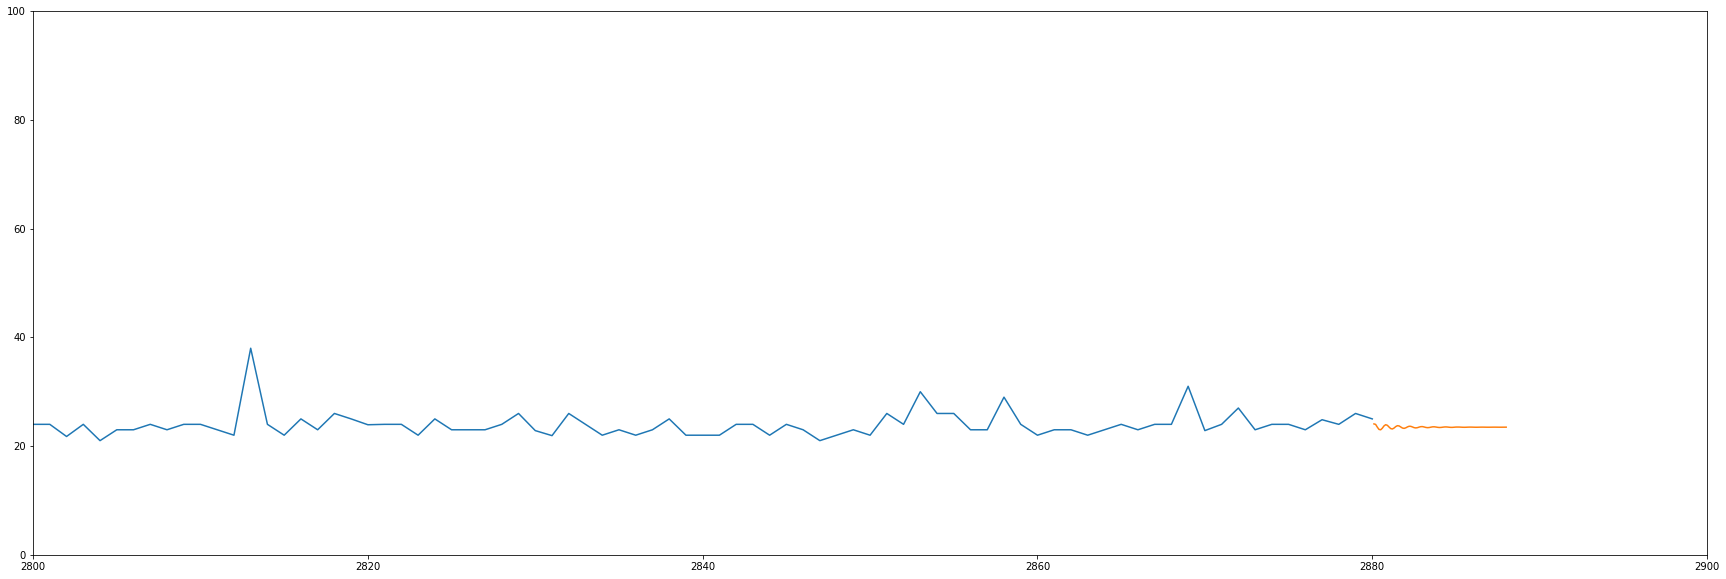

In [ ]:
#@title Previous timeseries + Prediction plot
plt.figure(figsize=(30, 10))
if data_source == 'sin':
  plt.plot(df.index,df['Sine'])
  plt.plot(forecast_index,forecast)
else:
  plt.ylim(0, 100)
  plt.xlim(2800, 2900)
  plt.plot(df.index,df['kpi'])
  plt.plot(forecast_index,forecast)

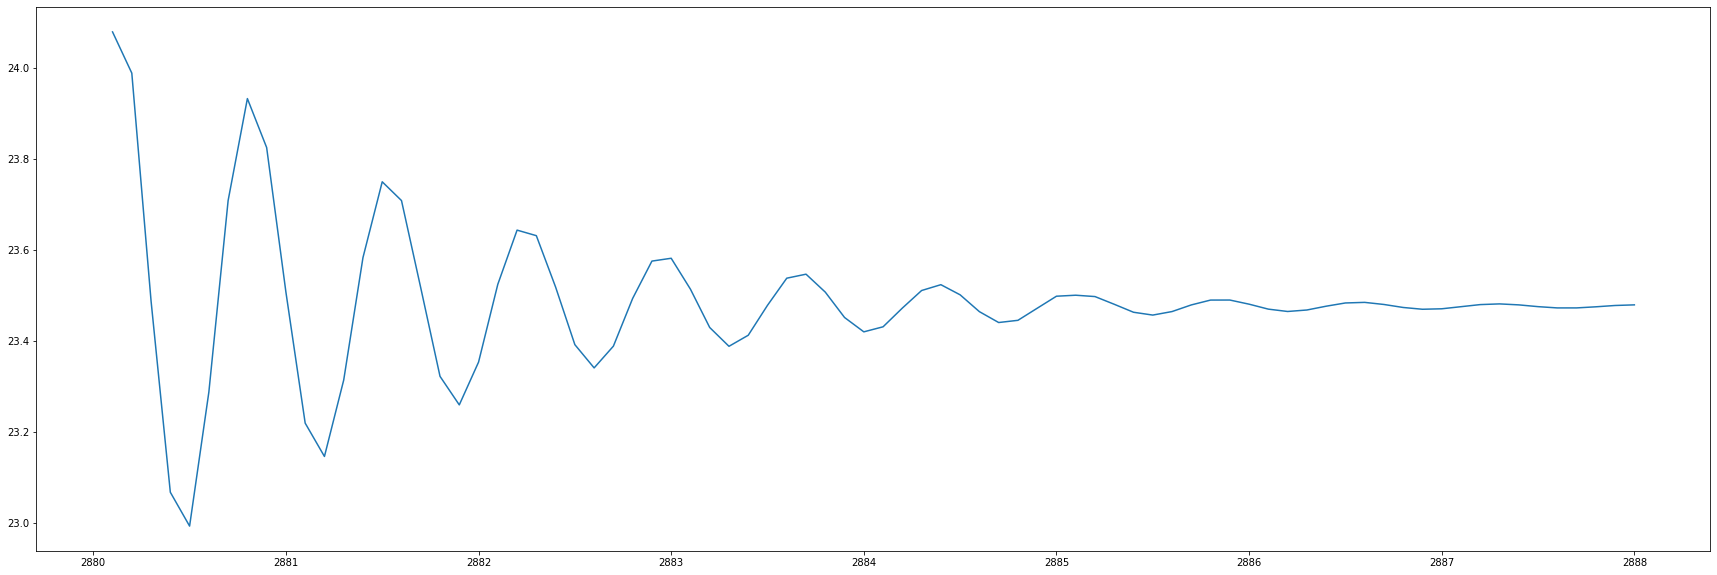

In [ ]:
#@title Just the prediction



plt.figure(figsize=(30, 10))
plt.plot(forecast_index,forecast)
None

# Save the model

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
!tree saved_model/my_model

saved_model/my_model
├── assets
├── saved_model.pb
└── variables
    ├── variables.data-00000-of-00001
    └── variables.index

2 directories, 3 files


In [ ]:
!cat save